## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['GS_cub_m'])

In [8]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [9]:
# Columns in "y" data collections
y.head()

,GS_cub_m
0,43.9
1,254.0
2,190.0
3,277.7
4,142.5


# Create first XGBoost model for estimate varibiality of output stats

In [10]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [11]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [12]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [13]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9722419242007189, 0.962665487463879, 0.9679930037364095]
    Mean: 0.968
    Std: 0.004

 --------------------
Root-mean-square error (RMSE): 

    Scores: [28.12889438 27.32060157 26.61984805]
    Mean: 27.356
    Std: 0.617

 --------------------
Mean absolute error (MAE): 

    Scores: [16.919528601719783, 15.735860655191061, 17.214226659808244]
    Mean: 16.623
    Std: 0.639

 --------------------


# Add optimal hyperparameters for XGBoost model

In [14]:
# Hyperparameters data for the next step/stage
p1 = 0.8829191872975016               # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.4317747333990657               # gamma
print('Gamma: ' + str(p2))

p3 = 0.17029218845451208              # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 172         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.894854733579894            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8829191872975016
Gamma: 0.4317747333990657
Learning_rate: 0.17029218845451208
Max_depth: 4
N_estimators: 172
Subsample: 0.894854733579894


# Estimation of predictive quality to basic XGBoost models using Loops

In [15]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [16]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:222.79718	validation_1-rmse:241.28680
[1]	validation_0-rmse:187.95446	validation_1-rmse:204.91769
[2]	validation_0-rmse:157.77861	validation_1-rmse:173.05044
[3]	validation_0-rmse:132.64602	validation_1-rmse:146.09235
[4]	validation_0-rmse:112.19739	validation_1-rmse:123.51421
[5]	validation_0-rmse:95.04281	validation_1-rmse:105.64616
[6]	validation_0-rmse:80.85436	validation_1-rmse:90.67328
[7]	validation_0-rmse:68.99912	validation_1-rmse:77.81810


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:59.80307	validation_1-rmse:68.63774
[9]	validation_0-rmse:51.78855	validation_1-rmse:59.60353
[10]	validation_0-rmse:45.23756	validation_1-rmse:52.84902
[11]	validation_0-rmse:39.89227	validation_1-rmse:46.82249
[12]	validation_0-rmse:35.84524	validation_1-rmse:42.72298
[13]	validation_0-rmse:32.17652	validation_1-rmse:39.28392
[14]	validation_0-rmse:29.31135	validation_1-rmse:36.66284
[15]	validation_0-rmse:26.99864	validation_1-rmse:34.43440
[16]	validation_0-rmse:25.23072	validation_1-rmse:32.56778
[17]	validation_0-rmse:23.82718	validation_1-rmse:31.05605
[18]	validation_0-rmse:22.79753	validation_1-rmse:30.20941
[19]	validation_0-rmse:21.91223	validation_1-rmse:29.08356
[20]	validation_0-rmse:21.11625	validation_1-rmse:28.45828
[21]	validation_0-rmse:20.52709	validation_1-rmse:27.91461
[22]	validation_0-rmse:20.07501	validation_1-rmse:27.34931
[23]	validation_0-rmse:19.67949	validation_1-rmse:27.12634
[24]	validation_0-rmse:19.31810	validation_1-rmse:26.75722

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.07265	validation_1-rmse:227.02211
[1]	validation_0-rmse:190.93686	validation_1-rmse:189.44183
[2]	validation_0-rmse:160.31067	validation_1-rmse:159.04091
[3]	validation_0-rmse:134.81314	validation_1-rmse:133.60383
[4]	validation_0-rmse:113.97267	validation_1-rmse:113.35855


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.36406	validation_1-rmse:96.25712
[6]	validation_0-rmse:82.01846	validation_1-rmse:82.17989
[7]	validation_0-rmse:70.13416	validation_1-rmse:70.56830
[8]	validation_0-rmse:60.83155	validation_1-rmse:60.24707
[9]	validation_0-rmse:52.52945	validation_1-rmse:51.80388
[10]	validation_0-rmse:45.77625	validation_1-rmse:45.21264
[11]	validation_0-rmse:40.28217	validation_1-rmse:40.41613
[12]	validation_0-rmse:36.05626	validation_1-rmse:35.49590
[13]	validation_0-rmse:32.41617	validation_1-rmse:32.55167
[14]	validation_0-rmse:29.58777	validation_1-rmse:30.33439
[15]	validation_0-rmse:27.26079	validation_1-rmse:28.44677
[16]	validation_0-rmse:25.47335	validation_1-rmse:26.78058
[17]	validation_0-rmse:23.99169	validation_1-rmse:25.51907
[18]	validation_0-rmse:22.75899	validation_1-rmse:24.70647
[19]	validation_0-rmse:21.77957	validation_1-rmse:24.06522
[20]	validation_0-rmse:21.03596	validation_1-rmse:23.78497
[21]	validation_0-rmse:20.40827	validation_1-rmse:23.34962
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.39362	validation_1-rmse:224.92613
[1]	validation_0-rmse:190.74246	validation_1-rmse:188.51462
[2]	validation_0-rmse:160.08409	validation_1-rmse:157.95692
[3]	validation_0-rmse:134.61589	validation_1-rmse:132.68507
[4]	validation_0-rmse:113.79556	validation_1-rmse:112.16989


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.13386	validation_1-rmse:94.90966
[6]	validation_0-rmse:81.49427	validation_1-rmse:80.47909
[7]	validation_0-rmse:69.38755	validation_1-rmse:68.92391
[8]	validation_0-rmse:59.99418	validation_1-rmse:59.89588
[9]	validation_0-rmse:51.68784	validation_1-rmse:52.52242
[10]	validation_0-rmse:44.99498	validation_1-rmse:46.16593
[11]	validation_0-rmse:39.45269	validation_1-rmse:41.46093
[12]	validation_0-rmse:35.21920	validation_1-rmse:37.84429
[13]	validation_0-rmse:31.50340	validation_1-rmse:35.21237
[14]	validation_0-rmse:28.37701	validation_1-rmse:32.98933
[15]	validation_0-rmse:26.10534	validation_1-rmse:31.29080
[16]	validation_0-rmse:24.16978	validation_1-rmse:30.19401
[17]	validation_0-rmse:22.69496	validation_1-rmse:29.24223
[18]	validation_0-rmse:21.55088	validation_1-rmse:28.61597
[19]	validation_0-rmse:20.54466	validation_1-rmse:28.12233
[20]	validation_0-rmse:19.81653	validation_1-rmse:27.82093
[21]	validation_0-rmse:19.10073	validation_1-rmse:27.48429
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.48850	validation_1-rmse:222.32749
[1]	validation_0-rmse:191.91148	validation_1-rmse:187.28889
[2]	validation_0-rmse:160.97799	validation_1-rmse:157.66878
[3]	validation_0-rmse:135.45083	validation_1-rmse:133.74661
[4]	validation_0-rmse:114.31251	validation_1-rmse:113.88047
[5]	validation_0-rmse:96.63332	validation_1-rmse:96.99831


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:82.06408	validation_1-rmse:83.28322
[7]	validation_0-rmse:69.94967	validation_1-rmse:71.98088
[8]	validation_0-rmse:60.58093	validation_1-rmse:63.37458
[9]	validation_0-rmse:52.18006	validation_1-rmse:55.91817
[10]	validation_0-rmse:45.42171	validation_1-rmse:50.36553
[11]	validation_0-rmse:39.92737	validation_1-rmse:45.98946
[12]	validation_0-rmse:35.68393	validation_1-rmse:42.49325
[13]	validation_0-rmse:32.06966	validation_1-rmse:39.96661
[14]	validation_0-rmse:29.28852	validation_1-rmse:38.04927
[15]	validation_0-rmse:26.99855	validation_1-rmse:36.29454
[16]	validation_0-rmse:25.20765	validation_1-rmse:34.64250
[17]	validation_0-rmse:23.73319	validation_1-rmse:33.60587
[18]	validation_0-rmse:22.55338	validation_1-rmse:32.73147
[19]	validation_0-rmse:21.60748	validation_1-rmse:31.86664
[20]	validation_0-rmse:20.90501	validation_1-rmse:31.19612
[21]	validation_0-rmse:20.08710	validation_1-rmse:30.84203
[22]	validation_0-rmse:19.45385	validation_1-rmse:30.33516
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.45218	validation_1-rmse:221.91127
[1]	validation_0-rmse:191.73192	validation_1-rmse:184.95877
[2]	validation_0-rmse:160.91483	validation_1-rmse:155.19599
[3]	validation_0-rmse:135.53503	validation_1-rmse:130.04193
[4]	validation_0-rmse:114.71476	validation_1-rmse:109.91430


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.03060	validation_1-rmse:93.04524
[6]	validation_0-rmse:82.35117	validation_1-rmse:79.18753
[7]	validation_0-rmse:70.19140	validation_1-rmse:67.79446
[8]	validation_0-rmse:60.61510	validation_1-rmse:59.00064
[9]	validation_0-rmse:52.27987	validation_1-rmse:51.98319
[10]	validation_0-rmse:45.30346	validation_1-rmse:45.81694
[11]	validation_0-rmse:40.05360	validation_1-rmse:41.88226
[12]	validation_0-rmse:35.88091	validation_1-rmse:38.10328
[13]	validation_0-rmse:32.21214	validation_1-rmse:35.51106
[14]	validation_0-rmse:29.28882	validation_1-rmse:33.53994
[15]	validation_0-rmse:27.08584	validation_1-rmse:32.21273
[16]	validation_0-rmse:25.22061	validation_1-rmse:31.21252
[17]	validation_0-rmse:23.66569	validation_1-rmse:30.54534
[18]	validation_0-rmse:22.55369	validation_1-rmse:29.81758
[19]	validation_0-rmse:21.68134	validation_1-rmse:29.15530
[20]	validation_0-rmse:20.98401	validation_1-rmse:28.81275
[21]	validation_0-rmse:20.34812	validation_1-rmse:28.48207
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.44174	validation_1-rmse:216.05620


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.76911	validation_1-rmse:180.91938
[2]	validation_0-rmse:161.65955	validation_1-rmse:152.07731
[3]	validation_0-rmse:135.93938	validation_1-rmse:126.99817
[4]	validation_0-rmse:114.99956	validation_1-rmse:107.99819
[5]	validation_0-rmse:97.45467	validation_1-rmse:91.67383
[6]	validation_0-rmse:82.83653	validation_1-rmse:78.09531
[7]	validation_0-rmse:70.89496	validation_1-rmse:67.09427
[8]	validation_0-rmse:61.37484	validation_1-rmse:58.99504
[9]	validation_0-rmse:52.99802	validation_1-rmse:51.45500
[10]	validation_0-rmse:46.22601	validation_1-rmse:45.54351
[11]	validation_0-rmse:40.55299	validation_1-rmse:40.91537
[12]	validation_0-rmse:36.43768	validation_1-rmse:37.78487
[13]	validation_0-rmse:32.79769	validation_1-rmse:34.89573
[14]	validation_0-rmse:29.90749	validation_1-rmse:32.58693
[15]	validation_0-rmse:27.54517	validation_1-rmse:30.77297
[16]	validation_0-rmse:25.72823	validation_1-rmse:29.36960
[17]	validation_0-rmse:24.25723	validation_1-rmse:28.4390

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.81481	validation_1-rmse:238.72670


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.04418	validation_1-rmse:202.31323
[2]	validation_0-rmse:158.90487	validation_1-rmse:170.75685
[3]	validation_0-rmse:133.91368	validation_1-rmse:145.02380
[4]	validation_0-rmse:113.35048	validation_1-rmse:123.45817
[5]	validation_0-rmse:95.92574	validation_1-rmse:105.27187
[6]	validation_0-rmse:81.65087	validation_1-rmse:90.29120
[7]	validation_0-rmse:69.81096	validation_1-rmse:77.58561
[8]	validation_0-rmse:60.63630	validation_1-rmse:67.67005
[9]	validation_0-rmse:52.43771	validation_1-rmse:59.30130
[10]	validation_0-rmse:45.85713	validation_1-rmse:52.11602
[11]	validation_0-rmse:40.56354	validation_1-rmse:46.65386
[12]	validation_0-rmse:36.45471	validation_1-rmse:42.27730
[13]	validation_0-rmse:32.86419	validation_1-rmse:38.60433
[14]	validation_0-rmse:29.98607	validation_1-rmse:35.34500
[15]	validation_0-rmse:27.64277	validation_1-rmse:32.71709
[16]	validation_0-rmse:25.75889	validation_1-rmse:30.80957
[17]	validation_0-rmse:24.29396	validation_1-rmse:29.285

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.05823	validation_1-rmse:223.54988


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.42671	validation_1-rmse:187.17275
[2]	validation_0-rmse:160.72156	validation_1-rmse:156.70792
[3]	validation_0-rmse:135.13004	validation_1-rmse:131.56437
[4]	validation_0-rmse:114.23252	validation_1-rmse:111.49029
[5]	validation_0-rmse:96.62737	validation_1-rmse:94.36330
[6]	validation_0-rmse:82.01510	validation_1-rmse:80.31992
[7]	validation_0-rmse:70.18689	validation_1-rmse:68.59675
[8]	validation_0-rmse:60.85043	validation_1-rmse:59.73718
[9]	validation_0-rmse:52.61060	validation_1-rmse:51.89326
[10]	validation_0-rmse:45.91389	validation_1-rmse:46.11400
[11]	validation_0-rmse:40.39200	validation_1-rmse:41.54475
[12]	validation_0-rmse:36.28408	validation_1-rmse:38.03452
[13]	validation_0-rmse:32.69980	validation_1-rmse:35.41606
[14]	validation_0-rmse:29.86676	validation_1-rmse:33.30247
[15]	validation_0-rmse:27.42917	validation_1-rmse:31.44418
[16]	validation_0-rmse:25.66707	validation_1-rmse:30.35804
[17]	validation_0-rmse:24.27791	validation_1-rmse:29.0770

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:229.80712	validation_1-rmse:211.46914
[1]	validation_0-rmse:193.82690	validation_1-rmse:176.21044
[2]	validation_0-rmse:162.84283	validation_1-rmse:147.41931
[3]	validation_0-rmse:137.06361	validation_1-rmse:123.77795
[4]	validation_0-rmse:115.91484	validation_1-rmse:104.25307
[5]	validation_0-rmse:98.44395	validation_1-rmse:88.38709
[6]	validation_0-rmse:83.58434	validation_1-rmse:75.27795
[7]	validation_0-rmse:71.31887	validation_1-rmse:64.03137
[8]	validation_0-rmse:61.48953	validation_1-rmse:55.08485
[9]	validation_0-rmse:53.04740	validation_1-rmse:47.94715
[10]	validation_0-rmse:46.12228	validation_1-rmse:42.23532
[11]	validation_0-rmse:40.59447	validation_1-rmse:37.68026
[12]	validation_0-rmse:36.25186	validation_1-rmse:34.54307
[13]	validation_0-rmse:32.40414	validation_1-rmse:32.06535
[14]	validation_0-rmse:29.44207	validation_1-rmse:30.36722
[15]	validation_0-rmse:27.08055	validation_1-rmse:29.02681
[16]	validation_0-rmse:25.29894	validation_1-rmse:27.998

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.93230	validation_1-rmse:233.06781
[1]	validation_0-rmse:189.67686	validation_1-rmse:198.07526


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.16967	validation_1-rmse:167.39297
[3]	validation_0-rmse:133.77148	validation_1-rmse:141.86069
[4]	validation_0-rmse:113.26889	validation_1-rmse:122.01597
[5]	validation_0-rmse:95.94751	validation_1-rmse:104.69905
[6]	validation_0-rmse:81.45320	validation_1-rmse:90.07338
[7]	validation_0-rmse:69.89177	validation_1-rmse:78.63293
[8]	validation_0-rmse:60.62908	validation_1-rmse:69.36770
[9]	validation_0-rmse:52.33798	validation_1-rmse:60.84901
[10]	validation_0-rmse:45.61551	validation_1-rmse:53.90163
[11]	validation_0-rmse:40.26776	validation_1-rmse:48.50228
[12]	validation_0-rmse:36.07607	validation_1-rmse:44.39760
[13]	validation_0-rmse:32.43464	validation_1-rmse:40.63784
[14]	validation_0-rmse:29.42651	validation_1-rmse:37.23241
[15]	validation_0-rmse:27.11602	validation_1-rmse:34.68954
[16]	validation_0-rmse:25.23690	validation_1-rmse:32.42174
[17]	validation_0-rmse:23.98174	validation_1-rmse:31.04030
[18]	validation_0-rmse:22.74533	validation_1-rmse:29.9845

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:226.87473	validation_1-rmse:224.58964
[1]	validation_0-rmse:191.47932	validation_1-rmse:188.81904
[2]	validation_0-rmse:160.55899	validation_1-rmse:157.74633


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.34545	validation_1-rmse:132.94061
[4]	validation_0-rmse:114.59334	validation_1-rmse:112.65503
[5]	validation_0-rmse:96.80923	validation_1-rmse:95.24170
[6]	validation_0-rmse:82.35650	validation_1-rmse:80.99682
[7]	validation_0-rmse:70.27479	validation_1-rmse:69.21076
[8]	validation_0-rmse:60.75920	validation_1-rmse:60.24956
[9]	validation_0-rmse:52.39980	validation_1-rmse:52.54765
[10]	validation_0-rmse:45.65928	validation_1-rmse:46.42736
[11]	validation_0-rmse:40.15751	validation_1-rmse:41.41085
[12]	validation_0-rmse:36.02914	validation_1-rmse:37.77500
[13]	validation_0-rmse:32.40441	validation_1-rmse:34.59897
[14]	validation_0-rmse:29.18619	validation_1-rmse:32.03140
[15]	validation_0-rmse:26.86530	validation_1-rmse:30.23242
[16]	validation_0-rmse:25.02836	validation_1-rmse:28.65789
[17]	validation_0-rmse:23.54841	validation_1-rmse:27.76964
[18]	validation_0-rmse:22.45753	validation_1-rmse:26.91155
[19]	validation_0-rmse:21.48864	validation_1-rmse:26.47358


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.92881	validation_1-rmse:217.39952
[1]	validation_0-rmse:192.51578	validation_1-rmse:184.09680
[2]	validation_0-rmse:161.68113	validation_1-rmse:154.17601
[3]	validation_0-rmse:135.88981	validation_1-rmse:129.25532


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:114.84699	validation_1-rmse:109.09730
[5]	validation_0-rmse:97.15439	validation_1-rmse:92.43980
[6]	validation_0-rmse:82.47775	validation_1-rmse:78.90749
[7]	validation_0-rmse:70.20792	validation_1-rmse:67.60534
[8]	validation_0-rmse:60.73839	validation_1-rmse:59.54495
[9]	validation_0-rmse:52.18729	validation_1-rmse:52.00541
[10]	validation_0-rmse:45.50533	validation_1-rmse:46.73544
[11]	validation_0-rmse:39.94756	validation_1-rmse:41.96483
[12]	validation_0-rmse:35.93848	validation_1-rmse:38.68754
[13]	validation_0-rmse:32.29726	validation_1-rmse:36.46499
[14]	validation_0-rmse:29.30796	validation_1-rmse:34.72301
[15]	validation_0-rmse:27.01302	validation_1-rmse:33.49706
[16]	validation_0-rmse:25.13643	validation_1-rmse:32.29753
[17]	validation_0-rmse:23.64989	validation_1-rmse:31.48523
[18]	validation_0-rmse:22.41548	validation_1-rmse:31.17172
[19]	validation_0-rmse:21.53925	validation_1-rmse:30.60097
[20]	validation_0-rmse:20.82269	validation_1-rmse:30.17252
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.32188	validation_1-rmse:226.85789
[1]	validation_0-rmse:190.93018	validation_1-rmse:191.99093


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.21524	validation_1-rmse:162.10423
[3]	validation_0-rmse:134.78935	validation_1-rmse:137.68818
[4]	validation_0-rmse:113.76893	validation_1-rmse:116.95595
[5]	validation_0-rmse:96.46428	validation_1-rmse:100.09904
[6]	validation_0-rmse:81.83609	validation_1-rmse:85.69781
[7]	validation_0-rmse:69.76197	validation_1-rmse:74.11522
[8]	validation_0-rmse:60.55114	validation_1-rmse:65.57531
[9]	validation_0-rmse:52.21865	validation_1-rmse:57.73689
[10]	validation_0-rmse:45.51424	validation_1-rmse:51.18214
[11]	validation_0-rmse:40.14533	validation_1-rmse:46.66651
[12]	validation_0-rmse:35.82794	validation_1-rmse:42.95967
[13]	validation_0-rmse:32.17155	validation_1-rmse:39.75979
[14]	validation_0-rmse:29.12263	validation_1-rmse:37.00437
[15]	validation_0-rmse:26.73690	validation_1-rmse:34.99857
[16]	validation_0-rmse:24.78766	validation_1-rmse:33.66283
[17]	validation_0-rmse:23.33743	validation_1-rmse:32.53203
[18]	validation_0-rmse:22.05720	validation_1-rmse:31.5453

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.69582	validation_1-rmse:229.77532


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.57125	validation_1-rmse:194.18030
[2]	validation_0-rmse:160.04291	validation_1-rmse:163.02050
[3]	validation_0-rmse:134.90125	validation_1-rmse:136.81396
[4]	validation_0-rmse:113.83343	validation_1-rmse:115.16852
[5]	validation_0-rmse:96.40135	validation_1-rmse:97.24137
[6]	validation_0-rmse:81.83606	validation_1-rmse:82.32288
[7]	validation_0-rmse:69.82605	validation_1-rmse:70.81905
[8]	validation_0-rmse:60.37536	validation_1-rmse:61.62915
[9]	validation_0-rmse:52.07491	validation_1-rmse:53.39550
[10]	validation_0-rmse:45.17649	validation_1-rmse:47.00233
[11]	validation_0-rmse:39.68460	validation_1-rmse:42.01285
[12]	validation_0-rmse:35.41336	validation_1-rmse:38.72228
[13]	validation_0-rmse:31.86226	validation_1-rmse:35.50225
[14]	validation_0-rmse:28.91120	validation_1-rmse:32.84766
[15]	validation_0-rmse:26.67995	validation_1-rmse:31.22717
[16]	validation_0-rmse:24.83699	validation_1-rmse:29.92594
[17]	validation_0-rmse:23.34925	validation_1-rmse:29.1449

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.48666	validation_1-rmse:229.00029
[1]	validation_0-rmse:190.44219	validation_1-rmse:193.21892
[2]	validation_0-rmse:159.92866	validation_1-rmse:161.18726


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.57421	validation_1-rmse:135.85577
[4]	validation_0-rmse:113.79525	validation_1-rmse:114.59714
[5]	validation_0-rmse:96.35149	validation_1-rmse:97.09213
[6]	validation_0-rmse:81.64392	validation_1-rmse:82.40833
[7]	validation_0-rmse:69.67040	validation_1-rmse:70.80035
[8]	validation_0-rmse:59.96768	validation_1-rmse:61.59764
[9]	validation_0-rmse:51.70366	validation_1-rmse:54.17962
[10]	validation_0-rmse:44.96263	validation_1-rmse:47.98046
[11]	validation_0-rmse:39.38044	validation_1-rmse:42.92869
[12]	validation_0-rmse:35.14962	validation_1-rmse:39.23213
[13]	validation_0-rmse:31.44305	validation_1-rmse:36.26249
[14]	validation_0-rmse:28.36156	validation_1-rmse:34.07172
[15]	validation_0-rmse:25.94170	validation_1-rmse:32.21500
[16]	validation_0-rmse:24.12561	validation_1-rmse:30.78218
[17]	validation_0-rmse:22.71957	validation_1-rmse:29.87410
[18]	validation_0-rmse:21.56836	validation_1-rmse:29.06887
[19]	validation_0-rmse:20.57430	validation_1-rmse:28.56576


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.18773	validation_1-rmse:238.05416


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.49757	validation_1-rmse:201.14438
[2]	validation_0-rmse:158.21508	validation_1-rmse:168.59387
[3]	validation_0-rmse:133.06197	validation_1-rmse:141.06867
[4]	validation_0-rmse:112.78016	validation_1-rmse:118.82897
[5]	validation_0-rmse:95.43776	validation_1-rmse:100.90565
[6]	validation_0-rmse:81.11487	validation_1-rmse:85.63803
[7]	validation_0-rmse:69.30140	validation_1-rmse:73.14415
[8]	validation_0-rmse:59.88354	validation_1-rmse:63.39747
[9]	validation_0-rmse:51.70995	validation_1-rmse:53.93206
[10]	validation_0-rmse:44.95276	validation_1-rmse:47.19732
[11]	validation_0-rmse:39.55444	validation_1-rmse:41.72512
[12]	validation_0-rmse:35.40664	validation_1-rmse:38.19291
[13]	validation_0-rmse:31.71627	validation_1-rmse:34.89912
[14]	validation_0-rmse:28.84238	validation_1-rmse:32.43024
[15]	validation_0-rmse:26.48858	validation_1-rmse:30.55645
[16]	validation_0-rmse:24.68345	validation_1-rmse:29.28872
[17]	validation_0-rmse:23.22217	validation_1-rmse:28.607

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.08003	validation_1-rmse:219.51199
[1]	validation_0-rmse:192.35480	validation_1-rmse:185.00908
[2]	validation_0-rmse:161.61982	validation_1-rmse:157.19079
[3]	validation_0-rmse:135.88462	validation_1-rmse:133.13540


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.08986	validation_1-rmse:113.67615
[5]	validation_0-rmse:97.32550	validation_1-rmse:97.77656
[6]	validation_0-rmse:82.53375	validation_1-rmse:84.40166
[7]	validation_0-rmse:70.35052	validation_1-rmse:73.29201
[8]	validation_0-rmse:60.73155	validation_1-rmse:64.46818
[9]	validation_0-rmse:52.44547	validation_1-rmse:57.42078
[10]	validation_0-rmse:45.46234	validation_1-rmse:51.79031
[11]	validation_0-rmse:40.00259	validation_1-rmse:47.14181
[12]	validation_0-rmse:35.83254	validation_1-rmse:43.59294
[13]	validation_0-rmse:32.12631	validation_1-rmse:40.90505
[14]	validation_0-rmse:29.24974	validation_1-rmse:38.93702
[15]	validation_0-rmse:26.89176	validation_1-rmse:37.36207
[16]	validation_0-rmse:24.86587	validation_1-rmse:35.85970
[17]	validation_0-rmse:23.40231	validation_1-rmse:34.77577
[18]	validation_0-rmse:22.12090	validation_1-rmse:33.92352
[19]	validation_0-rmse:21.20672	validation_1-rmse:33.30137
[20]	validation_0-rmse:20.48238	validation_1-rmse:32.78057
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.38552	validation_1-rmse:208.62220
[1]	validation_0-rmse:194.79207	validation_1-rmse:175.04118
[2]	validation_0-rmse:163.37594	validation_1-rmse:147.47823


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:137.29470	validation_1-rmse:123.41367
[4]	validation_0-rmse:115.95672	validation_1-rmse:104.13925
[5]	validation_0-rmse:98.19891	validation_1-rmse:87.93373
[6]	validation_0-rmse:83.45566	validation_1-rmse:74.72247
[7]	validation_0-rmse:71.13785	validation_1-rmse:63.87882
[8]	validation_0-rmse:61.58159	validation_1-rmse:55.31264
[9]	validation_0-rmse:53.31068	validation_1-rmse:48.05411
[10]	validation_0-rmse:46.55232	validation_1-rmse:42.51334
[11]	validation_0-rmse:40.98997	validation_1-rmse:37.70483
[12]	validation_0-rmse:36.78906	validation_1-rmse:34.14927
[13]	validation_0-rmse:33.15713	validation_1-rmse:31.23549
[14]	validation_0-rmse:30.09763	validation_1-rmse:28.92180
[15]	validation_0-rmse:27.84597	validation_1-rmse:27.32680
[16]	validation_0-rmse:25.92584	validation_1-rmse:26.05153
[17]	validation_0-rmse:24.39976	validation_1-rmse:24.96578
[18]	validation_0-rmse:23.23841	validation_1-rmse:24.22117
[19]	validation_0-rmse:22.39425	validation_1-rmse:23.55144


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.36890	validation_1-rmse:235.16623


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:189.33442	validation_1-rmse:198.85236
[2]	validation_0-rmse:158.91596	validation_1-rmse:166.73632
[3]	validation_0-rmse:133.47800	validation_1-rmse:141.33176
[4]	validation_0-rmse:112.78848	validation_1-rmse:120.61250
[5]	validation_0-rmse:95.49559	validation_1-rmse:102.98800
[6]	validation_0-rmse:80.88296	validation_1-rmse:88.68859
[7]	validation_0-rmse:69.14688	validation_1-rmse:77.73297
[8]	validation_0-rmse:59.71863	validation_1-rmse:69.36792
[9]	validation_0-rmse:51.39973	validation_1-rmse:61.77795
[10]	validation_0-rmse:44.73258	validation_1-rmse:55.61056
[11]	validation_0-rmse:39.21991	validation_1-rmse:50.55024
[12]	validation_0-rmse:35.06123	validation_1-rmse:46.84445
[13]	validation_0-rmse:31.60943	validation_1-rmse:43.48961
[14]	validation_0-rmse:28.62917	validation_1-rmse:41.06227
[15]	validation_0-rmse:26.25499	validation_1-rmse:39.24705
[16]	validation_0-rmse:24.32138	validation_1-rmse:37.80492
[17]	validation_0-rmse:22.87624	validation_1-rmse:36.907

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.63766	validation_1-rmse:225.38068
[1]	validation_0-rmse:191.31430	validation_1-rmse:190.62890


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.65418	validation_1-rmse:159.61374
[3]	validation_0-rmse:135.45019	validation_1-rmse:134.68142
[4]	validation_0-rmse:114.50475	validation_1-rmse:114.20661
[5]	validation_0-rmse:97.02235	validation_1-rmse:96.81486
[6]	validation_0-rmse:82.44647	validation_1-rmse:82.19178
[7]	validation_0-rmse:70.62058	validation_1-rmse:70.88148
[8]	validation_0-rmse:61.27409	validation_1-rmse:62.01525
[9]	validation_0-rmse:53.00217	validation_1-rmse:53.87543
[10]	validation_0-rmse:46.29991	validation_1-rmse:47.60354
[11]	validation_0-rmse:40.80288	validation_1-rmse:42.63923
[12]	validation_0-rmse:36.42756	validation_1-rmse:38.81518
[13]	validation_0-rmse:32.71304	validation_1-rmse:35.51610
[14]	validation_0-rmse:29.71340	validation_1-rmse:33.24277
[15]	validation_0-rmse:27.19048	validation_1-rmse:31.18869
[16]	validation_0-rmse:25.37170	validation_1-rmse:29.72911
[17]	validation_0-rmse:23.93126	validation_1-rmse:28.52359
[18]	validation_0-rmse:22.73846	validation_1-rmse:27.64320

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.80947	validation_1-rmse:228.09931
[1]	validation_0-rmse:190.74196	validation_1-rmse:191.92620
[2]	validation_0-rmse:160.19788	validation_1-rmse:161.93366
[3]	validation_0-rmse:134.97320	validation_1-rmse:136.73353
[4]	validation_0-rmse:113.99024	validation_1-rmse:116.83614
[5]	validation_0-rmse:96.35306	validation_1-rmse:99.66436
[6]	validation_0-rmse:81.89922	validation_1-rmse:85.76198
[7]	validation_0-rmse:69.81051	validation_1-rmse:74.26466
[8]	validation_0-rmse:60.29689	validation_1-rmse:64.93937
[9]	validation_0-rmse:51.90498	validation_1-rmse:57.24036
[10]	validation_0-rmse:45.12986	validation_1-rmse:51.32844
[11]	validation_0-rmse:39.72799	validation_1-rmse:46.84793
[12]	validation_0-rmse:35.51763	validation_1-rmse:42.91549
[13]	validation_0-rmse:31.91911	validation_1-rmse:40.20420
[14]	validation_0-rmse:28.86849	validation_1-rmse:37.55434
[15]	validation_0-rmse:26.56382	validation_1-rmse:35.99793
[16]	validation_0-rmse:24.68610	validation_1-rmse:34.639

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.82484	validation_1-rmse:219.44901


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.23739	validation_1-rmse:185.11171
[2]	validation_0-rmse:161.35771	validation_1-rmse:155.61561
[3]	validation_0-rmse:135.64516	validation_1-rmse:131.82141
[4]	validation_0-rmse:114.59464	validation_1-rmse:112.80244
[5]	validation_0-rmse:96.83944	validation_1-rmse:96.58928
[6]	validation_0-rmse:82.15608	validation_1-rmse:82.58454
[7]	validation_0-rmse:70.21445	validation_1-rmse:71.53187
[8]	validation_0-rmse:60.76238	validation_1-rmse:63.10290
[9]	validation_0-rmse:52.38268	validation_1-rmse:55.86400
[10]	validation_0-rmse:45.34230	validation_1-rmse:49.95290
[11]	validation_0-rmse:39.71893	validation_1-rmse:45.06146
[12]	validation_0-rmse:35.35462	validation_1-rmse:41.47782
[13]	validation_0-rmse:31.56961	validation_1-rmse:38.86618
[14]	validation_0-rmse:28.61998	validation_1-rmse:37.00264
[15]	validation_0-rmse:26.29156	validation_1-rmse:35.70939
[16]	validation_0-rmse:24.59501	validation_1-rmse:34.80553
[17]	validation_0-rmse:23.03337	validation_1-rmse:34.2216

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.31643	validation_1-rmse:231.99116
[1]	validation_0-rmse:190.11576	validation_1-rmse:196.83510


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.56999	validation_1-rmse:167.52533
[3]	validation_0-rmse:134.19212	validation_1-rmse:142.46084
[4]	validation_0-rmse:113.23867	validation_1-rmse:122.41284
[5]	validation_0-rmse:95.50585	validation_1-rmse:105.10486
[6]	validation_0-rmse:80.99739	validation_1-rmse:91.30281
[7]	validation_0-rmse:69.12355	validation_1-rmse:79.75473
[8]	validation_0-rmse:59.90572	validation_1-rmse:70.95347
[9]	validation_0-rmse:51.71761	validation_1-rmse:63.33061
[10]	validation_0-rmse:45.03671	validation_1-rmse:57.11803
[11]	validation_0-rmse:39.60826	validation_1-rmse:52.46703
[12]	validation_0-rmse:35.30204	validation_1-rmse:48.37708
[13]	validation_0-rmse:31.75768	validation_1-rmse:45.03831
[14]	validation_0-rmse:28.88261	validation_1-rmse:42.43220
[15]	validation_0-rmse:26.58056	validation_1-rmse:40.43338
[16]	validation_0-rmse:24.74281	validation_1-rmse:38.95913
[17]	validation_0-rmse:23.19329	validation_1-rmse:37.67861
[18]	validation_0-rmse:22.00125	validation_1-rmse:36.5043

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.32409	validation_1-rmse:225.54591
[1]	validation_0-rmse:190.83460	validation_1-rmse:188.41248


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.27057	validation_1-rmse:157.30440
[3]	validation_0-rmse:135.07707	validation_1-rmse:131.31255
[4]	validation_0-rmse:114.19594	validation_1-rmse:110.28306
[5]	validation_0-rmse:96.56285	validation_1-rmse:92.50136
[6]	validation_0-rmse:81.87014	validation_1-rmse:78.17023
[7]	validation_0-rmse:69.87142	validation_1-rmse:66.50054
[8]	validation_0-rmse:60.43691	validation_1-rmse:57.24002
[9]	validation_0-rmse:52.13809	validation_1-rmse:49.64464
[10]	validation_0-rmse:45.35120	validation_1-rmse:43.54179
[11]	validation_0-rmse:39.80293	validation_1-rmse:38.91380
[12]	validation_0-rmse:35.66008	validation_1-rmse:35.18823
[13]	validation_0-rmse:32.06492	validation_1-rmse:32.60401
[14]	validation_0-rmse:29.09325	validation_1-rmse:30.59628
[15]	validation_0-rmse:26.73716	validation_1-rmse:28.78107
[16]	validation_0-rmse:24.95837	validation_1-rmse:27.70312
[17]	validation_0-rmse:23.55705	validation_1-rmse:27.06498
[18]	validation_0-rmse:22.28000	validation_1-rmse:26.33170

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.73889	validation_1-rmse:224.83820
[1]	validation_0-rmse:191.25355	validation_1-rmse:190.64302
[2]	validation_0-rmse:160.52794	validation_1-rmse:160.71251
[3]	validation_0-rmse:135.09097	validation_1-rmse:136.10102
[4]	validation_0-rmse:114.18490	validation_1-rmse:115.48825
[5]	validation_0-rmse:96.76962	validation_1-rmse:99.17083
[6]	validation_0-rmse:82.06431	validation_1-rmse:85.01031
[7]	validation_0-rmse:70.18201	validation_1-rmse:73.84397
[8]	validation_0-rmse:60.70343	validation_1-rmse:65.28853
[9]	validation_0-rmse:52.33279	validation_1-rmse:57.93865
[10]	validation_0-rmse:45.32334	validation_1-rmse:51.41714
[11]	validation_0-rmse:39.71281	validation_1-rmse:47.04007
[12]	validation_0-rmse:35.51261	validation_1-rmse:43.64457
[13]	validation_0-rmse:31.82463	validation_1-rmse:40.78697
[14]	validation_0-rmse:28.83227	validation_1-rmse:38.60973
[15]	validation_0-rmse:26.47645	validation_1-rmse:36.72654
[16]	validation_0-rmse:24.62660	validation_1-rmse:35.354

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.64779	validation_1-rmse:216.01186


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:193.08362	validation_1-rmse:181.15360
[2]	validation_0-rmse:162.24707	validation_1-rmse:150.96147
[3]	validation_0-rmse:136.61892	validation_1-rmse:126.71359
[4]	validation_0-rmse:115.72902	validation_1-rmse:107.02809
[5]	validation_0-rmse:97.79530	validation_1-rmse:89.57743
[6]	validation_0-rmse:83.12001	validation_1-rmse:75.28923
[7]	validation_0-rmse:71.01304	validation_1-rmse:64.32782
[8]	validation_0-rmse:61.46770	validation_1-rmse:55.67985
[9]	validation_0-rmse:53.12999	validation_1-rmse:48.41293
[10]	validation_0-rmse:46.25457	validation_1-rmse:42.91089
[11]	validation_0-rmse:40.61919	validation_1-rmse:38.09428
[12]	validation_0-rmse:36.54357	validation_1-rmse:34.95920
[13]	validation_0-rmse:32.87164	validation_1-rmse:32.18575
[14]	validation_0-rmse:29.86620	validation_1-rmse:30.43386
[15]	validation_0-rmse:27.56716	validation_1-rmse:29.22556
[16]	validation_0-rmse:25.62163	validation_1-rmse:28.20672
[17]	validation_0-rmse:24.08298	validation_1-rmse:27.5048

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.56392	validation_1-rmse:218.59162
[1]	validation_0-rmse:192.87729	validation_1-rmse:184.12325
[2]	validation_0-rmse:161.79440	validation_1-rmse:156.18197


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.33233	validation_1-rmse:133.11295
[4]	validation_0-rmse:115.03352	validation_1-rmse:113.84478
[5]	validation_0-rmse:97.37419	validation_1-rmse:98.00418
[6]	validation_0-rmse:82.63534	validation_1-rmse:84.32968
[7]	validation_0-rmse:70.55175	validation_1-rmse:73.29499
[8]	validation_0-rmse:61.10775	validation_1-rmse:64.66715
[9]	validation_0-rmse:52.78998	validation_1-rmse:57.58251
[10]	validation_0-rmse:45.97890	validation_1-rmse:50.84350
[11]	validation_0-rmse:40.54243	validation_1-rmse:46.35315
[12]	validation_0-rmse:36.44844	validation_1-rmse:42.55679
[13]	validation_0-rmse:32.88376	validation_1-rmse:39.68843
[14]	validation_0-rmse:30.06360	validation_1-rmse:37.49825
[15]	validation_0-rmse:27.67061	validation_1-rmse:35.87431
[16]	validation_0-rmse:25.83928	validation_1-rmse:34.16659
[17]	validation_0-rmse:24.43275	validation_1-rmse:32.99785
[18]	validation_0-rmse:23.25485	validation_1-rmse:32.19430
[19]	validation_0-rmse:22.27384	validation_1-rmse:31.65360


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.93940	validation_1-rmse:224.10392
[1]	validation_0-rmse:191.98740	validation_1-rmse:188.86076


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.29096	validation_1-rmse:158.59493
[3]	validation_0-rmse:135.71676	validation_1-rmse:133.63894
[4]	validation_0-rmse:114.89184	validation_1-rmse:112.76471
[5]	validation_0-rmse:97.15571	validation_1-rmse:95.76332
[6]	validation_0-rmse:82.33617	validation_1-rmse:81.45051
[7]	validation_0-rmse:70.26609	validation_1-rmse:70.61788
[8]	validation_0-rmse:60.75876	validation_1-rmse:61.81375
[9]	validation_0-rmse:52.42497	validation_1-rmse:54.40451
[10]	validation_0-rmse:45.68434	validation_1-rmse:48.45129
[11]	validation_0-rmse:40.33853	validation_1-rmse:43.61831
[12]	validation_0-rmse:36.15055	validation_1-rmse:39.77845
[13]	validation_0-rmse:32.38193	validation_1-rmse:37.08702
[14]	validation_0-rmse:29.50747	validation_1-rmse:35.26148
[15]	validation_0-rmse:27.18449	validation_1-rmse:34.04564
[16]	validation_0-rmse:25.25146	validation_1-rmse:32.86665
[17]	validation_0-rmse:23.78996	validation_1-rmse:32.07680
[18]	validation_0-rmse:22.68655	validation_1-rmse:31.71271

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.75359	validation_1-rmse:225.65806
[1]	validation_0-rmse:191.33915	validation_1-rmse:192.39955
[2]	validation_0-rmse:160.44511	validation_1-rmse:161.95119


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.05036	validation_1-rmse:136.60388
[4]	validation_0-rmse:114.10636	validation_1-rmse:115.54803
[5]	validation_0-rmse:96.59153	validation_1-rmse:99.33423
[6]	validation_0-rmse:81.95458	validation_1-rmse:84.83354
[7]	validation_0-rmse:70.02603	validation_1-rmse:72.82772
[8]	validation_0-rmse:60.46982	validation_1-rmse:64.81073
[9]	validation_0-rmse:52.22655	validation_1-rmse:56.50836
[10]	validation_0-rmse:45.59973	validation_1-rmse:50.41334
[11]	validation_0-rmse:40.16243	validation_1-rmse:44.82567
[12]	validation_0-rmse:36.05997	validation_1-rmse:40.84556
[13]	validation_0-rmse:32.54273	validation_1-rmse:37.06687
[14]	validation_0-rmse:29.61223	validation_1-rmse:34.57620
[15]	validation_0-rmse:27.39042	validation_1-rmse:32.37504
[16]	validation_0-rmse:25.43353	validation_1-rmse:31.11021
[17]	validation_0-rmse:23.83979	validation_1-rmse:29.83740
[18]	validation_0-rmse:22.61429	validation_1-rmse:28.62295
[19]	validation_0-rmse:21.58425	validation_1-rmse:27.72144


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.25491	validation_1-rmse:231.64093


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.11904	validation_1-rmse:195.81706
[2]	validation_0-rmse:159.86839	validation_1-rmse:165.46687
[3]	validation_0-rmse:134.56995	validation_1-rmse:140.18956
[4]	validation_0-rmse:113.78962	validation_1-rmse:119.37428
[5]	validation_0-rmse:96.42671	validation_1-rmse:101.67527
[6]	validation_0-rmse:81.97781	validation_1-rmse:87.40672
[7]	validation_0-rmse:70.29061	validation_1-rmse:75.75360
[8]	validation_0-rmse:60.94857	validation_1-rmse:66.48239
[9]	validation_0-rmse:52.55160	validation_1-rmse:58.80736
[10]	validation_0-rmse:45.73670	validation_1-rmse:52.10288
[11]	validation_0-rmse:40.41183	validation_1-rmse:46.90821
[12]	validation_0-rmse:36.20068	validation_1-rmse:42.35551
[13]	validation_0-rmse:32.50841	validation_1-rmse:38.97003
[14]	validation_0-rmse:29.67733	validation_1-rmse:36.46161
[15]	validation_0-rmse:27.30723	validation_1-rmse:34.52270
[16]	validation_0-rmse:25.38313	validation_1-rmse:32.69509
[17]	validation_0-rmse:23.93171	validation_1-rmse:31.375

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:218.63469	validation_1-rmse:256.29384
[1]	validation_0-rmse:184.33035	validation_1-rmse:220.63509
[2]	validation_0-rmse:154.71747	validation_1-rmse:187.06117
[3]	validation_0-rmse:130.15010	validation_1-rmse:159.65672
[4]	validation_0-rmse:110.07921	validation_1-rmse:137.97822
[5]	validation_0-rmse:93.09401	validation_1-rmse:119.02376
[6]	validation_0-rmse:79.06018	validation_1-rmse:103.43274
[7]	validation_0-rmse:67.54779	validation_1-rmse:90.35786
[8]	validation_0-rmse:58.44956	validation_1-rmse:80.75363
[9]	validation_0-rmse:50.56199	validation_1-rmse:71.36610
[10]	validation_0-rmse:44.26212	validation_1-rmse:64.44777
[11]	validation_0-rmse:39.04302	validation_1-rmse:58.27082
[12]	validation_0-rmse:35.09147	validation_1-rmse:54.31893
[13]	validation_0-rmse:31.52445	validation_1-rmse:50.18307
[14]	validation_0-rmse:28.70608	validation_1-rmse:46.82429
[15]	validation_0-rmse:26.51409	validation_1-rmse:44.24267
[16]	validation_0-rmse:24.75683	validation_1-rmse:42.1

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.79296	validation_1-rmse:231.03867


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.39047	validation_1-rmse:195.13495
[2]	validation_0-rmse:160.11666	validation_1-rmse:164.61236
[3]	validation_0-rmse:134.84406	validation_1-rmse:139.11761
[4]	validation_0-rmse:114.10263	validation_1-rmse:118.09749
[5]	validation_0-rmse:96.63339	validation_1-rmse:100.59799
[6]	validation_0-rmse:82.14955	validation_1-rmse:86.18438
[7]	validation_0-rmse:70.08505	validation_1-rmse:73.81608
[8]	validation_0-rmse:60.59735	validation_1-rmse:64.38553
[9]	validation_0-rmse:52.59801	validation_1-rmse:56.59056
[10]	validation_0-rmse:45.95038	validation_1-rmse:49.91084
[11]	validation_0-rmse:40.52764	validation_1-rmse:44.92333
[12]	validation_0-rmse:36.37373	validation_1-rmse:40.71328
[13]	validation_0-rmse:32.78116	validation_1-rmse:37.45808
[14]	validation_0-rmse:29.89482	validation_1-rmse:34.86132
[15]	validation_0-rmse:27.58152	validation_1-rmse:32.83504
[16]	validation_0-rmse:25.69826	validation_1-rmse:31.21317
[17]	validation_0-rmse:24.26636	validation_1-rmse:30.106

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.09075	validation_1-rmse:233.98895
[1]	validation_0-rmse:189.88851	validation_1-rmse:199.18514
[2]	validation_0-rmse:159.55573	validation_1-rmse:167.55454
[3]	validation_0-rmse:134.10989	validation_1-rmse:141.91140
[4]	validation_0-rmse:113.27957	validation_1-rmse:121.13595
[5]	validation_0-rmse:95.96317	validation_1-rmse:103.48568
[6]	validation_0-rmse:81.53556	validation_1-rmse:88.72757


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:69.81501	validation_1-rmse:76.55959
[8]	validation_0-rmse:60.52769	validation_1-rmse:67.63444
[9]	validation_0-rmse:52.36239	validation_1-rmse:58.98603
[10]	validation_0-rmse:45.58880	validation_1-rmse:52.31150
[11]	validation_0-rmse:40.11090	validation_1-rmse:46.97151
[12]	validation_0-rmse:35.79050	validation_1-rmse:42.65226
[13]	validation_0-rmse:32.12307	validation_1-rmse:39.01214
[14]	validation_0-rmse:29.21125	validation_1-rmse:36.32960
[15]	validation_0-rmse:26.90913	validation_1-rmse:34.08391
[16]	validation_0-rmse:25.11392	validation_1-rmse:32.53291
[17]	validation_0-rmse:23.65573	validation_1-rmse:30.99587
[18]	validation_0-rmse:22.54415	validation_1-rmse:29.80004
[19]	validation_0-rmse:21.67891	validation_1-rmse:29.01917
[20]	validation_0-rmse:20.87036	validation_1-rmse:28.37978
[21]	validation_0-rmse:20.33370	validation_1-rmse:27.76345
[22]	validation_0-rmse:19.83953	validation_1-rmse:27.57598
[23]	validation_0-rmse:19.31849	validation_1-rmse:27.28083


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:226.83748	validation_1-rmse:224.77228
[1]	validation_0-rmse:191.48537	validation_1-rmse:190.35815


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.74365	validation_1-rmse:159.16067
[3]	validation_0-rmse:135.34952	validation_1-rmse:134.39966
[4]	validation_0-rmse:114.37600	validation_1-rmse:114.09585
[5]	validation_0-rmse:96.79206	validation_1-rmse:96.28235
[6]	validation_0-rmse:82.26949	validation_1-rmse:81.45759
[7]	validation_0-rmse:70.08619	validation_1-rmse:69.63310
[8]	validation_0-rmse:60.61645	validation_1-rmse:60.35080
[9]	validation_0-rmse:52.25279	validation_1-rmse:52.31374
[10]	validation_0-rmse:45.52779	validation_1-rmse:46.19800
[11]	validation_0-rmse:39.98514	validation_1-rmse:41.34668
[12]	validation_0-rmse:35.78686	validation_1-rmse:37.58759
[13]	validation_0-rmse:32.21839	validation_1-rmse:34.87274
[14]	validation_0-rmse:29.43866	validation_1-rmse:32.65766
[15]	validation_0-rmse:27.06537	validation_1-rmse:30.43963
[16]	validation_0-rmse:25.11393	validation_1-rmse:28.78549
[17]	validation_0-rmse:23.61554	validation_1-rmse:27.69019
[18]	validation_0-rmse:22.50503	validation_1-rmse:26.77379

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.38800	validation_1-rmse:209.81782


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:194.29695	validation_1-rmse:176.24301
[2]	validation_0-rmse:162.90559	validation_1-rmse:148.69695
[3]	validation_0-rmse:137.07494	validation_1-rmse:124.97964
[4]	validation_0-rmse:115.91461	validation_1-rmse:105.73971
[5]	validation_0-rmse:97.91719	validation_1-rmse:90.10723
[6]	validation_0-rmse:83.16885	validation_1-rmse:76.91869
[7]	validation_0-rmse:70.84672	validation_1-rmse:65.96606
[8]	validation_0-rmse:61.11027	validation_1-rmse:57.64433
[9]	validation_0-rmse:52.60661	validation_1-rmse:50.28080
[10]	validation_0-rmse:45.71198	validation_1-rmse:44.55076
[11]	validation_0-rmse:40.16714	validation_1-rmse:40.18103
[12]	validation_0-rmse:35.93849	validation_1-rmse:36.78226
[13]	validation_0-rmse:32.03219	validation_1-rmse:33.69500
[14]	validation_0-rmse:29.06923	validation_1-rmse:31.52758
[15]	validation_0-rmse:26.75269	validation_1-rmse:29.91947
[16]	validation_0-rmse:24.98303	validation_1-rmse:28.77079
[17]	validation_0-rmse:23.49678	validation_1-rmse:27.7220

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.15337	validation_1-rmse:225.83871


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.88045	validation_1-rmse:191.20213
[2]	validation_0-rmse:160.41604	validation_1-rmse:161.15004
[3]	validation_0-rmse:134.88084	validation_1-rmse:135.57705
[4]	validation_0-rmse:114.18523	validation_1-rmse:115.90574
[5]	validation_0-rmse:96.68331	validation_1-rmse:99.07912
[6]	validation_0-rmse:82.27739	validation_1-rmse:84.81854
[7]	validation_0-rmse:70.45690	validation_1-rmse:73.36328
[8]	validation_0-rmse:61.01022	validation_1-rmse:64.80522
[9]	validation_0-rmse:52.62868	validation_1-rmse:56.62540
[10]	validation_0-rmse:45.81821	validation_1-rmse:49.99313
[11]	validation_0-rmse:40.31345	validation_1-rmse:45.16168
[12]	validation_0-rmse:36.27256	validation_1-rmse:41.90019
[13]	validation_0-rmse:32.58914	validation_1-rmse:39.01267
[14]	validation_0-rmse:29.50709	validation_1-rmse:36.44061
[15]	validation_0-rmse:27.15768	validation_1-rmse:34.48553
[16]	validation_0-rmse:25.17961	validation_1-rmse:32.67313
[17]	validation_0-rmse:23.71927	validation_1-rmse:31.3564

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:229.34266	validation_1-rmse:215.05003
[1]	validation_0-rmse:193.56865	validation_1-rmse:181.12987
[2]	validation_0-rmse:162.30020	validation_1-rmse:151.91518
[3]	validation_0-rmse:136.61071	validation_1-rmse:128.51586
[4]	validation_0-rmse:115.43127	validation_1-rmse:108.18711
[5]	validation_0-rmse:97.54422	validation_1-rmse:91.91065
[6]	validation_0-rmse:82.72432	validation_1-rmse:78.34911
[7]	validation_0-rmse:70.53333	validation_1-rmse:67.10401
[8]	validation_0-rmse:60.98918	validation_1-rmse:58.33385
[9]	validation_0-rmse:52.82481	validation_1-rmse:50.77700
[10]	validation_0-rmse:46.02864	validation_1-rmse:44.92495
[11]	validation_0-rmse:40.65661	validation_1-rmse:40.08340
[12]	validation_0-rmse:36.37884	validation_1-rmse:36.50916
[13]	validation_0-rmse:32.70565	validation_1-rmse:33.30380
[14]	validation_0-rmse:29.68521	validation_1-rmse:30.87922
[15]	validation_0-rmse:27.34203	validation_1-rmse:28.84641
[16]	validation_0-rmse:25.48705	validation_1-rmse:27.492

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.71845	validation_1-rmse:226.96979
[1]	validation_0-rmse:191.15932	validation_1-rmse:192.18528
[2]	validation_0-rmse:160.64155	validation_1-rmse:161.96359


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.36892	validation_1-rmse:137.67099
[4]	validation_0-rmse:114.32461	validation_1-rmse:117.92659
[5]	validation_0-rmse:96.61745	validation_1-rmse:101.35067
[6]	validation_0-rmse:81.97179	validation_1-rmse:87.84393
[7]	validation_0-rmse:69.77989	validation_1-rmse:76.39280
[8]	validation_0-rmse:60.15467	validation_1-rmse:68.05531
[9]	validation_0-rmse:51.84716	validation_1-rmse:60.31648
[10]	validation_0-rmse:45.12251	validation_1-rmse:54.07171
[11]	validation_0-rmse:39.51121	validation_1-rmse:49.60096
[12]	validation_0-rmse:35.26858	validation_1-rmse:46.30585
[13]	validation_0-rmse:31.61784	validation_1-rmse:43.49488
[14]	validation_0-rmse:28.62771	validation_1-rmse:41.01482
[15]	validation_0-rmse:26.29040	validation_1-rmse:39.32373
[16]	validation_0-rmse:24.48467	validation_1-rmse:37.65356
[17]	validation_0-rmse:23.05196	validation_1-rmse:36.55654
[18]	validation_0-rmse:21.90498	validation_1-rmse:35.50003
[19]	validation_0-rmse:20.87989	validation_1-rmse:35.09137

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.62846	validation_1-rmse:233.86539
[1]	validation_0-rmse:189.27637	validation_1-rmse:196.20787
[2]	validation_0-rmse:159.27353	validation_1-rmse:165.96857
[3]	validation_0-rmse:133.91508	validation_1-rmse:140.04912
[4]	validation_0-rmse:113.41471	validation_1-rmse:118.47223
[5]	validation_0-rmse:96.08658	validation_1-rmse:100.19166
[6]	validation_0-rmse:81.69485	validation_1-rmse:84.98717
[7]	validation_0-rmse:69.86308	validation_1-rmse:72.55019
[8]	validation_0-rmse:60.33703	validation_1-rmse:62.65423
[9]	validation_0-rmse:52.28188	validation_1-rmse:54.36226
[10]	validation_0-rmse:45.54037	validation_1-rmse:47.44005
[11]	validation_0-rmse:40.11685	validation_1-rmse:41.91817
[12]	validation_0-rmse:35.95177	validation_1-rmse:37.86479
[13]	validation_0-rmse:32.39467	validation_1-rmse:34.45585
[14]	validation_0-rmse:29.55693	validation_1-rmse:31.90533
[15]	validation_0-rmse:27.13483	validation_1-rmse:29.94408
[16]	validation_0-rmse:25.23979	validation_1-rmse:28.60

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.68354	validation_1-rmse:212.34520
[1]	validation_0-rmse:193.84789	validation_1-rmse:178.22546


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.58998	validation_1-rmse:150.29567
[3]	validation_0-rmse:136.82425	validation_1-rmse:126.97006
[4]	validation_0-rmse:115.86807	validation_1-rmse:108.09103
[5]	validation_0-rmse:97.91831	validation_1-rmse:92.32899
[6]	validation_0-rmse:83.14386	validation_1-rmse:78.83960
[7]	validation_0-rmse:70.92099	validation_1-rmse:68.22766
[8]	validation_0-rmse:61.32094	validation_1-rmse:60.44352
[9]	validation_0-rmse:52.74576	validation_1-rmse:53.44668
[10]	validation_0-rmse:45.81811	validation_1-rmse:47.98540
[11]	validation_0-rmse:40.31165	validation_1-rmse:44.21675
[12]	validation_0-rmse:36.03483	validation_1-rmse:40.97565
[13]	validation_0-rmse:32.23178	validation_1-rmse:38.45385
[14]	validation_0-rmse:29.03139	validation_1-rmse:36.40744
[15]	validation_0-rmse:26.66179	validation_1-rmse:35.32048
[16]	validation_0-rmse:24.66602	validation_1-rmse:34.24458
[17]	validation_0-rmse:23.07789	validation_1-rmse:33.31899
[18]	validation_0-rmse:21.88544	validation_1-rmse:32.92761

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.82126	validation_1-rmse:240.56949


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.10271	validation_1-rmse:203.69344
[2]	validation_0-rmse:157.97818	validation_1-rmse:172.00506
[3]	validation_0-rmse:132.79034	validation_1-rmse:145.13719
[4]	validation_0-rmse:112.21888	validation_1-rmse:123.32216
[5]	validation_0-rmse:95.01176	validation_1-rmse:104.87718
[6]	validation_0-rmse:80.91910	validation_1-rmse:89.78023
[7]	validation_0-rmse:69.21695	validation_1-rmse:77.08803
[8]	validation_0-rmse:59.81296	validation_1-rmse:67.28569
[9]	validation_0-rmse:51.80509	validation_1-rmse:58.83036
[10]	validation_0-rmse:45.28907	validation_1-rmse:52.01033
[11]	validation_0-rmse:40.12254	validation_1-rmse:46.90544
[12]	validation_0-rmse:36.11027	validation_1-rmse:43.04205
[13]	validation_0-rmse:32.47314	validation_1-rmse:39.29553
[14]	validation_0-rmse:29.57846	validation_1-rmse:36.59238
[15]	validation_0-rmse:27.28731	validation_1-rmse:34.25659
[16]	validation_0-rmse:25.44109	validation_1-rmse:32.46550
[17]	validation_0-rmse:24.06255	validation_1-rmse:31.100

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.57055	validation_1-rmse:227.63210


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.51221	validation_1-rmse:191.25926
[2]	validation_0-rmse:160.03783	validation_1-rmse:160.68684
[3]	validation_0-rmse:134.42158	validation_1-rmse:134.93004
[4]	validation_0-rmse:113.44341	validation_1-rmse:113.62909
[5]	validation_0-rmse:96.01332	validation_1-rmse:95.88693
[6]	validation_0-rmse:81.45923	validation_1-rmse:81.05103
[7]	validation_0-rmse:69.62368	validation_1-rmse:69.33324
[8]	validation_0-rmse:60.37849	validation_1-rmse:59.80853
[9]	validation_0-rmse:52.20639	validation_1-rmse:51.72101
[10]	validation_0-rmse:45.51046	validation_1-rmse:45.37751
[11]	validation_0-rmse:40.08642	validation_1-rmse:40.27831
[12]	validation_0-rmse:35.94575	validation_1-rmse:36.41986
[13]	validation_0-rmse:32.46473	validation_1-rmse:33.53431
[14]	validation_0-rmse:29.54677	validation_1-rmse:31.00660
[15]	validation_0-rmse:27.21356	validation_1-rmse:28.90915
[16]	validation_0-rmse:25.42312	validation_1-rmse:27.61976
[17]	validation_0-rmse:23.84451	validation_1-rmse:26.5754

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.52975	validation_1-rmse:231.87743
[1]	validation_0-rmse:190.43225	validation_1-rmse:196.93114


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.90532	validation_1-rmse:166.26715
[3]	validation_0-rmse:134.63959	validation_1-rmse:141.04617
[4]	validation_0-rmse:113.99945	validation_1-rmse:120.92112
[5]	validation_0-rmse:96.35857	validation_1-rmse:103.92184
[6]	validation_0-rmse:81.87229	validation_1-rmse:89.18315
[7]	validation_0-rmse:69.85031	validation_1-rmse:77.50447
[8]	validation_0-rmse:60.46741	validation_1-rmse:68.60477
[9]	validation_0-rmse:52.22188	validation_1-rmse:60.55656
[10]	validation_0-rmse:45.42822	validation_1-rmse:53.83736
[11]	validation_0-rmse:39.97036	validation_1-rmse:48.45821
[12]	validation_0-rmse:35.73737	validation_1-rmse:44.45964
[13]	validation_0-rmse:32.15790	validation_1-rmse:40.57603
[14]	validation_0-rmse:29.21447	validation_1-rmse:37.42953
[15]	validation_0-rmse:26.99055	validation_1-rmse:35.24017
[16]	validation_0-rmse:25.16646	validation_1-rmse:33.60900
[17]	validation_0-rmse:23.60773	validation_1-rmse:32.13644
[18]	validation_0-rmse:22.44482	validation_1-rmse:31.2264

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.39766	validation_1-rmse:239.14682


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.51882	validation_1-rmse:201.56646
[2]	validation_0-rmse:158.20131	validation_1-rmse:169.78315
[3]	validation_0-rmse:132.80535	validation_1-rmse:143.51746
[4]	validation_0-rmse:112.26620	validation_1-rmse:122.44468
[5]	validation_0-rmse:94.89380	validation_1-rmse:104.90078
[6]	validation_0-rmse:80.53521	validation_1-rmse:89.84829
[7]	validation_0-rmse:68.89946	validation_1-rmse:77.98250
[8]	validation_0-rmse:59.73545	validation_1-rmse:68.71393
[9]	validation_0-rmse:51.64108	validation_1-rmse:60.68579
[10]	validation_0-rmse:45.08313	validation_1-rmse:54.31315
[11]	validation_0-rmse:39.75966	validation_1-rmse:49.16578
[12]	validation_0-rmse:35.48998	validation_1-rmse:45.06303
[13]	validation_0-rmse:31.90115	validation_1-rmse:41.62094
[14]	validation_0-rmse:28.95811	validation_1-rmse:38.99794
[15]	validation_0-rmse:26.60968	validation_1-rmse:37.03729
[16]	validation_0-rmse:24.83859	validation_1-rmse:35.58710
[17]	validation_0-rmse:23.31265	validation_1-rmse:34.133

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.16210	validation_1-rmse:225.23515
[1]	validation_0-rmse:190.81653	validation_1-rmse:190.03548
[2]	validation_0-rmse:160.30160	validation_1-rmse:159.14353
[3]	validation_0-rmse:134.78871	validation_1-rmse:134.56038
[4]	validation_0-rmse:114.05726	validation_1-rmse:114.14843
[5]	validation_0-rmse:96.35466	validation_1-rmse:96.42136
[6]	validation_0-rmse:81.85514	validation_1-rmse:82.58371
[7]	validation_0-rmse:69.74034	validation_1-rmse:71.10276
[8]	validation_0-rmse:60.29018	validation_1-rmse:62.73371
[9]	validation_0-rmse:51.94481	validation_1-rmse:55.06004
[10]	validation_0-rmse:45.17047	validation_1-rmse:49.24753
[11]	validation_0-rmse:39.60704	validation_1-rmse:44.18317
[12]	validation_0-rmse:35.39242	validation_1-rmse:40.55715
[13]	validation_0-rmse:31.79531	validation_1-rmse:37.64694
[14]	validation_0-rmse:29.03621	validation_1-rmse:35.62276
[15]	validation_0-rmse:26.68495	validation_1-rmse:34.17234
[16]	validation_0-rmse:24.93588	validation_1-rmse:32.893

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.35518	validation_1-rmse:237.93228


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.46048	validation_1-rmse:201.49615
[2]	validation_0-rmse:158.28879	validation_1-rmse:169.38687
[3]	validation_0-rmse:133.46092	validation_1-rmse:143.41243
[4]	validation_0-rmse:112.96696	validation_1-rmse:122.54791
[5]	validation_0-rmse:95.72932	validation_1-rmse:104.50941
[6]	validation_0-rmse:81.27271	validation_1-rmse:89.24541
[7]	validation_0-rmse:69.51609	validation_1-rmse:76.51447
[8]	validation_0-rmse:60.19798	validation_1-rmse:66.77356
[9]	validation_0-rmse:51.99710	validation_1-rmse:58.16669
[10]	validation_0-rmse:45.31822	validation_1-rmse:50.99329
[11]	validation_0-rmse:39.89079	validation_1-rmse:45.95537
[12]	validation_0-rmse:35.66137	validation_1-rmse:42.04729
[13]	validation_0-rmse:32.10148	validation_1-rmse:38.53852
[14]	validation_0-rmse:29.28399	validation_1-rmse:36.08354
[15]	validation_0-rmse:26.98710	validation_1-rmse:34.19398
[16]	validation_0-rmse:25.20064	validation_1-rmse:32.73532
[17]	validation_0-rmse:23.69022	validation_1-rmse:31.676

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.55597	validation_1-rmse:224.61502
[1]	validation_0-rmse:191.14733	validation_1-rmse:189.54370
[2]	validation_0-rmse:160.32479	validation_1-rmse:158.80099
[3]	validation_0-rmse:135.14119	validation_1-rmse:133.99558
[4]	validation_0-rmse:114.21761	validation_1-rmse:113.26841
[5]	validation_0-rmse:96.36625	validation_1-rmse:95.25166
[6]	validation_0-rmse:81.95858	validation_1-rmse:80.47246
[7]	validation_0-rmse:69.72644	validation_1-rmse:68.62048
[8]	validation_0-rmse:60.30592	validation_1-rmse:60.15463
[9]	validation_0-rmse:52.19940	validation_1-rmse:52.34764
[10]	validation_0-rmse:45.51495	validation_1-rmse:45.51661
[11]	validation_0-rmse:39.95902	validation_1-rmse:40.59395
[12]	validation_0-rmse:35.66784	validation_1-rmse:36.98283
[13]	validation_0-rmse:32.04793	validation_1-rmse:33.45146
[14]	validation_0-rmse:29.17384	validation_1-rmse:31.09537
[15]	validation_0-rmse:26.81980	validation_1-rmse:29.53043
[16]	validation_0-rmse:24.93576	validation_1-rmse:28.178

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:222.99845	validation_1-rmse:241.19360
[1]	validation_0-rmse:188.11244	validation_1-rmse:206.80012
[2]	validation_0-rmse:158.02098	validation_1-rmse:176.17086
[3]	validation_0-rmse:133.00108	validation_1-rmse:150.33427
[4]	validation_0-rmse:112.46049	validation_1-rmse:129.63882
[5]	validation_0-rmse:94.90568	validation_1-rmse:111.58678
[6]	validation_0-rmse:80.45292	validation_1-rmse:96.80364
[7]	validation_0-rmse:68.59275	validation_1-rmse:84.97232
[8]	validation_0-rmse:59.62537	validation_1-rmse:76.91066
[9]	validation_0-rmse:51.49971	validation_1-rmse:68.96960
[10]	validation_0-rmse:44.90221	validation_1-rmse:62.61182
[11]	validation_0-rmse:39.54393	validation_1-rmse:57.87154
[12]	validation_0-rmse:35.34849	validation_1-rmse:53.85493
[13]	validation_0-rmse:31.70745	validation_1-rmse:50.55392
[14]	validation_0-rmse:28.69671	validation_1-rmse:48.00886
[15]	validation_0-rmse:26.33793	validation_1-rmse:45.90260
[16]	validation_0-rmse:24.46049	validation_1-rmse:43.65

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.48299	validation_1-rmse:232.22515
[1]	validation_0-rmse:189.42319	validation_1-rmse:195.18092
[2]	validation_0-rmse:159.08045	validation_1-rmse:163.21300
[3]	validation_0-rmse:133.82341	validation_1-rmse:137.51645
[4]	validation_0-rmse:113.01786	validation_1-rmse:114.91112


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.70753	validation_1-rmse:97.03372
[6]	validation_0-rmse:81.26550	validation_1-rmse:82.60189
[7]	validation_0-rmse:69.27781	validation_1-rmse:70.00363
[8]	validation_0-rmse:59.81860	validation_1-rmse:61.11476
[9]	validation_0-rmse:51.48082	validation_1-rmse:53.08335
[10]	validation_0-rmse:44.68342	validation_1-rmse:46.88027
[11]	validation_0-rmse:39.12137	validation_1-rmse:41.77693
[12]	validation_0-rmse:35.09537	validation_1-rmse:38.43511
[13]	validation_0-rmse:31.51792	validation_1-rmse:35.33245
[14]	validation_0-rmse:28.65205	validation_1-rmse:33.60704
[15]	validation_0-rmse:26.34979	validation_1-rmse:32.28057
[16]	validation_0-rmse:24.58392	validation_1-rmse:31.44299
[17]	validation_0-rmse:23.08618	validation_1-rmse:30.54486
[18]	validation_0-rmse:21.90442	validation_1-rmse:29.94479
[19]	validation_0-rmse:20.86850	validation_1-rmse:29.45159
[20]	validation_0-rmse:20.03787	validation_1-rmse:29.17393
[21]	validation_0-rmse:19.40076	validation_1-rmse:29.14755
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.91306	validation_1-rmse:215.12710
[1]	validation_0-rmse:193.06744	validation_1-rmse:180.53410


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.88872	validation_1-rmse:150.85741
[3]	validation_0-rmse:136.13941	validation_1-rmse:126.00327
[4]	validation_0-rmse:115.18419	validation_1-rmse:106.43957
[5]	validation_0-rmse:97.33145	validation_1-rmse:89.55555
[6]	validation_0-rmse:82.52616	validation_1-rmse:76.05631
[7]	validation_0-rmse:70.46783	validation_1-rmse:64.95902
[8]	validation_0-rmse:60.86550	validation_1-rmse:56.71625
[9]	validation_0-rmse:52.50985	validation_1-rmse:49.67652
[10]	validation_0-rmse:45.79384	validation_1-rmse:44.45024
[11]	validation_0-rmse:40.39806	validation_1-rmse:40.02394
[12]	validation_0-rmse:36.02851	validation_1-rmse:36.84959
[13]	validation_0-rmse:32.30452	validation_1-rmse:34.50102
[14]	validation_0-rmse:29.31724	validation_1-rmse:32.72457
[15]	validation_0-rmse:26.88348	validation_1-rmse:31.37026
[16]	validation_0-rmse:24.83115	validation_1-rmse:30.13351
[17]	validation_0-rmse:23.24221	validation_1-rmse:29.48889
[18]	validation_0-rmse:22.07807	validation_1-rmse:29.16776

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.52224	validation_1-rmse:220.74258


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:191.78547	validation_1-rmse:184.46616
[2]	validation_0-rmse:160.69983	validation_1-rmse:153.63407
[3]	validation_0-rmse:135.33080	validation_1-rmse:128.81548
[4]	validation_0-rmse:114.17938	validation_1-rmse:107.84974
[5]	validation_0-rmse:96.67958	validation_1-rmse:90.55659
[6]	validation_0-rmse:82.03128	validation_1-rmse:76.55451
[7]	validation_0-rmse:70.06352	validation_1-rmse:65.54482
[8]	validation_0-rmse:60.66154	validation_1-rmse:56.42177
[9]	validation_0-rmse:52.36467	validation_1-rmse:49.01837
[10]	validation_0-rmse:45.76386	validation_1-rmse:43.53132
[11]	validation_0-rmse:40.38424	validation_1-rmse:38.81382
[12]	validation_0-rmse:36.15220	validation_1-rmse:35.30192
[13]	validation_0-rmse:32.50206	validation_1-rmse:32.49772
[14]	validation_0-rmse:29.47334	validation_1-rmse:30.38543
[15]	validation_0-rmse:27.04994	validation_1-rmse:28.68822
[16]	validation_0-rmse:25.25598	validation_1-rmse:27.44026
[17]	validation_0-rmse:23.82816	validation_1-rmse:26.6768

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.60336	validation_1-rmse:224.74759
[1]	validation_0-rmse:190.99227	validation_1-rmse:190.18369
[2]	validation_0-rmse:160.45440	validation_1-rmse:160.17928
[3]	validation_0-rmse:135.26379	validation_1-rmse:134.72863
[4]	validation_0-rmse:114.39419	validation_1-rmse:114.64219
[5]	validation_0-rmse:96.95776	validation_1-rmse:97.37558
[6]	validation_0-rmse:82.24161	validation_1-rmse:83.00711
[7]	validation_0-rmse:70.13153	validation_1-rmse:71.50910
[8]	validation_0-rmse:60.73757	validation_1-rmse:62.29813
[9]	validation_0-rmse:52.47437	validation_1-rmse:54.46098
[10]	validation_0-rmse:45.71523	validation_1-rmse:48.26351
[11]	validation_0-rmse:40.06268	validation_1-rmse:43.47879
[12]	validation_0-rmse:35.83744	validation_1-rmse:40.06787
[13]	validation_0-rmse:32.11044	validation_1-rmse:36.69981
[14]	validation_0-rmse:29.19593	validation_1-rmse:34.50049
[15]	validation_0-rmse:26.96363	validation_1-rmse:32.88363
[16]	validation_0-rmse:25.07308	validation_1-rmse:31.448

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.88176	validation_1-rmse:225.21480
[1]	validation_0-rmse:191.43027	validation_1-rmse:190.65622
[2]	validation_0-rmse:160.57703	validation_1-rmse:160.17948
[3]	validation_0-rmse:135.18535	validation_1-rmse:135.59578
[4]	validation_0-rmse:114.30482	validation_1-rmse:115.00272
[5]	validation_0-rmse:96.73873	validation_1-rmse:97.27909
[6]	validation_0-rmse:82.17567	validation_1-rmse:83.34586
[7]	validation_0-rmse:70.28321	validation_1-rmse:71.96151
[8]	validation_0-rmse:60.93426	validation_1-rmse:62.96795
[9]	validation_0-rmse:52.70683	validation_1-rmse:55.01010
[10]	validation_0-rmse:46.08341	validation_1-rmse:49.06780
[11]	validation_0-rmse:40.55565	validation_1-rmse:44.16099
[12]	validation_0-rmse:36.42604	validation_1-rmse:40.43852
[13]	validation_0-rmse:32.71570	validation_1-rmse:37.23192
[14]	validation_0-rmse:29.62108	validation_1-rmse:34.58958
[15]	validation_0-rmse:27.31479	validation_1-rmse:32.70276
[16]	validation_0-rmse:25.37599	validation_1-rmse:30.979

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.67743	validation_1-rmse:236.45888


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.90242	validation_1-rmse:200.46518
[2]	validation_0-rmse:158.42718	validation_1-rmse:168.89114
[3]	validation_0-rmse:132.92986	validation_1-rmse:143.21278
[4]	validation_0-rmse:112.31158	validation_1-rmse:122.36234
[5]	validation_0-rmse:94.95473	validation_1-rmse:104.59693
[6]	validation_0-rmse:80.62184	validation_1-rmse:90.05258
[7]	validation_0-rmse:68.91128	validation_1-rmse:78.06691
[8]	validation_0-rmse:59.78622	validation_1-rmse:69.40686
[9]	validation_0-rmse:51.59904	validation_1-rmse:61.15191
[10]	validation_0-rmse:44.93372	validation_1-rmse:54.59724
[11]	validation_0-rmse:39.51703	validation_1-rmse:49.16732
[12]	validation_0-rmse:35.38033	validation_1-rmse:45.76357
[13]	validation_0-rmse:31.67119	validation_1-rmse:42.04753
[14]	validation_0-rmse:28.79228	validation_1-rmse:39.11151
[15]	validation_0-rmse:26.55326	validation_1-rmse:37.03080
[16]	validation_0-rmse:24.66264	validation_1-rmse:34.93692
[17]	validation_0-rmse:23.10765	validation_1-rmse:33.337

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.96772	validation_1-rmse:228.28552


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.76522	validation_1-rmse:193.49698
[2]	validation_0-rmse:160.47593	validation_1-rmse:163.42513
[3]	validation_0-rmse:135.12266	validation_1-rmse:138.34953
[4]	validation_0-rmse:114.12422	validation_1-rmse:118.00669
[5]	validation_0-rmse:96.45832	validation_1-rmse:100.34436
[6]	validation_0-rmse:82.01284	validation_1-rmse:86.13671
[7]	validation_0-rmse:70.06135	validation_1-rmse:74.07224
[8]	validation_0-rmse:60.80706	validation_1-rmse:64.82276
[9]	validation_0-rmse:52.56513	validation_1-rmse:56.49722
[10]	validation_0-rmse:45.91382	validation_1-rmse:49.78178
[11]	validation_0-rmse:40.47424	validation_1-rmse:44.22076
[12]	validation_0-rmse:36.24034	validation_1-rmse:40.21595
[13]	validation_0-rmse:32.76398	validation_1-rmse:36.79547
[14]	validation_0-rmse:29.87812	validation_1-rmse:34.19823
[15]	validation_0-rmse:27.42093	validation_1-rmse:31.47057
[16]	validation_0-rmse:25.53265	validation_1-rmse:29.61802
[17]	validation_0-rmse:24.01804	validation_1-rmse:28.376

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.56288	validation_1-rmse:237.06970
[1]	validation_0-rmse:188.83367	validation_1-rmse:199.68001


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.73491	validation_1-rmse:167.15174
[3]	validation_0-rmse:133.75742	validation_1-rmse:139.93259
[4]	validation_0-rmse:113.05968	validation_1-rmse:117.49706
[5]	validation_0-rmse:95.82038	validation_1-rmse:99.29484
[6]	validation_0-rmse:81.45626	validation_1-rmse:83.74646
[7]	validation_0-rmse:69.46655	validation_1-rmse:71.35343
[8]	validation_0-rmse:60.22629	validation_1-rmse:61.86653
[9]	validation_0-rmse:52.08122	validation_1-rmse:53.37788
[10]	validation_0-rmse:45.42629	validation_1-rmse:46.22135
[11]	validation_0-rmse:39.97943	validation_1-rmse:40.82209
[12]	validation_0-rmse:35.72908	validation_1-rmse:37.10749
[13]	validation_0-rmse:32.20800	validation_1-rmse:33.67284
[14]	validation_0-rmse:29.34230	validation_1-rmse:30.95019
[15]	validation_0-rmse:27.12415	validation_1-rmse:29.10156
[16]	validation_0-rmse:25.30015	validation_1-rmse:27.39517
[17]	validation_0-rmse:23.85692	validation_1-rmse:26.08220
[18]	validation_0-rmse:22.79502	validation_1-rmse:25.33598

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.34340	validation_1-rmse:221.15776
[1]	validation_0-rmse:191.47102	validation_1-rmse:186.79357
[2]	validation_0-rmse:160.53525	validation_1-rmse:156.27628


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.78166	validation_1-rmse:131.24811
[4]	validation_0-rmse:113.89176	validation_1-rmse:110.85068
[5]	validation_0-rmse:96.30598	validation_1-rmse:93.70193
[6]	validation_0-rmse:81.82214	validation_1-rmse:79.59041
[7]	validation_0-rmse:69.86832	validation_1-rmse:68.26601
[8]	validation_0-rmse:60.58842	validation_1-rmse:59.92372
[9]	validation_0-rmse:52.35725	validation_1-rmse:52.06428
[10]	validation_0-rmse:45.63283	validation_1-rmse:45.87498
[11]	validation_0-rmse:40.09723	validation_1-rmse:41.23330
[12]	validation_0-rmse:35.85522	validation_1-rmse:37.77602
[13]	validation_0-rmse:32.04404	validation_1-rmse:34.69800
[14]	validation_0-rmse:29.19844	validation_1-rmse:32.07876
[15]	validation_0-rmse:27.04833	validation_1-rmse:30.22575
[16]	validation_0-rmse:25.37847	validation_1-rmse:28.77548
[17]	validation_0-rmse:23.74429	validation_1-rmse:27.68289
[18]	validation_0-rmse:22.54090	validation_1-rmse:26.88265
[19]	validation_0-rmse:21.55491	validation_1-rmse:26.12908


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.53730	validation_1-rmse:232.45374
[1]	validation_0-rmse:189.81668	validation_1-rmse:197.66657
[2]	validation_0-rmse:159.58048	validation_1-rmse:165.59355
[3]	validation_0-rmse:134.02371	validation_1-rmse:138.76430
[4]	validation_0-rmse:113.24752	validation_1-rmse:117.08980
[5]	validation_0-rmse:96.09234	validation_1-rmse:99.54146
[6]	validation_0-rmse:81.64157	validation_1-rmse:84.41604
[7]	validation_0-rmse:69.73654	validation_1-rmse:71.67026
[8]	validation_0-rmse:60.40591	validation_1-rmse:62.42436
[9]	validation_0-rmse:52.33398	validation_1-rmse:54.22665
[10]	validation_0-rmse:45.64748	validation_1-rmse:47.24662
[11]	validation_0-rmse:40.19485	validation_1-rmse:42.02692
[12]	validation_0-rmse:36.04267	validation_1-rmse:38.53812
[13]	validation_0-rmse:32.33495	validation_1-rmse:35.39226
[14]	validation_0-rmse:29.45591	validation_1-rmse:33.03035
[15]	validation_0-rmse:27.11513	validation_1-rmse:31.38001
[16]	validation_0-rmse:25.16683	validation_1-rmse:29.783

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.90457	validation_1-rmse:219.63565
[1]	validation_0-rmse:192.25563	validation_1-rmse:183.42522
[2]	validation_0-rmse:161.86684	validation_1-rmse:153.70218
[3]	validation_0-rmse:136.20387	validation_1-rmse:129.44303


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.21199	validation_1-rmse:110.05138
[5]	validation_0-rmse:97.47541	validation_1-rmse:92.30428
[6]	validation_0-rmse:82.91921	validation_1-rmse:78.53549
[7]	validation_0-rmse:70.68598	validation_1-rmse:67.38871
[8]	validation_0-rmse:61.23427	validation_1-rmse:58.38405
[9]	validation_0-rmse:53.12679	validation_1-rmse:51.26148
[10]	validation_0-rmse:46.19002	validation_1-rmse:45.46800
[11]	validation_0-rmse:40.74044	validation_1-rmse:40.97845
[12]	validation_0-rmse:36.75720	validation_1-rmse:37.53410
[13]	validation_0-rmse:33.13488	validation_1-rmse:34.80346
[14]	validation_0-rmse:30.19668	validation_1-rmse:32.89343
[15]	validation_0-rmse:27.75449	validation_1-rmse:31.22518
[16]	validation_0-rmse:25.94362	validation_1-rmse:29.88481
[17]	validation_0-rmse:24.42520	validation_1-rmse:28.80427
[18]	validation_0-rmse:23.20410	validation_1-rmse:28.08361
[19]	validation_0-rmse:22.25180	validation_1-rmse:27.52740
[20]	validation_0-rmse:21.57670	validation_1-rmse:27.03668
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.24404	validation_1-rmse:234.48024
[1]	validation_0-rmse:189.34001	validation_1-rmse:199.08667


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.85310	validation_1-rmse:166.37309
[3]	validation_0-rmse:133.62424	validation_1-rmse:140.09545
[4]	validation_0-rmse:112.85455	validation_1-rmse:118.00960
[5]	validation_0-rmse:95.48962	validation_1-rmse:99.83926
[6]	validation_0-rmse:81.09688	validation_1-rmse:85.11375
[7]	validation_0-rmse:69.18827	validation_1-rmse:72.73853
[8]	validation_0-rmse:59.89034	validation_1-rmse:62.79603
[9]	validation_0-rmse:51.89802	validation_1-rmse:54.27569
[10]	validation_0-rmse:45.17236	validation_1-rmse:47.08120
[11]	validation_0-rmse:39.75221	validation_1-rmse:41.16438
[12]	validation_0-rmse:35.77552	validation_1-rmse:37.00219
[13]	validation_0-rmse:32.03090	validation_1-rmse:33.59105
[14]	validation_0-rmse:29.26987	validation_1-rmse:31.11600
[15]	validation_0-rmse:26.99175	validation_1-rmse:28.80522
[16]	validation_0-rmse:25.18920	validation_1-rmse:27.66118
[17]	validation_0-rmse:23.59950	validation_1-rmse:26.39792
[18]	validation_0-rmse:22.41616	validation_1-rmse:25.62393

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.64754	validation_1-rmse:217.29373
[1]	validation_0-rmse:193.03274	validation_1-rmse:181.71030
[2]	validation_0-rmse:162.13129	validation_1-rmse:151.84149


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.42856	validation_1-rmse:127.98117
[4]	validation_0-rmse:115.24458	validation_1-rmse:108.30868
[5]	validation_0-rmse:97.28005	validation_1-rmse:91.93445
[6]	validation_0-rmse:82.59652	validation_1-rmse:78.89877
[7]	validation_0-rmse:70.44574	validation_1-rmse:67.66461
[8]	validation_0-rmse:60.91117	validation_1-rmse:58.57341
[9]	validation_0-rmse:52.51691	validation_1-rmse:51.07201
[10]	validation_0-rmse:45.92256	validation_1-rmse:45.38984
[11]	validation_0-rmse:40.40877	validation_1-rmse:40.64957
[12]	validation_0-rmse:36.20800	validation_1-rmse:36.95884
[13]	validation_0-rmse:32.60773	validation_1-rmse:34.14332
[14]	validation_0-rmse:29.89695	validation_1-rmse:32.36638
[15]	validation_0-rmse:27.59353	validation_1-rmse:30.93563
[16]	validation_0-rmse:25.82199	validation_1-rmse:29.77017
[17]	validation_0-rmse:24.25649	validation_1-rmse:28.74682
[18]	validation_0-rmse:23.06200	validation_1-rmse:27.81796
[19]	validation_0-rmse:22.11890	validation_1-rmse:27.26753


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.64928	validation_1-rmse:238.68272
[1]	validation_0-rmse:188.51759	validation_1-rmse:202.19961
[2]	validation_0-rmse:158.41782	validation_1-rmse:172.06479
[3]	validation_0-rmse:133.23323	validation_1-rmse:146.23515
[4]	validation_0-rmse:112.64192	validation_1-rmse:125.70634
[5]	validation_0-rmse:95.14912	validation_1-rmse:107.89782
[6]	validation_0-rmse:80.81369	validation_1-rmse:93.09108
[7]	validation_0-rmse:68.95493	validation_1-rmse:81.06251
[8]	validation_0-rmse:59.56627	validation_1-rmse:71.81613
[9]	validation_0-rmse:51.35584	validation_1-rmse:63.27059
[10]	validation_0-rmse:44.77917	validation_1-rmse:56.28238
[11]	validation_0-rmse:39.50127	validation_1-rmse:50.94932
[12]	validation_0-rmse:35.46326	validation_1-rmse:46.90354
[13]	validation_0-rmse:31.85626	validation_1-rmse:43.23278
[14]	validation_0-rmse:28.94573	validation_1-rmse:40.32227
[15]	validation_0-rmse:26.74067	validation_1-rmse:37.80992
[16]	validation_0-rmse:24.86471	validation_1-rmse:36.12

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.17974	validation_1-rmse:224.12325
[1]	validation_0-rmse:191.37129	validation_1-rmse:188.83963
[2]	validation_0-rmse:160.95004	validation_1-rmse:158.74566
[3]	validation_0-rmse:135.42455	validation_1-rmse:133.88522
[4]	validation_0-rmse:114.58652	validation_1-rmse:112.65644
[5]	validation_0-rmse:97.14857	validation_1-rmse:95.80311


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:82.49973	validation_1-rmse:82.03242
[7]	validation_0-rmse:70.50797	validation_1-rmse:70.79413
[8]	validation_0-rmse:60.92279	validation_1-rmse:62.11633
[9]	validation_0-rmse:52.71111	validation_1-rmse:54.31461
[10]	validation_0-rmse:45.97864	validation_1-rmse:47.51528
[11]	validation_0-rmse:40.48266	validation_1-rmse:41.83209
[12]	validation_0-rmse:36.36785	validation_1-rmse:38.18657
[13]	validation_0-rmse:32.75074	validation_1-rmse:34.66409
[14]	validation_0-rmse:29.73376	validation_1-rmse:31.40849
[15]	validation_0-rmse:27.30192	validation_1-rmse:29.07856
[16]	validation_0-rmse:25.51812	validation_1-rmse:27.56413
[17]	validation_0-rmse:24.20190	validation_1-rmse:26.11117
[18]	validation_0-rmse:23.10095	validation_1-rmse:25.04023
[19]	validation_0-rmse:22.06976	validation_1-rmse:24.19553
[20]	validation_0-rmse:21.29042	validation_1-rmse:23.46096
[21]	validation_0-rmse:20.45000	validation_1-rmse:23.06378
[22]	validation_0-rmse:19.85305	validation_1-rmse:22.78608
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.74934	validation_1-rmse:219.84048
[1]	validation_0-rmse:192.58039	validation_1-rmse:185.92257


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.63809	validation_1-rmse:156.26797
[3]	validation_0-rmse:136.10534	validation_1-rmse:130.43962
[4]	validation_0-rmse:114.95826	validation_1-rmse:109.55658
[5]	validation_0-rmse:97.25462	validation_1-rmse:92.50646
[6]	validation_0-rmse:82.70428	validation_1-rmse:78.27768
[7]	validation_0-rmse:70.80692	validation_1-rmse:66.96130
[8]	validation_0-rmse:61.48992	validation_1-rmse:58.39488
[9]	validation_0-rmse:53.19711	validation_1-rmse:51.20195
[10]	validation_0-rmse:46.18428	validation_1-rmse:44.97337
[11]	validation_0-rmse:40.71732	validation_1-rmse:39.87927
[12]	validation_0-rmse:36.57580	validation_1-rmse:36.20034
[13]	validation_0-rmse:32.76998	validation_1-rmse:33.46726
[14]	validation_0-rmse:29.76498	validation_1-rmse:31.57917
[15]	validation_0-rmse:27.45101	validation_1-rmse:30.29068
[16]	validation_0-rmse:25.49708	validation_1-rmse:29.37791
[17]	validation_0-rmse:23.97363	validation_1-rmse:28.59250
[18]	validation_0-rmse:22.82143	validation_1-rmse:28.20906

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.76055	validation_1-rmse:228.76246
[1]	validation_0-rmse:190.65673	validation_1-rmse:192.92037
[2]	validation_0-rmse:160.28980	validation_1-rmse:162.56287


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.58344	validation_1-rmse:137.00554
[4]	validation_0-rmse:113.73769	validation_1-rmse:116.43395
[5]	validation_0-rmse:96.18482	validation_1-rmse:99.08581
[6]	validation_0-rmse:81.92262	validation_1-rmse:84.61272
[7]	validation_0-rmse:70.08849	validation_1-rmse:72.24390
[8]	validation_0-rmse:60.65930	validation_1-rmse:62.92975
[9]	validation_0-rmse:52.47448	validation_1-rmse:55.19230
[10]	validation_0-rmse:45.86038	validation_1-rmse:48.58395
[11]	validation_0-rmse:40.51012	validation_1-rmse:43.41180
[12]	validation_0-rmse:36.37424	validation_1-rmse:40.00610
[13]	validation_0-rmse:32.96728	validation_1-rmse:36.78525
[14]	validation_0-rmse:30.06999	validation_1-rmse:33.84969
[15]	validation_0-rmse:27.67370	validation_1-rmse:31.58270
[16]	validation_0-rmse:25.77222	validation_1-rmse:29.81493
[17]	validation_0-rmse:24.29834	validation_1-rmse:28.86071
[18]	validation_0-rmse:23.13223	validation_1-rmse:28.15511
[19]	validation_0-rmse:22.19017	validation_1-rmse:27.45024


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.44361	validation_1-rmse:224.64634
[1]	validation_0-rmse:191.25438	validation_1-rmse:190.15118
[2]	validation_0-rmse:160.53152	validation_1-rmse:159.76519
[3]	validation_0-rmse:134.99070	validation_1-rmse:134.89274
[4]	validation_0-rmse:114.03280	validation_1-rmse:114.47509
[5]	validation_0-rmse:96.37652	validation_1-rmse:97.24505
[6]	validation_0-rmse:81.79565	validation_1-rmse:82.90104
[7]	validation_0-rmse:69.89035	validation_1-rmse:71.56561
[8]	validation_0-rmse:60.27507	validation_1-rmse:62.69327
[9]	validation_0-rmse:51.99921	validation_1-rmse:55.32784
[10]	validation_0-rmse:45.15413	validation_1-rmse:49.65925
[11]	validation_0-rmse:39.70015	validation_1-rmse:45.43040
[12]	validation_0-rmse:35.44718	validation_1-rmse:41.89127
[13]	validation_0-rmse:31.52561	validation_1-rmse:38.74608
[14]	validation_0-rmse:28.53432	validation_1-rmse:36.58510
[15]	validation_0-rmse:26.16209	validation_1-rmse:35.12684
[16]	validation_0-rmse:24.30096	validation_1-rmse:33.882

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.23979	validation_1-rmse:220.90465


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.34769	validation_1-rmse:186.47228
[2]	validation_0-rmse:161.54985	validation_1-rmse:158.08233
[3]	validation_0-rmse:135.87693	validation_1-rmse:134.53978
[4]	validation_0-rmse:114.67062	validation_1-rmse:114.76302
[5]	validation_0-rmse:96.75728	validation_1-rmse:98.45580
[6]	validation_0-rmse:82.04493	validation_1-rmse:85.17254
[7]	validation_0-rmse:69.93235	validation_1-rmse:74.17792
[8]	validation_0-rmse:60.51302	validation_1-rmse:65.99616
[9]	validation_0-rmse:52.29997	validation_1-rmse:58.92998
[10]	validation_0-rmse:45.41099	validation_1-rmse:52.76456
[11]	validation_0-rmse:39.92744	validation_1-rmse:48.32471
[12]	validation_0-rmse:35.75395	validation_1-rmse:44.88865
[13]	validation_0-rmse:32.00668	validation_1-rmse:41.89773
[14]	validation_0-rmse:29.10414	validation_1-rmse:39.55094
[15]	validation_0-rmse:26.75351	validation_1-rmse:37.63990
[16]	validation_0-rmse:25.04118	validation_1-rmse:36.22642
[17]	validation_0-rmse:23.33413	validation_1-rmse:35.4023

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.95174	validation_1-rmse:220.91912
[1]	validation_0-rmse:192.23780	validation_1-rmse:185.95547
[2]	validation_0-rmse:161.53908	validation_1-rmse:156.95902
[3]	validation_0-rmse:135.78172	validation_1-rmse:132.34415
[4]	validation_0-rmse:114.58115	validation_1-rmse:112.29583
[5]	validation_0-rmse:96.84327	validation_1-rmse:95.24434
[6]	validation_0-rmse:82.23954	validation_1-rmse:81.62394
[7]	validation_0-rmse:70.19175	validation_1-rmse:70.01119
[8]	validation_0-rmse:60.56728	validation_1-rmse:61.30406
[9]	validation_0-rmse:52.03420	validation_1-rmse:53.40971
[10]	validation_0-rmse:45.17563	validation_1-rmse:47.06220
[11]	validation_0-rmse:39.63699	validation_1-rmse:42.19934
[12]	validation_0-rmse:35.63480	validation_1-rmse:38.92229
[13]	validation_0-rmse:31.99113	validation_1-rmse:36.00942
[14]	validation_0-rmse:29.05070	validation_1-rmse:34.19817
[15]	validation_0-rmse:26.62983	validation_1-rmse:32.45869
[16]	validation_0-rmse:24.75949	validation_1-rmse:31.038

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.23224	validation_1-rmse:235.95981
[1]	validation_0-rmse:189.36364	validation_1-rmse:200.37897
[2]	validation_0-rmse:158.97634	validation_1-rmse:169.88848
[3]	validation_0-rmse:133.74908	validation_1-rmse:144.31590


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:112.89654	validation_1-rmse:123.07160
[5]	validation_0-rmse:95.58017	validation_1-rmse:105.50314
[6]	validation_0-rmse:81.10747	validation_1-rmse:91.49204
[7]	validation_0-rmse:69.33884	validation_1-rmse:80.06577
[8]	validation_0-rmse:59.94832	validation_1-rmse:70.77878
[9]	validation_0-rmse:51.96348	validation_1-rmse:63.24159
[10]	validation_0-rmse:45.29179	validation_1-rmse:56.73888
[11]	validation_0-rmse:39.92351	validation_1-rmse:51.30298
[12]	validation_0-rmse:35.98110	validation_1-rmse:47.65515
[13]	validation_0-rmse:32.37774	validation_1-rmse:44.00139
[14]	validation_0-rmse:29.54858	validation_1-rmse:41.44045
[15]	validation_0-rmse:27.23337	validation_1-rmse:39.26232
[16]	validation_0-rmse:25.40181	validation_1-rmse:37.56009
[17]	validation_0-rmse:23.87023	validation_1-rmse:35.97660
[18]	validation_0-rmse:22.66463	validation_1-rmse:35.09599
[19]	validation_0-rmse:21.75181	validation_1-rmse:34.42452
[20]	validation_0-rmse:20.94135	validation_1-rmse:33.94596


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.89074	validation_1-rmse:208.37519
[1]	validation_0-rmse:194.80731	validation_1-rmse:175.36015
[2]	validation_0-rmse:163.51967	validation_1-rmse:147.39717
[3]	validation_0-rmse:137.49384	validation_1-rmse:123.78296


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:116.10979	validation_1-rmse:104.81260
[5]	validation_0-rmse:98.41309	validation_1-rmse:88.33322
[6]	validation_0-rmse:83.54791	validation_1-rmse:74.89757
[7]	validation_0-rmse:71.36806	validation_1-rmse:64.13320
[8]	validation_0-rmse:61.86164	validation_1-rmse:55.55961
[9]	validation_0-rmse:53.36470	validation_1-rmse:48.13084
[10]	validation_0-rmse:46.42210	validation_1-rmse:42.03500
[11]	validation_0-rmse:40.89319	validation_1-rmse:37.52264
[12]	validation_0-rmse:36.61243	validation_1-rmse:33.83690
[13]	validation_0-rmse:32.85821	validation_1-rmse:30.81759
[14]	validation_0-rmse:29.77167	validation_1-rmse:28.43048
[15]	validation_0-rmse:27.53404	validation_1-rmse:26.75709
[16]	validation_0-rmse:25.68041	validation_1-rmse:25.36308
[17]	validation_0-rmse:24.16586	validation_1-rmse:24.24223
[18]	validation_0-rmse:23.08324	validation_1-rmse:23.51823
[19]	validation_0-rmse:22.09599	validation_1-rmse:22.99416
[20]	validation_0-rmse:21.20578	validation_1-rmse:22.55740
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.49088	validation_1-rmse:222.11635
[1]	validation_0-rmse:192.08351	validation_1-rmse:187.55594


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.34215	validation_1-rmse:157.53885
[3]	validation_0-rmse:135.67735	validation_1-rmse:132.48578
[4]	validation_0-rmse:114.90245	validation_1-rmse:112.63240
[5]	validation_0-rmse:97.19355	validation_1-rmse:95.74953
[6]	validation_0-rmse:82.67000	validation_1-rmse:81.73763
[7]	validation_0-rmse:70.48047	validation_1-rmse:69.79622
[8]	validation_0-rmse:61.10700	validation_1-rmse:60.86853
[9]	validation_0-rmse:52.78443	validation_1-rmse:53.33977
[10]	validation_0-rmse:46.17374	validation_1-rmse:47.24935
[11]	validation_0-rmse:40.64374	validation_1-rmse:42.11293
[12]	validation_0-rmse:36.50296	validation_1-rmse:38.50177
[13]	validation_0-rmse:32.82526	validation_1-rmse:35.58711
[14]	validation_0-rmse:30.02708	validation_1-rmse:33.40843
[15]	validation_0-rmse:27.84064	validation_1-rmse:31.68304
[16]	validation_0-rmse:25.89826	validation_1-rmse:30.53706
[17]	validation_0-rmse:24.45212	validation_1-rmse:29.71911
[18]	validation_0-rmse:23.24807	validation_1-rmse:28.78376

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.07207	validation_1-rmse:235.17959
[1]	validation_0-rmse:189.05898	validation_1-rmse:199.24965
[2]	validation_0-rmse:158.74452	validation_1-rmse:168.42223
[3]	validation_0-rmse:133.39572	validation_1-rmse:141.83895


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:112.63986	validation_1-rmse:121.35780
[5]	validation_0-rmse:95.34299	validation_1-rmse:104.13459
[6]	validation_0-rmse:81.21110	validation_1-rmse:89.73127
[7]	validation_0-rmse:69.28657	validation_1-rmse:77.61835
[8]	validation_0-rmse:59.97772	validation_1-rmse:68.46470
[9]	validation_0-rmse:51.77046	validation_1-rmse:60.52226
[10]	validation_0-rmse:45.02278	validation_1-rmse:53.94905
[11]	validation_0-rmse:39.60353	validation_1-rmse:48.87901
[12]	validation_0-rmse:35.43545	validation_1-rmse:45.40878
[13]	validation_0-rmse:31.71066	validation_1-rmse:41.74122
[14]	validation_0-rmse:28.86386	validation_1-rmse:39.31420
[15]	validation_0-rmse:26.55935	validation_1-rmse:37.11072
[16]	validation_0-rmse:24.72291	validation_1-rmse:35.36903
[17]	validation_0-rmse:23.29831	validation_1-rmse:33.75260
[18]	validation_0-rmse:22.15582	validation_1-rmse:33.20563
[19]	validation_0-rmse:21.24826	validation_1-rmse:32.68163
[20]	validation_0-rmse:20.48551	validation_1-rmse:32.06107


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.73866	validation_1-rmse:232.56009
[1]	validation_0-rmse:189.70372	validation_1-rmse:196.70681


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.19202	validation_1-rmse:165.39157
[3]	validation_0-rmse:134.10805	validation_1-rmse:139.42439
[4]	validation_0-rmse:113.32008	validation_1-rmse:117.77511
[5]	validation_0-rmse:96.12664	validation_1-rmse:100.19398
[6]	validation_0-rmse:81.61037	validation_1-rmse:85.37082
[7]	validation_0-rmse:69.81028	validation_1-rmse:72.96180
[8]	validation_0-rmse:60.67616	validation_1-rmse:63.77417
[9]	validation_0-rmse:52.49582	validation_1-rmse:55.24252
[10]	validation_0-rmse:46.05942	validation_1-rmse:48.50322
[11]	validation_0-rmse:40.49629	validation_1-rmse:42.69437
[12]	validation_0-rmse:36.45039	validation_1-rmse:39.06944
[13]	validation_0-rmse:32.93346	validation_1-rmse:36.00564
[14]	validation_0-rmse:30.06801	validation_1-rmse:33.16118
[15]	validation_0-rmse:27.83360	validation_1-rmse:31.05053
[16]	validation_0-rmse:25.86057	validation_1-rmse:29.70060
[17]	validation_0-rmse:24.24265	validation_1-rmse:28.43108
[18]	validation_0-rmse:23.03895	validation_1-rmse:27.3780

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.26259	validation_1-rmse:223.07712
[1]	validation_0-rmse:192.00049	validation_1-rmse:187.19494


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.38525	validation_1-rmse:157.17307
[3]	validation_0-rmse:135.89646	validation_1-rmse:131.71168
[4]	validation_0-rmse:115.02373	validation_1-rmse:111.56703
[5]	validation_0-rmse:97.26991	validation_1-rmse:94.09429
[6]	validation_0-rmse:82.61991	validation_1-rmse:79.80964
[7]	validation_0-rmse:70.33600	validation_1-rmse:67.57301
[8]	validation_0-rmse:60.87610	validation_1-rmse:58.23874
[9]	validation_0-rmse:52.59695	validation_1-rmse:50.56953
[10]	validation_0-rmse:45.83575	validation_1-rmse:44.12886
[11]	validation_0-rmse:40.34013	validation_1-rmse:39.27633
[12]	validation_0-rmse:36.13898	validation_1-rmse:35.65050
[13]	validation_0-rmse:32.30173	validation_1-rmse:32.35061
[14]	validation_0-rmse:29.37480	validation_1-rmse:30.28095
[15]	validation_0-rmse:26.92929	validation_1-rmse:28.50208
[16]	validation_0-rmse:25.06240	validation_1-rmse:27.24256
[17]	validation_0-rmse:23.74885	validation_1-rmse:26.40966
[18]	validation_0-rmse:22.58757	validation_1-rmse:25.95209

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.24628	validation_1-rmse:238.40534
[1]	validation_0-rmse:188.53296	validation_1-rmse:201.89573
[2]	validation_0-rmse:158.54048	validation_1-rmse:168.93501


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.17371	validation_1-rmse:141.10167
[4]	validation_0-rmse:112.48631	validation_1-rmse:119.29703
[5]	validation_0-rmse:95.15892	validation_1-rmse:100.21928
[6]	validation_0-rmse:80.73337	validation_1-rmse:84.93889
[7]	validation_0-rmse:68.84600	validation_1-rmse:72.50861
[8]	validation_0-rmse:59.64852	validation_1-rmse:63.59811
[9]	validation_0-rmse:51.52469	validation_1-rmse:54.87457
[10]	validation_0-rmse:44.93782	validation_1-rmse:48.22745
[11]	validation_0-rmse:39.60722	validation_1-rmse:42.72712
[12]	validation_0-rmse:35.46973	validation_1-rmse:39.18059
[13]	validation_0-rmse:31.91176	validation_1-rmse:35.92254
[14]	validation_0-rmse:28.92231	validation_1-rmse:33.28685
[15]	validation_0-rmse:26.61577	validation_1-rmse:31.46466
[16]	validation_0-rmse:24.90097	validation_1-rmse:30.38798
[17]	validation_0-rmse:23.37344	validation_1-rmse:29.03140
[18]	validation_0-rmse:22.25027	validation_1-rmse:28.24099
[19]	validation_0-rmse:21.31842	validation_1-rmse:27.62994

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.01244	validation_1-rmse:220.73035
[1]	validation_0-rmse:192.63677	validation_1-rmse:187.37315
[2]	validation_0-rmse:161.66477	validation_1-rmse:157.71853
[3]	validation_0-rmse:135.81896	validation_1-rmse:133.80393
[4]	validation_0-rmse:114.57322	validation_1-rmse:113.67293
[5]	validation_0-rmse:97.08638	validation_1-rmse:97.08565
[6]	validation_0-rmse:82.26911	validation_1-rmse:83.68707
[7]	validation_0-rmse:70.05997	validation_1-rmse:72.77452
[8]	validation_0-rmse:60.46585	validation_1-rmse:64.56006
[9]	validation_0-rmse:52.11755	validation_1-rmse:57.13350
[10]	validation_0-rmse:45.36588	validation_1-rmse:50.88985
[11]	validation_0-rmse:39.70893	validation_1-rmse:46.34035
[12]	validation_0-rmse:35.36209	validation_1-rmse:42.77519
[13]	validation_0-rmse:31.53577	validation_1-rmse:39.77929
[14]	validation_0-rmse:28.44672	validation_1-rmse:37.82723
[15]	validation_0-rmse:26.17187	validation_1-rmse:36.23108
[16]	validation_0-rmse:24.35858	validation_1-rmse:35.016

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.65324	validation_1-rmse:234.98170
[1]	validation_0-rmse:189.64935	validation_1-rmse:198.53376
[2]	validation_0-rmse:159.30482	validation_1-rmse:167.76355
[3]	validation_0-rmse:134.02264	validation_1-rmse:142.17148
[4]	validation_0-rmse:113.35157	validation_1-rmse:121.60335
[5]	validation_0-rmse:95.89128	validation_1-rmse:104.01018
[6]	validation_0-rmse:81.51697	validation_1-rmse:89.10325
[7]	validation_0-rmse:69.75085	validation_1-rmse:76.70972
[8]	validation_0-rmse:60.26722	validation_1-rmse:66.82786
[9]	validation_0-rmse:52.27614	validation_1-rmse:58.40018
[10]	validation_0-rmse:45.57537	validation_1-rmse:51.08614
[11]	validation_0-rmse:40.25947	validation_1-rmse:45.31528
[12]	validation_0-rmse:36.01898	validation_1-rmse:40.60885
[13]	validation_0-rmse:32.39669	validation_1-rmse:36.82222
[14]	validation_0-rmse:29.58552	validation_1-rmse:33.32482
[15]	validation_0-rmse:27.43443	validation_1-rmse:30.98604
[16]	validation_0-rmse:25.52401	validation_1-rmse:28.97

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:225.72325	validation_1-rmse:229.77739
[1]	validation_0-rmse:190.52879	validation_1-rmse:195.88204
[2]	validation_0-rmse:160.00623	validation_1-rmse:166.68895
[3]	validation_0-rmse:134.70895	validation_1-rmse:142.25068
[4]	validation_0-rmse:113.77003	validation_1-rmse:122.34591


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.28483	validation_1-rmse:105.30165
[6]	validation_0-rmse:81.69948	validation_1-rmse:90.67996
[7]	validation_0-rmse:69.80057	validation_1-rmse:79.08462
[8]	validation_0-rmse:60.42857	validation_1-rmse:70.46195
[9]	validation_0-rmse:52.30991	validation_1-rmse:62.19920
[10]	validation_0-rmse:45.58322	validation_1-rmse:55.32103
[11]	validation_0-rmse:40.30038	validation_1-rmse:49.87589
[12]	validation_0-rmse:36.09808	validation_1-rmse:45.80773
[13]	validation_0-rmse:32.49266	validation_1-rmse:41.99466
[14]	validation_0-rmse:29.69693	validation_1-rmse:39.03139
[15]	validation_0-rmse:27.42542	validation_1-rmse:36.34062
[16]	validation_0-rmse:25.63804	validation_1-rmse:34.24674
[17]	validation_0-rmse:24.19933	validation_1-rmse:32.83269
[18]	validation_0-rmse:23.00113	validation_1-rmse:31.75177
[19]	validation_0-rmse:22.01469	validation_1-rmse:30.84671
[20]	validation_0-rmse:21.35550	validation_1-rmse:29.91129
[21]	validation_0-rmse:20.68552	validation_1-rmse:28.91101
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.38999	validation_1-rmse:216.93558
[1]	validation_0-rmse:192.78005	validation_1-rmse:183.43203


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.80444	validation_1-rmse:153.45145
[3]	validation_0-rmse:136.17092	validation_1-rmse:129.14579
[4]	validation_0-rmse:115.08807	validation_1-rmse:109.20469
[5]	validation_0-rmse:97.17871	validation_1-rmse:92.73344
[6]	validation_0-rmse:82.43377	validation_1-rmse:79.37659
[7]	validation_0-rmse:70.30096	validation_1-rmse:68.37381
[8]	validation_0-rmse:60.83866	validation_1-rmse:60.53345
[9]	validation_0-rmse:52.64406	validation_1-rmse:53.19644
[10]	validation_0-rmse:45.84630	validation_1-rmse:47.30633
[11]	validation_0-rmse:40.37371	validation_1-rmse:42.49106
[12]	validation_0-rmse:36.07308	validation_1-rmse:39.30580
[13]	validation_0-rmse:32.22849	validation_1-rmse:36.06909
[14]	validation_0-rmse:29.31180	validation_1-rmse:33.69431
[15]	validation_0-rmse:27.03894	validation_1-rmse:31.88140
[16]	validation_0-rmse:25.16551	validation_1-rmse:30.67598
[17]	validation_0-rmse:23.65639	validation_1-rmse:29.74152
[18]	validation_0-rmse:22.46707	validation_1-rmse:29.05158

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.46234	validation_1-rmse:224.35150
[1]	validation_0-rmse:191.79154	validation_1-rmse:189.19276


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.04656	validation_1-rmse:159.03589
[3]	validation_0-rmse:135.46054	validation_1-rmse:133.88773
[4]	validation_0-rmse:114.43563	validation_1-rmse:114.21175
[5]	validation_0-rmse:96.90380	validation_1-rmse:97.38720
[6]	validation_0-rmse:82.10748	validation_1-rmse:82.78958
[7]	validation_0-rmse:70.18060	validation_1-rmse:71.97461
[8]	validation_0-rmse:60.87857	validation_1-rmse:63.50873
[9]	validation_0-rmse:52.51567	validation_1-rmse:55.79996
[10]	validation_0-rmse:45.78889	validation_1-rmse:49.57907
[11]	validation_0-rmse:40.28471	validation_1-rmse:44.82187
[12]	validation_0-rmse:36.08211	validation_1-rmse:41.19601
[13]	validation_0-rmse:32.51221	validation_1-rmse:38.28365
[14]	validation_0-rmse:29.58884	validation_1-rmse:35.98988
[15]	validation_0-rmse:27.19967	validation_1-rmse:34.44530
[16]	validation_0-rmse:25.22523	validation_1-rmse:33.07079
[17]	validation_0-rmse:23.62262	validation_1-rmse:31.99874
[18]	validation_0-rmse:22.50547	validation_1-rmse:31.44406

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.96178	validation_1-rmse:231.05814
[1]	validation_0-rmse:189.60710	validation_1-rmse:193.46593


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.17580	validation_1-rmse:162.80266
[3]	validation_0-rmse:133.98445	validation_1-rmse:136.51323
[4]	validation_0-rmse:113.06233	validation_1-rmse:115.02905
[5]	validation_0-rmse:95.70742	validation_1-rmse:96.51611
[6]	validation_0-rmse:81.34615	validation_1-rmse:82.18581
[7]	validation_0-rmse:69.61009	validation_1-rmse:70.63656
[8]	validation_0-rmse:60.25821	validation_1-rmse:60.79505
[9]	validation_0-rmse:52.11569	validation_1-rmse:52.66032
[10]	validation_0-rmse:45.54241	validation_1-rmse:46.12643
[11]	validation_0-rmse:40.11413	validation_1-rmse:41.08493
[12]	validation_0-rmse:35.87225	validation_1-rmse:37.08331
[13]	validation_0-rmse:32.18109	validation_1-rmse:34.12628
[14]	validation_0-rmse:29.34546	validation_1-rmse:31.76304
[15]	validation_0-rmse:26.98560	validation_1-rmse:30.17393
[16]	validation_0-rmse:25.22225	validation_1-rmse:29.28616
[17]	validation_0-rmse:23.86200	validation_1-rmse:28.50079
[18]	validation_0-rmse:22.67072	validation_1-rmse:27.69035

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.08913	validation_1-rmse:226.47963
[1]	validation_0-rmse:190.76560	validation_1-rmse:190.43935


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.08602	validation_1-rmse:159.26593
[3]	validation_0-rmse:134.84321	validation_1-rmse:134.17530
[4]	validation_0-rmse:114.18782	validation_1-rmse:112.90094
[5]	validation_0-rmse:96.48620	validation_1-rmse:95.83327
[6]	validation_0-rmse:82.19854	validation_1-rmse:81.85725
[7]	validation_0-rmse:70.11848	validation_1-rmse:70.16486
[8]	validation_0-rmse:60.64099	validation_1-rmse:60.45824
[9]	validation_0-rmse:52.37492	validation_1-rmse:52.64928
[10]	validation_0-rmse:45.62126	validation_1-rmse:46.50850
[11]	validation_0-rmse:40.12334	validation_1-rmse:41.52475
[12]	validation_0-rmse:36.06447	validation_1-rmse:37.84896
[13]	validation_0-rmse:32.60125	validation_1-rmse:34.89156
[14]	validation_0-rmse:29.73950	validation_1-rmse:32.24063
[15]	validation_0-rmse:27.36153	validation_1-rmse:30.35177
[16]	validation_0-rmse:25.54413	validation_1-rmse:28.76396
[17]	validation_0-rmse:24.02022	validation_1-rmse:27.65105
[18]	validation_0-rmse:22.73120	validation_1-rmse:26.81188

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.68036	validation_1-rmse:223.21706
[1]	validation_0-rmse:191.83576	validation_1-rmse:186.48106


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.29345	validation_1-rmse:154.61454
[3]	validation_0-rmse:135.75364	validation_1-rmse:129.95306
[4]	validation_0-rmse:114.91918	validation_1-rmse:109.10546
[5]	validation_0-rmse:97.40918	validation_1-rmse:92.71564
[6]	validation_0-rmse:82.75776	validation_1-rmse:78.83696
[7]	validation_0-rmse:70.78473	validation_1-rmse:66.72802
[8]	validation_0-rmse:61.24114	validation_1-rmse:58.10843
[9]	validation_0-rmse:52.83775	validation_1-rmse:49.97284
[10]	validation_0-rmse:46.13456	validation_1-rmse:43.57174
[11]	validation_0-rmse:40.52333	validation_1-rmse:38.70815
[12]	validation_0-rmse:36.49345	validation_1-rmse:35.47938
[13]	validation_0-rmse:32.74250	validation_1-rmse:32.38043
[14]	validation_0-rmse:29.89053	validation_1-rmse:30.12482
[15]	validation_0-rmse:27.63459	validation_1-rmse:28.31139
[16]	validation_0-rmse:25.81953	validation_1-rmse:27.13453
[17]	validation_0-rmse:24.35931	validation_1-rmse:26.06858
[18]	validation_0-rmse:23.22878	validation_1-rmse:25.39924

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.87052	validation_1-rmse:232.81183
[1]	validation_0-rmse:189.64601	validation_1-rmse:196.68203
[2]	validation_0-rmse:159.20031	validation_1-rmse:166.82303
[3]	validation_0-rmse:134.09607	validation_1-rmse:142.35225
[4]	validation_0-rmse:113.34742	validation_1-rmse:121.39579


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.95972	validation_1-rmse:104.61949
[6]	validation_0-rmse:81.30069	validation_1-rmse:89.82061
[7]	validation_0-rmse:69.47654	validation_1-rmse:77.91661
[8]	validation_0-rmse:60.02699	validation_1-rmse:68.51442
[9]	validation_0-rmse:51.88194	validation_1-rmse:60.48754
[10]	validation_0-rmse:45.37105	validation_1-rmse:54.17422
[11]	validation_0-rmse:39.92882	validation_1-rmse:49.14311
[12]	validation_0-rmse:35.75074	validation_1-rmse:44.81699
[13]	validation_0-rmse:32.12743	validation_1-rmse:41.59679
[14]	validation_0-rmse:29.14845	validation_1-rmse:39.15396
[15]	validation_0-rmse:26.91724	validation_1-rmse:37.31372
[16]	validation_0-rmse:25.08197	validation_1-rmse:35.80949
[17]	validation_0-rmse:23.54923	validation_1-rmse:34.56443
[18]	validation_0-rmse:22.35764	validation_1-rmse:33.72273
[19]	validation_0-rmse:21.46059	validation_1-rmse:32.76659
[20]	validation_0-rmse:20.73404	validation_1-rmse:32.12968
[21]	validation_0-rmse:20.05009	validation_1-rmse:31.73969
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.58838	validation_1-rmse:216.54006
[1]	validation_0-rmse:192.73033	validation_1-rmse:182.49764
[2]	validation_0-rmse:161.66797	validation_1-rmse:153.80481
[3]	validation_0-rmse:135.75480	validation_1-rmse:129.97234
[4]	validation_0-rmse:114.96384	validation_1-rmse:110.43486
[5]	validation_0-rmse:97.09065	validation_1-rmse:94.33433
[6]	validation_0-rmse:82.46905	validation_1-rmse:80.92597
[7]	validation_0-rmse:70.31246	validation_1-rmse:69.50363
[8]	validation_0-rmse:60.90178	validation_1-rmse:61.06152
[9]	validation_0-rmse:52.56201	validation_1-rmse:53.46964
[10]	validation_0-rmse:45.72467	validation_1-rmse:47.47873
[11]	validation_0-rmse:40.05701	validation_1-rmse:42.71839


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:35.89985	validation_1-rmse:39.51004
[13]	validation_0-rmse:32.29091	validation_1-rmse:36.68346
[14]	validation_0-rmse:29.34349	validation_1-rmse:34.62774
[15]	validation_0-rmse:26.99591	validation_1-rmse:32.78463
[16]	validation_0-rmse:25.19261	validation_1-rmse:31.46287
[17]	validation_0-rmse:23.76456	validation_1-rmse:30.52537
[18]	validation_0-rmse:22.70245	validation_1-rmse:30.05054
[19]	validation_0-rmse:21.71481	validation_1-rmse:29.20709
[20]	validation_0-rmse:20.88117	validation_1-rmse:28.47669
[21]	validation_0-rmse:20.23003	validation_1-rmse:28.19875
[22]	validation_0-rmse:19.76778	validation_1-rmse:28.11211
[23]	validation_0-rmse:19.45437	validation_1-rmse:27.92413
[24]	validation_0-rmse:19.05759	validation_1-rmse:27.55028
[25]	validation_0-rmse:18.73740	validation_1-rmse:27.28653
[26]	validation_0-rmse:18.44444	validation_1-rmse:27.13099
[27]	validation_0-rmse:18.19799	validation_1-rmse:27.13973
[28]	validation_0-rmse:17.81389	validation_1-rmse:27.024

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.87935	validation_1-rmse:233.18442
[1]	validation_0-rmse:189.79446	validation_1-rmse:197.07127
[2]	validation_0-rmse:159.50508	validation_1-rmse:165.11366
[3]	validation_0-rmse:134.20462	validation_1-rmse:139.19756
[4]	validation_0-rmse:113.40136	validation_1-rmse:118.10033
[5]	validation_0-rmse:95.96398	validation_1-rmse:99.87867
[6]	validation_0-rmse:81.47863	validation_1-rmse:85.11067
[7]	validation_0-rmse:69.48967	validation_1-rmse:72.82799
[8]	validation_0-rmse:60.22998	validation_1-rmse:63.81356
[9]	validation_0-rmse:52.08800	validation_1-rmse:55.53171
[10]	validation_0-rmse:45.40519	validation_1-rmse:48.32381
[11]	validation_0-rmse:40.13343	validation_1-rmse:42.87568


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:35.94198	validation_1-rmse:38.97420
[13]	validation_0-rmse:32.47528	validation_1-rmse:35.75280
[14]	validation_0-rmse:29.60583	validation_1-rmse:32.54607
[15]	validation_0-rmse:27.18881	validation_1-rmse:30.62491
[16]	validation_0-rmse:25.32285	validation_1-rmse:28.98354
[17]	validation_0-rmse:23.82797	validation_1-rmse:28.06645
[18]	validation_0-rmse:22.65174	validation_1-rmse:27.27114
[19]	validation_0-rmse:21.63826	validation_1-rmse:26.67232
[20]	validation_0-rmse:20.89596	validation_1-rmse:26.22172
[21]	validation_0-rmse:20.23502	validation_1-rmse:25.79467
[22]	validation_0-rmse:19.69086	validation_1-rmse:25.46586
[23]	validation_0-rmse:19.22669	validation_1-rmse:25.08087
[24]	validation_0-rmse:18.90118	validation_1-rmse:25.01401
[25]	validation_0-rmse:18.43610	validation_1-rmse:24.77966
[26]	validation_0-rmse:18.19166	validation_1-rmse:24.68755
[27]	validation_0-rmse:17.91665	validation_1-rmse:24.62687
[28]	validation_0-rmse:17.65488	validation_1-rmse:24.565

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.57734	validation_1-rmse:209.03645
[1]	validation_0-rmse:194.34918	validation_1-rmse:176.00249
[2]	validation_0-rmse:163.23903	validation_1-rmse:147.99713
[3]	validation_0-rmse:137.10087	validation_1-rmse:124.23173


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.72928	validation_1-rmse:105.71416
[5]	validation_0-rmse:97.71749	validation_1-rmse:89.89355
[6]	validation_0-rmse:83.02122	validation_1-rmse:77.25707
[7]	validation_0-rmse:70.65272	validation_1-rmse:67.16002
[8]	validation_0-rmse:60.95803	validation_1-rmse:59.36030
[9]	validation_0-rmse:52.59563	validation_1-rmse:53.16336
[10]	validation_0-rmse:45.72049	validation_1-rmse:48.03276
[11]	validation_0-rmse:40.01327	validation_1-rmse:43.91368
[12]	validation_0-rmse:35.75143	validation_1-rmse:40.98578
[13]	validation_0-rmse:32.11347	validation_1-rmse:38.81193
[14]	validation_0-rmse:29.12395	validation_1-rmse:36.98114
[15]	validation_0-rmse:26.64998	validation_1-rmse:35.38831
[16]	validation_0-rmse:24.65581	validation_1-rmse:33.83047
[17]	validation_0-rmse:23.35894	validation_1-rmse:32.95324
[18]	validation_0-rmse:22.21113	validation_1-rmse:32.18988
[19]	validation_0-rmse:21.25191	validation_1-rmse:31.54399
[20]	validation_0-rmse:20.38976	validation_1-rmse:31.18169
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.30383	validation_1-rmse:227.91877
[1]	validation_0-rmse:190.77213	validation_1-rmse:193.22228
[2]	validation_0-rmse:160.14260	validation_1-rmse:163.45294
[3]	validation_0-rmse:134.86031	validation_1-rmse:138.55537
[4]	validation_0-rmse:114.02849	validation_1-rmse:118.11954
[5]	validation_0-rmse:96.38716	validation_1-rmse:100.83530
[6]	validation_0-rmse:81.80152	validation_1-rmse:86.23702
[7]	validation_0-rmse:70.02533	validation_1-rmse:74.25165
[8]	validation_0-rmse:60.65030	validation_1-rmse:64.93609
[9]	validation_0-rmse:52.53543	validation_1-rmse:57.17166
[10]	validation_0-rmse:45.85003	validation_1-rmse:50.56807
[11]	validation_0-rmse:40.53126	validation_1-rmse:45.24223
[12]	validation_0-rmse:36.46330	validation_1-rmse:41.24541
[13]	validation_0-rmse:32.98160	validation_1-rmse:37.69117
[14]	validation_0-rmse:30.05884	validation_1-rmse:34.65743
[15]	validation_0-rmse:27.70649	validation_1-rmse:32.59826
[16]	validation_0-rmse:25.84126	validation_1-rmse:31.03

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.86820	validation_1-rmse:237.21018
[1]	validation_0-rmse:188.98372	validation_1-rmse:202.78007
[2]	validation_0-rmse:158.63605	validation_1-rmse:171.22158
[3]	validation_0-rmse:133.70544	validation_1-rmse:145.41623
[4]	validation_0-rmse:113.10160	validation_1-rmse:124.54242
[5]	validation_0-rmse:95.65440	validation_1-rmse:106.13213
[6]	validation_0-rmse:81.31005	validation_1-rmse:91.49613
[7]	validation_0-rmse:69.54483	validation_1-rmse:79.16998
[8]	validation_0-rmse:60.13626	validation_1-rmse:69.43135
[9]	validation_0-rmse:51.97818	validation_1-rmse:60.95601


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:45.53244	validation_1-rmse:54.24815
[11]	validation_0-rmse:40.19029	validation_1-rmse:48.96462
[12]	validation_0-rmse:36.01984	validation_1-rmse:44.49757
[13]	validation_0-rmse:32.33951	validation_1-rmse:40.41572
[14]	validation_0-rmse:29.43003	validation_1-rmse:37.03410
[15]	validation_0-rmse:27.21268	validation_1-rmse:34.50880
[16]	validation_0-rmse:25.47464	validation_1-rmse:32.49346
[17]	validation_0-rmse:24.05157	validation_1-rmse:30.77830
[18]	validation_0-rmse:22.79887	validation_1-rmse:29.82231
[19]	validation_0-rmse:21.78288	validation_1-rmse:28.56553
[20]	validation_0-rmse:21.09732	validation_1-rmse:27.79858
[21]	validation_0-rmse:20.46942	validation_1-rmse:27.05012
[22]	validation_0-rmse:19.81140	validation_1-rmse:26.25645
[23]	validation_0-rmse:19.51625	validation_1-rmse:26.03161
[24]	validation_0-rmse:18.90656	validation_1-rmse:25.44597
[25]	validation_0-rmse:18.47759	validation_1-rmse:25.24629
[26]	validation_0-rmse:18.19370	validation_1-rmse:25.081

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.53913	validation_1-rmse:234.76310
[1]	validation_0-rmse:189.10701	validation_1-rmse:198.88489
[2]	validation_0-rmse:158.72628	validation_1-rmse:167.18991
[3]	validation_0-rmse:133.35734	validation_1-rmse:140.78509
[4]	validation_0-rmse:112.85975	validation_1-rmse:119.45570


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.55616	validation_1-rmse:101.37334
[6]	validation_0-rmse:81.05271	validation_1-rmse:86.43610
[7]	validation_0-rmse:69.24483	validation_1-rmse:74.61059
[8]	validation_0-rmse:59.71195	validation_1-rmse:65.69157
[9]	validation_0-rmse:51.39716	validation_1-rmse:57.57758
[10]	validation_0-rmse:44.78345	validation_1-rmse:50.58087
[11]	validation_0-rmse:39.50357	validation_1-rmse:45.64366
[12]	validation_0-rmse:35.35291	validation_1-rmse:42.01447
[13]	validation_0-rmse:31.65221	validation_1-rmse:38.75757
[14]	validation_0-rmse:28.72656	validation_1-rmse:36.20174
[15]	validation_0-rmse:26.38031	validation_1-rmse:34.12911
[16]	validation_0-rmse:24.48080	validation_1-rmse:33.03116
[17]	validation_0-rmse:23.05675	validation_1-rmse:32.14929
[18]	validation_0-rmse:22.02346	validation_1-rmse:31.73523
[19]	validation_0-rmse:21.08463	validation_1-rmse:31.07114
[20]	validation_0-rmse:20.35954	validation_1-rmse:30.48517
[21]	validation_0-rmse:19.80328	validation_1-rmse:30.18710
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.28752	validation_1-rmse:223.59895
[1]	validation_0-rmse:191.99042	validation_1-rmse:189.51750
[2]	validation_0-rmse:160.94628	validation_1-rmse:159.55751
[3]	validation_0-rmse:135.21762	validation_1-rmse:134.90043
[4]	validation_0-rmse:114.26502	validation_1-rmse:115.20560
[5]	validation_0-rmse:96.62628	validation_1-rmse:98.20462
[6]	validation_0-rmse:82.12772	validation_1-rmse:84.48663
[7]	validation_0-rmse:70.12587	validation_1-rmse:73.30658
[8]	validation_0-rmse:60.91353	validation_1-rmse:64.74689
[9]	validation_0-rmse:52.53663	validation_1-rmse:57.00887
[10]	validation_0-rmse:45.75438	validation_1-rmse:50.68174
[11]	validation_0-rmse:40.19189	validation_1-rmse:45.43831
[12]	validation_0-rmse:36.11963	validation_1-rmse:41.71532
[13]	validation_0-rmse:32.48131	validation_1-rmse:38.37300
[14]	validation_0-rmse:29.56500	validation_1-rmse:36.08002
[15]	validation_0-rmse:27.33205	validation_1-rmse:34.26290
[16]	validation_0-rmse:25.43862	validation_1-rmse:32.888

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.03157	validation_1-rmse:215.02415
[1]	validation_0-rmse:193.05869	validation_1-rmse:180.99986
[2]	validation_0-rmse:162.06767	validation_1-rmse:152.13577


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.27528	validation_1-rmse:127.63518
[4]	validation_0-rmse:115.07059	validation_1-rmse:107.75696
[5]	validation_0-rmse:97.37291	validation_1-rmse:90.84138
[6]	validation_0-rmse:82.59478	validation_1-rmse:76.78750
[7]	validation_0-rmse:70.43167	validation_1-rmse:65.96304
[8]	validation_0-rmse:60.79637	validation_1-rmse:57.22959
[9]	validation_0-rmse:52.48006	validation_1-rmse:50.02175
[10]	validation_0-rmse:45.58704	validation_1-rmse:44.27630
[11]	validation_0-rmse:40.11994	validation_1-rmse:39.91769
[12]	validation_0-rmse:35.83883	validation_1-rmse:36.53657
[13]	validation_0-rmse:32.12972	validation_1-rmse:33.86640
[14]	validation_0-rmse:29.12711	validation_1-rmse:31.85381
[15]	validation_0-rmse:26.82221	validation_1-rmse:30.25100
[16]	validation_0-rmse:25.06596	validation_1-rmse:29.39114
[17]	validation_0-rmse:23.53674	validation_1-rmse:28.31077
[18]	validation_0-rmse:22.43985	validation_1-rmse:27.72351
[19]	validation_0-rmse:21.32257	validation_1-rmse:27.12854


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.26968	validation_1-rmse:225.93126
[1]	validation_0-rmse:190.76786	validation_1-rmse:189.88202


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.00632	validation_1-rmse:159.34012
[3]	validation_0-rmse:134.70183	validation_1-rmse:134.70666
[4]	validation_0-rmse:113.65062	validation_1-rmse:114.22216
[5]	validation_0-rmse:96.23902	validation_1-rmse:97.26505
[6]	validation_0-rmse:81.62447	validation_1-rmse:83.24931
[7]	validation_0-rmse:69.61062	validation_1-rmse:71.62569
[8]	validation_0-rmse:60.33647	validation_1-rmse:63.50856
[9]	validation_0-rmse:52.12279	validation_1-rmse:55.80537
[10]	validation_0-rmse:45.12959	validation_1-rmse:49.48205
[11]	validation_0-rmse:39.59843	validation_1-rmse:44.50797
[12]	validation_0-rmse:35.45699	validation_1-rmse:41.30238
[13]	validation_0-rmse:31.75382	validation_1-rmse:38.24471
[14]	validation_0-rmse:28.80048	validation_1-rmse:36.03563
[15]	validation_0-rmse:26.47887	validation_1-rmse:34.30107
[16]	validation_0-rmse:24.70689	validation_1-rmse:33.11749
[17]	validation_0-rmse:23.30634	validation_1-rmse:32.12398
[18]	validation_0-rmse:22.20237	validation_1-rmse:31.23903

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:223.33069	validation_1-rmse:237.18076
[1]	validation_0-rmse:188.91906	validation_1-rmse:202.32759
[2]	validation_0-rmse:158.62622	validation_1-rmse:170.85219
[3]	validation_0-rmse:133.44483	validation_1-rmse:144.83530
[4]	validation_0-rmse:112.65724	validation_1-rmse:123.34833
[5]	validation_0-rmse:95.38483	validation_1-rmse:105.49047
[6]	validation_0-rmse:81.02435	validation_1-rmse:90.87655
[7]	validation_0-rmse:69.21398	validation_1-rmse:78.79094
[8]	validation_0-rmse:59.87067	validation_1-rmse:69.52275
[9]	validation_0-rmse:51.96481	validation_1-rmse:61.67257


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:45.28778	validation_1-rmse:55.04862
[11]	validation_0-rmse:39.87325	validation_1-rmse:49.48691
[12]	validation_0-rmse:35.76790	validation_1-rmse:45.61688
[13]	validation_0-rmse:32.23225	validation_1-rmse:41.99247
[14]	validation_0-rmse:29.39356	validation_1-rmse:38.85167
[15]	validation_0-rmse:27.26028	validation_1-rmse:36.74976
[16]	validation_0-rmse:25.43674	validation_1-rmse:34.74583
[17]	validation_0-rmse:23.94722	validation_1-rmse:33.77036
[18]	validation_0-rmse:22.73631	validation_1-rmse:32.70000
[19]	validation_0-rmse:21.84346	validation_1-rmse:31.54151
[20]	validation_0-rmse:21.07201	validation_1-rmse:30.66338
[21]	validation_0-rmse:20.42873	validation_1-rmse:29.82589
[22]	validation_0-rmse:19.85958	validation_1-rmse:29.21252
[23]	validation_0-rmse:19.38593	validation_1-rmse:28.83476
[24]	validation_0-rmse:18.86617	validation_1-rmse:28.39393
[25]	validation_0-rmse:18.55423	validation_1-rmse:28.13790
[26]	validation_0-rmse:18.31234	validation_1-rmse:27.897

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:229.88277	validation_1-rmse:211.17381
[1]	validation_0-rmse:193.92614	validation_1-rmse:178.33724
[2]	validation_0-rmse:162.85271	validation_1-rmse:149.91185
[3]	validation_0-rmse:136.93889	validation_1-rmse:126.30134
[4]	validation_0-rmse:115.83161	validation_1-rmse:107.40860
[5]	validation_0-rmse:98.14242	validation_1-rmse:91.60760
[6]	validation_0-rmse:83.35204	validation_1-rmse:78.56548
[7]	validation_0-rmse:71.08377	validation_1-rmse:67.64166
[8]	validation_0-rmse:61.58677	validation_1-rmse:59.18533
[9]	validation_0-rmse:53.12722	validation_1-rmse:51.60462
[10]	validation_0-rmse:46.23026	validation_1-rmse:45.58695
[11]	validation_0-rmse:40.60930	validation_1-rmse:40.63279
[12]	validation_0-rmse:36.42397	validation_1-rmse:37.22541
[13]	validation_0-rmse:32.62544	validation_1-rmse:34.24138
[14]	validation_0-rmse:29.56498	validation_1-rmse:31.80504
[15]	validation_0-rmse:27.30976	validation_1-rmse:30.10634
[16]	validation_0-rmse:25.43324	validation_1-rmse:28.242

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.59859	validation_1-rmse:229.15936
[1]	validation_0-rmse:190.30683	validation_1-rmse:193.23926
[2]	validation_0-rmse:159.90620	validation_1-rmse:162.64689
[3]	validation_0-rmse:134.61866	validation_1-rmse:137.11808
[4]	validation_0-rmse:113.98834	validation_1-rmse:116.23216
[5]	validation_0-rmse:96.54420	validation_1-rmse:98.68077
[6]	validation_0-rmse:82.06497	validation_1-rmse:84.52918
[7]	validation_0-rmse:70.20734	validation_1-rmse:72.83248


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:60.93032	validation_1-rmse:63.37907
[9]	validation_0-rmse:52.69060	validation_1-rmse:55.99292
[10]	validation_0-rmse:45.87015	validation_1-rmse:49.10205
[11]	validation_0-rmse:40.49350	validation_1-rmse:44.23134
[12]	validation_0-rmse:36.44131	validation_1-rmse:40.04272
[13]	validation_0-rmse:32.73475	validation_1-rmse:36.88862
[14]	validation_0-rmse:29.85244	validation_1-rmse:34.00972
[15]	validation_0-rmse:27.50021	validation_1-rmse:31.92111
[16]	validation_0-rmse:25.63593	validation_1-rmse:30.52560
[17]	validation_0-rmse:24.23188	validation_1-rmse:29.34827
[18]	validation_0-rmse:23.05203	validation_1-rmse:28.38656
[19]	validation_0-rmse:22.06910	validation_1-rmse:27.72600
[20]	validation_0-rmse:21.39846	validation_1-rmse:27.42456
[21]	validation_0-rmse:20.66766	validation_1-rmse:27.12920
[22]	validation_0-rmse:20.00898	validation_1-rmse:27.04150
[23]	validation_0-rmse:19.47559	validation_1-rmse:26.85590
[24]	validation_0-rmse:19.09315	validation_1-rmse:26.88232

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.67313	validation_1-rmse:232.52469
[1]	validation_0-rmse:189.78932	validation_1-rmse:197.25952


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.27380	validation_1-rmse:166.67128
[3]	validation_0-rmse:134.10899	validation_1-rmse:141.49738
[4]	validation_0-rmse:113.56267	validation_1-rmse:120.82894
[5]	validation_0-rmse:96.07139	validation_1-rmse:102.96548
[6]	validation_0-rmse:81.51870	validation_1-rmse:88.57217
[7]	validation_0-rmse:69.92701	validation_1-rmse:77.05156
[8]	validation_0-rmse:60.40940	validation_1-rmse:67.37882
[9]	validation_0-rmse:52.25913	validation_1-rmse:58.92998
[10]	validation_0-rmse:45.70770	validation_1-rmse:52.20143
[11]	validation_0-rmse:40.25944	validation_1-rmse:46.75228
[12]	validation_0-rmse:36.03068	validation_1-rmse:42.46675
[13]	validation_0-rmse:32.57846	validation_1-rmse:39.14699
[14]	validation_0-rmse:29.59837	validation_1-rmse:36.16811
[15]	validation_0-rmse:27.17337	validation_1-rmse:34.05398
[16]	validation_0-rmse:25.37975	validation_1-rmse:32.40492
[17]	validation_0-rmse:24.02223	validation_1-rmse:30.80091
[18]	validation_0-rmse:22.79673	validation_1-rmse:29.5527

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.88795	validation_1-rmse:233.18018
[1]	validation_0-rmse:189.60178	validation_1-rmse:197.50913
[2]	validation_0-rmse:159.07726	validation_1-rmse:166.00260


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.99969	validation_1-rmse:140.83630
[4]	validation_0-rmse:113.45442	validation_1-rmse:119.95900
[5]	validation_0-rmse:96.20286	validation_1-rmse:102.56153
[6]	validation_0-rmse:81.56575	validation_1-rmse:87.76406
[7]	validation_0-rmse:69.62707	validation_1-rmse:75.44500
[8]	validation_0-rmse:60.30543	validation_1-rmse:66.08710
[9]	validation_0-rmse:52.05793	validation_1-rmse:58.03548
[10]	validation_0-rmse:45.30782	validation_1-rmse:51.17968
[11]	validation_0-rmse:39.76764	validation_1-rmse:45.54479
[12]	validation_0-rmse:35.62174	validation_1-rmse:41.46255
[13]	validation_0-rmse:31.97301	validation_1-rmse:37.75093
[14]	validation_0-rmse:29.09122	validation_1-rmse:34.81020
[15]	validation_0-rmse:26.69331	validation_1-rmse:32.40670
[16]	validation_0-rmse:24.96741	validation_1-rmse:30.91630
[17]	validation_0-rmse:23.60596	validation_1-rmse:29.56614
[18]	validation_0-rmse:22.48584	validation_1-rmse:28.75212
[19]	validation_0-rmse:21.60397	validation_1-rmse:28.02626

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:223.51520	validation_1-rmse:238.91028
[1]	validation_0-rmse:188.47719	validation_1-rmse:203.19844
[2]	validation_0-rmse:158.35196	validation_1-rmse:172.14995
[3]	validation_0-rmse:133.49637	validation_1-rmse:145.11645
[4]	validation_0-rmse:113.12392	validation_1-rmse:123.81440
[5]	validation_0-rmse:95.83273	validation_1-rmse:106.00360
[6]	validation_0-rmse:81.53949	validation_1-rmse:91.54632
[7]	validation_0-rmse:69.71896	validation_1-rmse:79.18576
[8]	validation_0-rmse:60.35495	validation_1-rmse:70.67866
[9]	validation_0-rmse:52.18916	validation_1-rmse:62.41259
[10]	validation_0-rmse:45.64872	validation_1-rmse:55.28094
[11]	validation_0-rmse:40.26055	validation_1-rmse:49.85075
[12]	validation_0-rmse:36.06870	validation_1-rmse:46.24332
[13]	validation_0-rmse:32.28693	validation_1-rmse:42.30145
[14]	validation_0-rmse:29.34212	validation_1-rmse:39.10138
[15]	validation_0-rmse:27.00907	validation_1-rmse:36.57833
[16]	validation_0-rmse:25.17367	validation_1-rmse:34.53

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.51630	validation_1-rmse:225.25698
[1]	validation_0-rmse:190.80712	validation_1-rmse:189.81711
[2]	validation_0-rmse:160.16608	validation_1-rmse:158.49937
[3]	validation_0-rmse:134.97800	validation_1-rmse:133.89418
[4]	validation_0-rmse:114.16032	validation_1-rmse:113.65080
[5]	validation_0-rmse:96.47990	validation_1-rmse:96.30351
[6]	validation_0-rmse:81.91496	validation_1-rmse:81.73112


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:69.92330	validation_1-rmse:70.10750
[8]	validation_0-rmse:60.36229	validation_1-rmse:61.13402
[9]	validation_0-rmse:51.94756	validation_1-rmse:53.51211
[10]	validation_0-rmse:45.25912	validation_1-rmse:47.48674
[11]	validation_0-rmse:39.69538	validation_1-rmse:42.67590
[12]	validation_0-rmse:35.55330	validation_1-rmse:39.49955
[13]	validation_0-rmse:31.86569	validation_1-rmse:36.56220
[14]	validation_0-rmse:28.92765	validation_1-rmse:34.23295
[15]	validation_0-rmse:26.64349	validation_1-rmse:32.49399
[16]	validation_0-rmse:24.70321	validation_1-rmse:31.28786
[17]	validation_0-rmse:23.06816	validation_1-rmse:30.57897
[18]	validation_0-rmse:22.02836	validation_1-rmse:30.02994
[19]	validation_0-rmse:21.08519	validation_1-rmse:29.50973
[20]	validation_0-rmse:20.26509	validation_1-rmse:29.10596
[21]	validation_0-rmse:19.71293	validation_1-rmse:28.91569
[22]	validation_0-rmse:19.07990	validation_1-rmse:28.48858
[23]	validation_0-rmse:18.61352	validation_1-rmse:28.32778


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.38031	validation_1-rmse:221.35555
[1]	validation_0-rmse:191.78479	validation_1-rmse:187.17493
[2]	validation_0-rmse:160.77774	validation_1-rmse:157.98302
[3]	validation_0-rmse:135.10867	validation_1-rmse:133.83788
[4]	validation_0-rmse:114.22846	validation_1-rmse:113.88406
[5]	validation_0-rmse:96.67589	validation_1-rmse:97.32695
[6]	validation_0-rmse:82.06210	validation_1-rmse:83.52869
[7]	validation_0-rmse:69.85154	validation_1-rmse:72.32923
[8]	validation_0-rmse:60.47319	validation_1-rmse:64.05901
[9]	validation_0-rmse:52.16186	validation_1-rmse:56.97937
[10]	validation_0-rmse:45.32961	validation_1-rmse:50.75620
[11]	validation_0-rmse:39.76298	validation_1-rmse:45.87158
[12]	validation_0-rmse:35.63307	validation_1-rmse:42.21793
[13]	validation_0-rmse:31.99037	validation_1-rmse:39.15974
[14]	validation_0-rmse:29.02399	validation_1-rmse:36.29524
[15]	validation_0-rmse:26.79082	validation_1-rmse:34.20291
[16]	validation_0-rmse:24.95632	validation_1-rmse:32.277

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.05114	validation_1-rmse:232.48364
[1]	validation_0-rmse:190.04857	validation_1-rmse:197.28783
[2]	validation_0-rmse:159.42946	validation_1-rmse:165.72775
[3]	validation_0-rmse:134.13934	validation_1-rmse:139.79815
[4]	validation_0-rmse:113.27444	validation_1-rmse:117.52596


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.72369	validation_1-rmse:99.10373
[6]	validation_0-rmse:81.14910	validation_1-rmse:84.25731
[7]	validation_0-rmse:69.41786	validation_1-rmse:71.97969
[8]	validation_0-rmse:60.06474	validation_1-rmse:63.92798
[9]	validation_0-rmse:51.99106	validation_1-rmse:56.03373
[10]	validation_0-rmse:45.42372	validation_1-rmse:49.52382
[11]	validation_0-rmse:40.00448	validation_1-rmse:44.03166
[12]	validation_0-rmse:35.87405	validation_1-rmse:40.79355
[13]	validation_0-rmse:32.35973	validation_1-rmse:37.42328
[14]	validation_0-rmse:29.44506	validation_1-rmse:34.88339
[15]	validation_0-rmse:27.23733	validation_1-rmse:33.04201
[16]	validation_0-rmse:25.31076	validation_1-rmse:31.25539
[17]	validation_0-rmse:23.84408	validation_1-rmse:29.94953
[18]	validation_0-rmse:22.64075	validation_1-rmse:29.08782
[19]	validation_0-rmse:21.60917	validation_1-rmse:28.33380
[20]	validation_0-rmse:20.84012	validation_1-rmse:27.65879
[21]	validation_0-rmse:20.07777	validation_1-rmse:27.18292
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.02367	validation_1-rmse:222.88331
[1]	validation_0-rmse:191.59963	validation_1-rmse:187.82770


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.07442	validation_1-rmse:158.29071
[3]	validation_0-rmse:135.76045	validation_1-rmse:133.64508
[4]	validation_0-rmse:114.99658	validation_1-rmse:113.12723
[5]	validation_0-rmse:97.47599	validation_1-rmse:95.91244
[6]	validation_0-rmse:82.76291	validation_1-rmse:81.60960
[7]	validation_0-rmse:70.57467	validation_1-rmse:69.78078
[8]	validation_0-rmse:60.86486	validation_1-rmse:60.48398
[9]	validation_0-rmse:52.59470	validation_1-rmse:52.83671
[10]	validation_0-rmse:45.93474	validation_1-rmse:46.73690
[11]	validation_0-rmse:40.28567	validation_1-rmse:41.41065
[12]	validation_0-rmse:35.93320	validation_1-rmse:37.46798
[13]	validation_0-rmse:32.19988	validation_1-rmse:34.22902
[14]	validation_0-rmse:29.20470	validation_1-rmse:31.71487
[15]	validation_0-rmse:26.86115	validation_1-rmse:29.92584
[16]	validation_0-rmse:25.13699	validation_1-rmse:28.33610
[17]	validation_0-rmse:23.75084	validation_1-rmse:27.47399
[18]	validation_0-rmse:22.46642	validation_1-rmse:26.89882

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.63647	validation_1-rmse:219.62078
[1]	validation_0-rmse:192.03012	validation_1-rmse:185.45576
[2]	validation_0-rmse:161.25125	validation_1-rmse:155.89945
[3]	validation_0-rmse:135.55643	validation_1-rmse:131.36474
[4]	validation_0-rmse:114.55750	validation_1-rmse:111.29298


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.92983	validation_1-rmse:94.63225
[6]	validation_0-rmse:82.41437	validation_1-rmse:81.10006
[7]	validation_0-rmse:70.32923	validation_1-rmse:69.66366
[8]	validation_0-rmse:60.77654	validation_1-rmse:60.66815
[9]	validation_0-rmse:52.42282	validation_1-rmse:52.87049
[10]	validation_0-rmse:45.67561	validation_1-rmse:46.78994
[11]	validation_0-rmse:40.23652	validation_1-rmse:41.79710
[12]	validation_0-rmse:36.27253	validation_1-rmse:38.20819
[13]	validation_0-rmse:32.68251	validation_1-rmse:34.76700
[14]	validation_0-rmse:29.80979	validation_1-rmse:32.12963
[15]	validation_0-rmse:27.28802	validation_1-rmse:29.78732
[16]	validation_0-rmse:25.39141	validation_1-rmse:27.98384
[17]	validation_0-rmse:23.94328	validation_1-rmse:26.62898
[18]	validation_0-rmse:22.78100	validation_1-rmse:25.63891
[19]	validation_0-rmse:21.94994	validation_1-rmse:24.77577
[20]	validation_0-rmse:21.24246	validation_1-rmse:24.24065
[21]	validation_0-rmse:20.44172	validation_1-rmse:23.55129
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.82899	validation_1-rmse:232.60418
[1]	validation_0-rmse:189.69992	validation_1-rmse:196.35448
[2]	validation_0-rmse:159.45106	validation_1-rmse:166.41099
[3]	validation_0-rmse:134.27378	validation_1-rmse:141.48366
[4]	validation_0-rmse:113.68662	validation_1-rmse:120.91314


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.19748	validation_1-rmse:102.86090
[6]	validation_0-rmse:81.75661	validation_1-rmse:87.84013
[7]	validation_0-rmse:69.85346	validation_1-rmse:75.27176
[8]	validation_0-rmse:60.53691	validation_1-rmse:65.98480
[9]	validation_0-rmse:52.35681	validation_1-rmse:57.71841
[10]	validation_0-rmse:45.80594	validation_1-rmse:51.65227
[11]	validation_0-rmse:40.21336	validation_1-rmse:46.33189
[12]	validation_0-rmse:35.86768	validation_1-rmse:41.83576
[13]	validation_0-rmse:32.12260	validation_1-rmse:37.87132
[14]	validation_0-rmse:29.11838	validation_1-rmse:35.08430
[15]	validation_0-rmse:26.82958	validation_1-rmse:33.11039
[16]	validation_0-rmse:25.02668	validation_1-rmse:31.54242
[17]	validation_0-rmse:23.63002	validation_1-rmse:30.31780
[18]	validation_0-rmse:22.57324	validation_1-rmse:29.38384
[19]	validation_0-rmse:21.66346	validation_1-rmse:28.54824
[20]	validation_0-rmse:20.92028	validation_1-rmse:27.78632
[21]	validation_0-rmse:20.35985	validation_1-rmse:27.31157
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:231.73484	validation_1-rmse:204.75366
[1]	validation_0-rmse:195.25328	validation_1-rmse:171.48788
[2]	validation_0-rmse:163.88384	validation_1-rmse:145.05427
[3]	validation_0-rmse:137.81907	validation_1-rmse:122.61516
[4]	validation_0-rmse:116.30920	validation_1-rmse:103.60704
[5]	validation_0-rmse:98.45465	validation_1-rmse:88.47297
[6]	validation_0-rmse:83.48341	validation_1-rmse:75.73609
[7]	validation_0-rmse:71.13746	validation_1-rmse:65.68558
[8]	validation_0-rmse:61.65044	validation_1-rmse:58.20119
[9]	validation_0-rmse:53.18239	validation_1-rmse:51.69941
[10]	validation_0-rmse:46.12773	validation_1-rmse:46.20525
[11]	validation_0-rmse:40.54130	validation_1-rmse:41.95172
[12]	validation_0-rmse:36.36093	validation_1-rmse:38.78309
[13]	validation_0-rmse:32.63098	validation_1-rmse:36.38417
[14]	validation_0-rmse:29.68663	validation_1-rmse:34.45127
[15]	validation_0-rmse:27.42361	validation_1-rmse:32.82533
[16]	validation_0-rmse:25.54243	validation_1-rmse:31.406

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.42142	validation_1-rmse:219.08149
[1]	validation_0-rmse:192.77939	validation_1-rmse:184.35441
[2]	validation_0-rmse:161.97321	validation_1-rmse:153.90466


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.08068	validation_1-rmse:129.43427
[4]	validation_0-rmse:115.06238	validation_1-rmse:109.65768
[5]	validation_0-rmse:97.32930	validation_1-rmse:92.97004
[6]	validation_0-rmse:82.65602	validation_1-rmse:79.58712
[7]	validation_0-rmse:70.52530	validation_1-rmse:68.29328
[8]	validation_0-rmse:61.06119	validation_1-rmse:59.91029
[9]	validation_0-rmse:52.73818	validation_1-rmse:52.46939
[10]	validation_0-rmse:45.93568	validation_1-rmse:46.42889
[11]	validation_0-rmse:40.40479	validation_1-rmse:41.94714
[12]	validation_0-rmse:36.01227	validation_1-rmse:38.37004
[13]	validation_0-rmse:32.27084	validation_1-rmse:35.87990
[14]	validation_0-rmse:29.19170	validation_1-rmse:33.70407
[15]	validation_0-rmse:26.86166	validation_1-rmse:32.49842
[16]	validation_0-rmse:25.03695	validation_1-rmse:31.17553
[17]	validation_0-rmse:23.49919	validation_1-rmse:30.42036
[18]	validation_0-rmse:22.25727	validation_1-rmse:29.73160
[19]	validation_0-rmse:21.37669	validation_1-rmse:29.34909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.52820	validation_1-rmse:231.80775
[1]	validation_0-rmse:190.52391	validation_1-rmse:198.09555
[2]	validation_0-rmse:160.05147	validation_1-rmse:166.80061
[3]	validation_0-rmse:134.80588	validation_1-rmse:141.99623
[4]	validation_0-rmse:114.11966	validation_1-rmse:122.64545


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.83723	validation_1-rmse:105.59904
[6]	validation_0-rmse:82.24431	validation_1-rmse:90.90896
[7]	validation_0-rmse:70.38463	validation_1-rmse:79.19694
[8]	validation_0-rmse:61.01118	validation_1-rmse:70.18670
[9]	validation_0-rmse:52.70303	validation_1-rmse:61.88492
[10]	validation_0-rmse:45.98054	validation_1-rmse:54.72214
[11]	validation_0-rmse:40.35951	validation_1-rmse:48.74919
[12]	validation_0-rmse:36.11513	validation_1-rmse:44.65551
[13]	validation_0-rmse:32.72497	validation_1-rmse:41.00171
[14]	validation_0-rmse:29.81555	validation_1-rmse:38.03403
[15]	validation_0-rmse:27.49596	validation_1-rmse:35.63074
[16]	validation_0-rmse:25.55765	validation_1-rmse:33.20417
[17]	validation_0-rmse:24.06475	validation_1-rmse:31.45457
[18]	validation_0-rmse:22.84789	validation_1-rmse:30.38433
[19]	validation_0-rmse:21.95503	validation_1-rmse:29.50160
[20]	validation_0-rmse:21.28447	validation_1-rmse:28.77454
[21]	validation_0-rmse:20.60618	validation_1-rmse:28.10599
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:222.68445	validation_1-rmse:243.89840
[1]	validation_0-rmse:187.80251	validation_1-rmse:210.04530
[2]	validation_0-rmse:157.33794	validation_1-rmse:177.95360
[3]	validation_0-rmse:132.34897	validation_1-rmse:152.24167
[4]	validation_0-rmse:111.81385	validation_1-rmse:131.19863


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:94.61126	validation_1-rmse:112.94623
[6]	validation_0-rmse:80.26082	validation_1-rmse:98.53737
[7]	validation_0-rmse:68.28222	validation_1-rmse:85.93225
[8]	validation_0-rmse:58.90246	validation_1-rmse:77.62442
[9]	validation_0-rmse:50.82142	validation_1-rmse:69.52085
[10]	validation_0-rmse:44.24281	validation_1-rmse:62.96216
[11]	validation_0-rmse:38.82696	validation_1-rmse:57.33044
[12]	validation_0-rmse:34.69426	validation_1-rmse:53.35297
[13]	validation_0-rmse:31.04277	validation_1-rmse:49.15915
[14]	validation_0-rmse:28.21038	validation_1-rmse:46.11615
[15]	validation_0-rmse:25.87978	validation_1-rmse:43.57715
[16]	validation_0-rmse:24.11621	validation_1-rmse:41.53917
[17]	validation_0-rmse:22.68271	validation_1-rmse:40.16879
[18]	validation_0-rmse:21.54846	validation_1-rmse:39.24419
[19]	validation_0-rmse:20.66766	validation_1-rmse:38.07633
[20]	validation_0-rmse:20.00233	validation_1-rmse:37.10897
[21]	validation_0-rmse:19.44292	validation_1-rmse:36.63708
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.37595	validation_1-rmse:236.95761
[1]	validation_0-rmse:188.67813	validation_1-rmse:200.25536
[2]	validation_0-rmse:158.51361	validation_1-rmse:167.97818
[3]	validation_0-rmse:133.37031	validation_1-rmse:140.94751
[4]	validation_0-rmse:112.74694	validation_1-rmse:119.10429


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.34824	validation_1-rmse:100.43684
[6]	validation_0-rmse:81.02808	validation_1-rmse:85.25441
[7]	validation_0-rmse:69.16726	validation_1-rmse:72.65232
[8]	validation_0-rmse:60.14310	validation_1-rmse:63.17586
[9]	validation_0-rmse:52.08892	validation_1-rmse:54.69644
[10]	validation_0-rmse:45.37709	validation_1-rmse:47.98468
[11]	validation_0-rmse:40.02187	validation_1-rmse:42.84485
[12]	validation_0-rmse:35.87301	validation_1-rmse:38.80067
[13]	validation_0-rmse:32.30193	validation_1-rmse:35.60693
[14]	validation_0-rmse:29.38404	validation_1-rmse:33.04676
[15]	validation_0-rmse:27.09115	validation_1-rmse:31.06620
[16]	validation_0-rmse:25.27397	validation_1-rmse:29.59570
[17]	validation_0-rmse:23.84799	validation_1-rmse:28.50677
[18]	validation_0-rmse:22.59035	validation_1-rmse:27.61365
[19]	validation_0-rmse:21.53443	validation_1-rmse:26.77928
[20]	validation_0-rmse:20.73124	validation_1-rmse:26.30707
[21]	validation_0-rmse:20.06393	validation_1-rmse:25.90268
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.98084	validation_1-rmse:227.46858
[1]	validation_0-rmse:190.53395	validation_1-rmse:189.87738
[2]	validation_0-rmse:159.88287	validation_1-rmse:158.44891
[3]	validation_0-rmse:134.65087	validation_1-rmse:133.88431
[4]	validation_0-rmse:113.98412	validation_1-rmse:113.33992


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.58299	validation_1-rmse:95.84933
[6]	validation_0-rmse:82.11166	validation_1-rmse:81.17618
[7]	validation_0-rmse:70.27610	validation_1-rmse:68.99078
[8]	validation_0-rmse:60.96327	validation_1-rmse:59.15298
[9]	validation_0-rmse:52.75692	validation_1-rmse:51.51842
[10]	validation_0-rmse:45.93650	validation_1-rmse:45.18128
[11]	validation_0-rmse:40.58035	validation_1-rmse:40.28941
[12]	validation_0-rmse:36.42140	validation_1-rmse:36.10805
[13]	validation_0-rmse:32.95815	validation_1-rmse:32.76570
[14]	validation_0-rmse:30.10548	validation_1-rmse:30.24213
[15]	validation_0-rmse:27.83303	validation_1-rmse:28.40202
[16]	validation_0-rmse:25.83681	validation_1-rmse:27.04241
[17]	validation_0-rmse:24.32921	validation_1-rmse:26.08312
[18]	validation_0-rmse:23.16968	validation_1-rmse:25.65449
[19]	validation_0-rmse:22.18182	validation_1-rmse:25.02831
[20]	validation_0-rmse:21.45107	validation_1-rmse:24.55980
[21]	validation_0-rmse:20.82740	validation_1-rmse:24.10031
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.18615	validation_1-rmse:231.89691
[1]	validation_0-rmse:190.10809	validation_1-rmse:197.15617
[2]	validation_0-rmse:159.67849	validation_1-rmse:165.38227
[3]	validation_0-rmse:134.24065	validation_1-rmse:139.23418
[4]	validation_0-rmse:113.45049	validation_1-rmse:117.91909
[5]	validation_0-rmse:96.06247	validation_1-rmse:100.30470
[6]	validation_0-rmse:81.59647	validation_1-rmse:85.19963
[7]	validation_0-rmse:69.65867	validation_1-rmse:73.28273
[8]	validation_0-rmse:60.58284	validation_1-rmse:64.48566
[9]	validation_0-rmse:52.38404	validation_1-rmse:56.33849
[10]	validation_0-rmse:45.76552	validation_1-rmse:49.77970
[11]	validation_0-rmse:40.38334	validation_1-rmse:44.80725
[12]	validation_0-rmse:36.27379	validation_1-rmse:41.01340
[13]	validation_0-rmse:32.58860	validation_1-rmse:37.49304
[14]	validation_0-rmse:29.63530	validation_1-rmse:34.82931
[15]	validation_0-rmse:27.19808	validation_1-rmse:32.43401
[16]	validation_0-rmse:25.33415	validation_1-rmse:31.05

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.70200	validation_1-rmse:217.67411
[1]	validation_0-rmse:192.88367	validation_1-rmse:182.80756
[2]	validation_0-rmse:162.15332	validation_1-rmse:152.70687
[3]	validation_0-rmse:136.63381	validation_1-rmse:128.72264
[4]	validation_0-rmse:115.46798	validation_1-rmse:107.75480


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.50958	validation_1-rmse:90.98880
[6]	validation_0-rmse:82.70773	validation_1-rmse:77.38840
[7]	validation_0-rmse:70.75650	validation_1-rmse:66.17182
[8]	validation_0-rmse:61.33814	validation_1-rmse:57.71741
[9]	validation_0-rmse:53.09779	validation_1-rmse:50.46092
[10]	validation_0-rmse:46.31312	validation_1-rmse:44.58894
[11]	validation_0-rmse:40.68291	validation_1-rmse:39.69089
[12]	validation_0-rmse:36.31572	validation_1-rmse:36.38288
[13]	validation_0-rmse:32.63036	validation_1-rmse:33.56102
[14]	validation_0-rmse:29.66310	validation_1-rmse:31.66074
[15]	validation_0-rmse:27.21806	validation_1-rmse:29.64015
[16]	validation_0-rmse:25.27540	validation_1-rmse:28.41147
[17]	validation_0-rmse:23.82057	validation_1-rmse:27.45262
[18]	validation_0-rmse:22.62266	validation_1-rmse:26.82541
[19]	validation_0-rmse:21.51195	validation_1-rmse:26.32683
[20]	validation_0-rmse:20.81634	validation_1-rmse:25.90721
[21]	validation_0-rmse:20.12879	validation_1-rmse:25.87737
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.84450	validation_1-rmse:215.32721
[1]	validation_0-rmse:192.99849	validation_1-rmse:179.85871
[2]	validation_0-rmse:161.96897	validation_1-rmse:150.45709
[3]	validation_0-rmse:136.52968	validation_1-rmse:125.92381
[4]	validation_0-rmse:115.38158	validation_1-rmse:106.62524


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.71994	validation_1-rmse:89.80764
[6]	validation_0-rmse:82.78726	validation_1-rmse:75.81471
[7]	validation_0-rmse:70.79221	validation_1-rmse:64.92815
[8]	validation_0-rmse:61.28456	validation_1-rmse:56.34775
[9]	validation_0-rmse:52.83434	validation_1-rmse:49.52380
[10]	validation_0-rmse:45.99822	validation_1-rmse:43.13345
[11]	validation_0-rmse:40.37749	validation_1-rmse:38.59872
[12]	validation_0-rmse:36.08659	validation_1-rmse:34.65259
[13]	validation_0-rmse:32.41800	validation_1-rmse:31.63106
[14]	validation_0-rmse:29.40225	validation_1-rmse:29.67924
[15]	validation_0-rmse:27.05789	validation_1-rmse:28.08977
[16]	validation_0-rmse:25.10205	validation_1-rmse:26.74460
[17]	validation_0-rmse:23.55252	validation_1-rmse:25.88945
[18]	validation_0-rmse:22.47567	validation_1-rmse:25.52397
[19]	validation_0-rmse:21.52063	validation_1-rmse:24.95309
[20]	validation_0-rmse:20.71911	validation_1-rmse:24.50722
[21]	validation_0-rmse:20.11828	validation_1-rmse:24.13820
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:221.51559	validation_1-rmse:245.81350
[1]	validation_0-rmse:187.28031	validation_1-rmse:208.72476
[2]	validation_0-rmse:157.21077	validation_1-rmse:174.65679
[3]	validation_0-rmse:132.14925	validation_1-rmse:145.66962
[4]	validation_0-rmse:111.69080	validation_1-rmse:121.91119
[5]	validation_0-rmse:94.79589	validation_1-rmse:102.74606
[6]	validation_0-rmse:80.65761	validation_1-rmse:87.47866
[7]	validation_0-rmse:68.77736	validation_1-rmse:74.37787
[8]	validation_0-rmse:59.69150	validation_1-rmse:64.97649
[9]	validation_0-rmse:51.54466	validation_1-rmse:56.69714
[10]	validation_0-rmse:44.82197	validation_1-rmse:49.94639
[11]	validation_0-rmse:39.47787	validation_1-rmse:44.76015
[12]	validation_0-rmse:35.45698	validation_1-rmse:41.39285
[13]	validation_0-rmse:31.95666	validation_1-rmse:38.22156
[14]	validation_0-rmse:29.00681	validation_1-rmse:35.73209
[15]	validation_0-rmse:26.83923	validation_1-rmse:33.96595
[16]	validation_0-rmse:25.05834	validation_1-rmse:32.75

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.13376	validation_1-rmse:234.46353
[1]	validation_0-rmse:188.86553	validation_1-rmse:197.42765
[2]	validation_0-rmse:158.70787	validation_1-rmse:165.41748
[3]	validation_0-rmse:133.52222	validation_1-rmse:139.49814
[4]	validation_0-rmse:112.78179	validation_1-rmse:118.16701


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:95.29124	validation_1-rmse:100.19514
[6]	validation_0-rmse:81.15297	validation_1-rmse:85.41423
[7]	validation_0-rmse:69.36176	validation_1-rmse:73.43087
[8]	validation_0-rmse:60.11685	validation_1-rmse:63.89375
[9]	validation_0-rmse:52.09490	validation_1-rmse:55.69666
[10]	validation_0-rmse:45.41518	validation_1-rmse:48.99532
[11]	validation_0-rmse:40.08283	validation_1-rmse:43.79369
[12]	validation_0-rmse:35.85304	validation_1-rmse:39.80927
[13]	validation_0-rmse:32.27462	validation_1-rmse:36.47053
[14]	validation_0-rmse:29.49777	validation_1-rmse:33.88171
[15]	validation_0-rmse:27.22620	validation_1-rmse:31.80299
[16]	validation_0-rmse:25.45207	validation_1-rmse:29.98835
[17]	validation_0-rmse:24.03523	validation_1-rmse:28.81512
[18]	validation_0-rmse:22.93803	validation_1-rmse:27.92589
[19]	validation_0-rmse:21.90007	validation_1-rmse:27.30218
[20]	validation_0-rmse:21.16246	validation_1-rmse:26.61499
[21]	validation_0-rmse:20.49568	validation_1-rmse:26.35454
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.55530	validation_1-rmse:220.75227
[1]	validation_0-rmse:191.84766	validation_1-rmse:185.41928
[2]	validation_0-rmse:161.10023	validation_1-rmse:156.15223
[3]	validation_0-rmse:135.43773	validation_1-rmse:131.59987
[4]	validation_0-rmse:114.44594	validation_1-rmse:111.04908
[5]	validation_0-rmse:96.70138	validation_1-rmse:94.26946
[6]	validation_0-rmse:82.34984	validation_1-rmse:80.64006
[7]	validation_0-rmse:70.39038	validation_1-rmse:69.44662
[8]	validation_0-rmse:61.03570	validation_1-rmse:60.24646
[9]	validation_0-rmse:52.86228	validation_1-rmse:52.57964
[10]	validation_0-rmse:46.08173	validation_1-rmse:45.95668
[11]	validation_0-rmse:40.72959	validation_1-rmse:40.88503
[12]	validation_0-rmse:36.62737	validation_1-rmse:37.09378
[13]	validation_0-rmse:33.15129	validation_1-rmse:33.77930
[14]	validation_0-rmse:30.29942	validation_1-rmse:31.02442
[15]	validation_0-rmse:27.87296	validation_1-rmse:28.63074
[16]	validation_0-rmse:26.02343	validation_1-rmse:26.809

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.61526	validation_1-rmse:220.06278
[1]	validation_0-rmse:192.15847	validation_1-rmse:184.40576
[2]	validation_0-rmse:161.06054	validation_1-rmse:154.11577
[3]	validation_0-rmse:135.64089	validation_1-rmse:129.50356
[4]	validation_0-rmse:114.89110	validation_1-rmse:109.48498
[5]	validation_0-rmse:97.17965	validation_1-rmse:92.14609


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:82.58509	validation_1-rmse:77.61020
[7]	validation_0-rmse:70.47017	validation_1-rmse:66.17028
[8]	validation_0-rmse:61.03415	validation_1-rmse:56.93887
[9]	validation_0-rmse:52.77235	validation_1-rmse:49.11722
[10]	validation_0-rmse:45.96522	validation_1-rmse:42.64351
[11]	validation_0-rmse:40.56645	validation_1-rmse:37.57763
[12]	validation_0-rmse:36.31527	validation_1-rmse:34.14137
[13]	validation_0-rmse:32.77301	validation_1-rmse:31.23342
[14]	validation_0-rmse:29.93639	validation_1-rmse:28.82352
[15]	validation_0-rmse:27.62851	validation_1-rmse:27.26448
[16]	validation_0-rmse:25.69097	validation_1-rmse:26.08637
[17]	validation_0-rmse:24.17134	validation_1-rmse:25.16775
[18]	validation_0-rmse:23.01460	validation_1-rmse:24.39409
[19]	validation_0-rmse:22.03500	validation_1-rmse:23.96995
[20]	validation_0-rmse:21.24872	validation_1-rmse:23.72428
[21]	validation_0-rmse:20.47651	validation_1-rmse:23.47268
[22]	validation_0-rmse:19.81462	validation_1-rmse:23.22176
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.45366	validation_1-rmse:227.45228
[1]	validation_0-rmse:191.11354	validation_1-rmse:193.03313
[2]	validation_0-rmse:160.28371	validation_1-rmse:161.57240
[3]	validation_0-rmse:134.89511	validation_1-rmse:135.77566
[4]	validation_0-rmse:114.21164	validation_1-rmse:115.50096
[5]	validation_0-rmse:96.77162	validation_1-rmse:98.24446
[6]	validation_0-rmse:82.12820	validation_1-rmse:83.40801
[7]	validation_0-rmse:69.97564	validation_1-rmse:71.50439
[8]	validation_0-rmse:60.63523	validation_1-rmse:62.66988
[9]	validation_0-rmse:52.28869	validation_1-rmse:54.78098
[10]	validation_0-rmse:45.57154	validation_1-rmse:47.94158
[11]	validation_0-rmse:40.05082	validation_1-rmse:42.59842
[12]	validation_0-rmse:35.83296	validation_1-rmse:38.72874
[13]	validation_0-rmse:32.28220	validation_1-rmse:35.41452
[14]	validation_0-rmse:29.36660	validation_1-rmse:32.83393
[15]	validation_0-rmse:27.06024	validation_1-rmse:30.70491
[16]	validation_0-rmse:25.29708	validation_1-rmse:29.366

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.19965	validation_1-rmse:208.39372
[1]	validation_0-rmse:194.31242	validation_1-rmse:174.73904
[2]	validation_0-rmse:163.40971	validation_1-rmse:146.19776
[3]	validation_0-rmse:137.78335	validation_1-rmse:122.25001


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:116.59088	validation_1-rmse:102.29601
[5]	validation_0-rmse:98.45197	validation_1-rmse:86.40380
[6]	validation_0-rmse:83.78277	validation_1-rmse:72.90255
[7]	validation_0-rmse:71.66443	validation_1-rmse:61.72889
[8]	validation_0-rmse:62.28385	validation_1-rmse:53.35625
[9]	validation_0-rmse:53.63857	validation_1-rmse:46.12469
[10]	validation_0-rmse:46.73731	validation_1-rmse:40.28052
[11]	validation_0-rmse:41.23355	validation_1-rmse:35.65535
[12]	validation_0-rmse:36.93397	validation_1-rmse:32.13563
[13]	validation_0-rmse:33.28187	validation_1-rmse:29.31131
[14]	validation_0-rmse:30.27979	validation_1-rmse:27.29666
[15]	validation_0-rmse:27.94638	validation_1-rmse:25.84510
[16]	validation_0-rmse:26.15288	validation_1-rmse:24.46265
[17]	validation_0-rmse:24.62830	validation_1-rmse:23.69312
[18]	validation_0-rmse:23.55567	validation_1-rmse:23.16132
[19]	validation_0-rmse:22.63412	validation_1-rmse:22.90031
[20]	validation_0-rmse:21.81510	validation_1-rmse:22.64879
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:231.38712	validation_1-rmse:203.91259
[1]	validation_0-rmse:195.11598	validation_1-rmse:169.67113
[2]	validation_0-rmse:163.71576	validation_1-rmse:140.81003
[3]	validation_0-rmse:137.52268	validation_1-rmse:117.38848
[4]	validation_0-rmse:116.29370	validation_1-rmse:97.78411


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:98.35804	validation_1-rmse:82.24607
[6]	validation_0-rmse:83.45028	validation_1-rmse:69.82657
[7]	validation_0-rmse:71.06967	validation_1-rmse:59.17741
[8]	validation_0-rmse:61.19903	validation_1-rmse:50.80531
[9]	validation_0-rmse:52.82582	validation_1-rmse:43.77082
[10]	validation_0-rmse:45.81796	validation_1-rmse:38.61807
[11]	validation_0-rmse:40.45799	validation_1-rmse:34.50646
[12]	validation_0-rmse:36.36918	validation_1-rmse:31.66810
[13]	validation_0-rmse:32.66269	validation_1-rmse:29.12939
[14]	validation_0-rmse:29.75328	validation_1-rmse:27.78354
[15]	validation_0-rmse:27.45737	validation_1-rmse:26.76352
[16]	validation_0-rmse:25.56615	validation_1-rmse:25.88315
[17]	validation_0-rmse:23.95520	validation_1-rmse:25.22670
[18]	validation_0-rmse:22.74674	validation_1-rmse:24.70267
[19]	validation_0-rmse:21.70533	validation_1-rmse:24.36495
[20]	validation_0-rmse:20.88598	validation_1-rmse:24.14916
[21]	validation_0-rmse:20.31817	validation_1-rmse:24.19499
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:223.84314	validation_1-rmse:237.23044
[1]	validation_0-rmse:188.87388	validation_1-rmse:201.91778
[2]	validation_0-rmse:158.66076	validation_1-rmse:170.49600
[3]	validation_0-rmse:133.39856	validation_1-rmse:144.26655
[4]	validation_0-rmse:112.62040	validation_1-rmse:123.03923
[5]	validation_0-rmse:95.15138	validation_1-rmse:105.27389


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:80.66499	validation_1-rmse:90.75305
[7]	validation_0-rmse:68.69959	validation_1-rmse:78.05832
[8]	validation_0-rmse:59.50919	validation_1-rmse:67.92084
[9]	validation_0-rmse:51.43229	validation_1-rmse:60.00930
[10]	validation_0-rmse:44.81102	validation_1-rmse:53.03234
[11]	validation_0-rmse:39.36081	validation_1-rmse:47.46843
[12]	validation_0-rmse:35.23751	validation_1-rmse:43.24129
[13]	validation_0-rmse:31.58857	validation_1-rmse:39.35493
[14]	validation_0-rmse:28.78921	validation_1-rmse:36.41057
[15]	validation_0-rmse:26.55372	validation_1-rmse:34.14171
[16]	validation_0-rmse:24.72242	validation_1-rmse:32.18406
[17]	validation_0-rmse:23.30332	validation_1-rmse:30.66314
[18]	validation_0-rmse:22.23709	validation_1-rmse:29.62719
[19]	validation_0-rmse:21.32691	validation_1-rmse:29.00691
[20]	validation_0-rmse:20.63935	validation_1-rmse:28.46484
[21]	validation_0-rmse:19.96152	validation_1-rmse:27.72587
[22]	validation_0-rmse:19.49771	validation_1-rmse:27.21274
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:224.19035	validation_1-rmse:236.00846
[1]	validation_0-rmse:189.26220	validation_1-rmse:199.27473
[2]	validation_0-rmse:159.09190	validation_1-rmse:167.63743
[3]	validation_0-rmse:133.83382	validation_1-rmse:141.19081
[4]	validation_0-rmse:113.36578	validation_1-rmse:119.59089
[5]	validation_0-rmse:95.75265	validation_1-rmse:101.01683
[6]	validation_0-rmse:81.34139	validation_1-rmse:85.84795
[7]	validation_0-rmse:69.31766	validation_1-rmse:73.64002
[8]	validation_0-rmse:59.89735	validation_1-rmse:64.03201
[9]	validation_0-rmse:51.94043	validation_1-rmse:56.01529
[10]	validation_0-rmse:45.30805	validation_1-rmse:49.62587
[11]	validation_0-rmse:39.92771	validation_1-rmse:44.79876
[12]	validation_0-rmse:35.75079	validation_1-rmse:40.90227
[13]	validation_0-rmse:31.98319	validation_1-rmse:37.32308
[14]	validation_0-rmse:29.16182	validation_1-rmse:34.92750
[15]	validation_0-rmse:26.89884	validation_1-rmse:32.97227
[16]	validation_0-rmse:25.00879	validation_1-rmse:31.62

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.25813	validation_1-rmse:214.66350
[1]	validation_0-rmse:193.46526	validation_1-rmse:181.18429
[2]	validation_0-rmse:162.65113	validation_1-rmse:152.07578
[3]	validation_0-rmse:136.69847	validation_1-rmse:127.04175


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.60003	validation_1-rmse:106.85432
[5]	validation_0-rmse:97.69096	validation_1-rmse:90.41461
[6]	validation_0-rmse:82.90229	validation_1-rmse:77.07099
[7]	validation_0-rmse:71.01548	validation_1-rmse:66.27132
[8]	validation_0-rmse:61.52355	validation_1-rmse:57.56821
[9]	validation_0-rmse:53.21794	validation_1-rmse:50.43290
[10]	validation_0-rmse:46.64188	validation_1-rmse:44.60735
[11]	validation_0-rmse:40.98868	validation_1-rmse:39.77084
[12]	validation_0-rmse:36.70975	validation_1-rmse:36.37009
[13]	validation_0-rmse:32.90111	validation_1-rmse:33.72415
[14]	validation_0-rmse:29.90286	validation_1-rmse:31.80059
[15]	validation_0-rmse:27.45264	validation_1-rmse:30.33033
[16]	validation_0-rmse:25.71113	validation_1-rmse:29.20187
[17]	validation_0-rmse:24.26485	validation_1-rmse:28.41553
[18]	validation_0-rmse:23.03574	validation_1-rmse:27.70905
[19]	validation_0-rmse:22.02542	validation_1-rmse:27.27525
[20]	validation_0-rmse:21.33855	validation_1-rmse:26.81954
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.69803	validation_1-rmse:232.40162
[1]	validation_0-rmse:190.06593	validation_1-rmse:197.41255
[2]	validation_0-rmse:159.83558	validation_1-rmse:165.86830
[3]	validation_0-rmse:134.61675	validation_1-rmse:140.68061
[4]	validation_0-rmse:113.92446	validation_1-rmse:120.06280
[5]	validation_0-rmse:96.32059	validation_1-rmse:101.08401


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.77453	validation_1-rmse:85.77200
[7]	validation_0-rmse:69.75438	validation_1-rmse:72.81294
[8]	validation_0-rmse:60.52315	validation_1-rmse:63.07533
[9]	validation_0-rmse:52.32326	validation_1-rmse:54.80550
[10]	validation_0-rmse:45.69759	validation_1-rmse:47.58915
[11]	validation_0-rmse:40.26095	validation_1-rmse:42.04825
[12]	validation_0-rmse:36.15698	validation_1-rmse:38.12297
[13]	validation_0-rmse:32.57791	validation_1-rmse:34.76331
[14]	validation_0-rmse:29.77616	validation_1-rmse:32.10610
[15]	validation_0-rmse:27.46653	validation_1-rmse:29.95431
[16]	validation_0-rmse:25.53756	validation_1-rmse:28.35251
[17]	validation_0-rmse:24.14522	validation_1-rmse:27.36038
[18]	validation_0-rmse:23.05767	validation_1-rmse:26.45384
[19]	validation_0-rmse:22.17161	validation_1-rmse:25.70515
[20]	validation_0-rmse:21.44363	validation_1-rmse:25.19159
[21]	validation_0-rmse:20.72257	validation_1-rmse:24.70987
[22]	validation_0-rmse:20.04267	validation_1-rmse:24.26990
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:227.48637	validation_1-rmse:222.87402
[1]	validation_0-rmse:192.13667	validation_1-rmse:188.86658
[2]	validation_0-rmse:161.12675	validation_1-rmse:158.14409
[3]	validation_0-rmse:135.59596	validation_1-rmse:133.50398
[4]	validation_0-rmse:114.65693	validation_1-rmse:113.79059


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.92380	validation_1-rmse:96.86460
[6]	validation_0-rmse:82.21668	validation_1-rmse:83.15019
[7]	validation_0-rmse:70.10619	validation_1-rmse:72.22932
[8]	validation_0-rmse:60.74849	validation_1-rmse:63.61935
[9]	validation_0-rmse:52.39989	validation_1-rmse:55.62089
[10]	validation_0-rmse:45.63671	validation_1-rmse:50.01323
[11]	validation_0-rmse:40.19947	validation_1-rmse:45.41224
[12]	validation_0-rmse:36.08453	validation_1-rmse:41.58933
[13]	validation_0-rmse:32.30055	validation_1-rmse:38.85485
[14]	validation_0-rmse:29.25575	validation_1-rmse:36.85029
[15]	validation_0-rmse:26.84757	validation_1-rmse:35.40311
[16]	validation_0-rmse:24.90961	validation_1-rmse:34.70540
[17]	validation_0-rmse:23.41348	validation_1-rmse:33.81370
[18]	validation_0-rmse:22.19799	validation_1-rmse:33.55129
[19]	validation_0-rmse:21.26098	validation_1-rmse:32.88030
[20]	validation_0-rmse:20.56871	validation_1-rmse:32.63954
[21]	validation_0-rmse:19.89937	validation_1-rmse:32.47763
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.02436	validation_1-rmse:225.64999
[1]	validation_0-rmse:191.89129	validation_1-rmse:190.78138
[2]	validation_0-rmse:161.17800	validation_1-rmse:161.52793
[3]	validation_0-rmse:135.60564	validation_1-rmse:136.72540
[4]	validation_0-rmse:114.50798	validation_1-rmse:116.56946
[5]	validation_0-rmse:96.72032	validation_1-rmse:99.72913
[6]	validation_0-rmse:82.25634	validation_1-rmse:85.71792
[7]	validation_0-rmse:70.13792	validation_1-rmse:74.50255
[8]	validation_0-rmse:60.59860	validation_1-rmse:65.75693
[9]	validation_0-rmse:52.39506	validation_1-rmse:57.86174
[10]	validation_0-rmse:45.53480	validation_1-rmse:51.52450
[11]	validation_0-rmse:40.05679	validation_1-rmse:47.21173
[12]	validation_0-rmse:35.96560	validation_1-rmse:43.97680
[13]	validation_0-rmse:32.32407	validation_1-rmse:41.14711
[14]	validation_0-rmse:29.26757	validation_1-rmse:39.29494
[15]	validation_0-rmse:26.87109	validation_1-rmse:37.62934
[16]	validation_0-rmse:24.94819	validation_1-rmse:36.415

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:222.53740	validation_1-rmse:243.41109
[1]	validation_0-rmse:187.97185	validation_1-rmse:207.73758
[2]	validation_0-rmse:157.71336	validation_1-rmse:175.77940
[3]	validation_0-rmse:132.77555	validation_1-rmse:149.73892
[4]	validation_0-rmse:112.30257	validation_1-rmse:127.62533
[5]	validation_0-rmse:94.98306	validation_1-rmse:109.69085


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:80.52247	validation_1-rmse:93.94466
[7]	validation_0-rmse:68.89856	validation_1-rmse:82.15873
[8]	validation_0-rmse:59.89325	validation_1-rmse:73.02622
[9]	validation_0-rmse:51.67955	validation_1-rmse:64.17895
[10]	validation_0-rmse:44.94497	validation_1-rmse:57.41796
[11]	validation_0-rmse:39.69270	validation_1-rmse:52.52423
[12]	validation_0-rmse:35.63079	validation_1-rmse:48.33290
[13]	validation_0-rmse:31.94083	validation_1-rmse:45.03893
[14]	validation_0-rmse:28.99813	validation_1-rmse:42.48656
[15]	validation_0-rmse:26.70192	validation_1-rmse:40.20477
[16]	validation_0-rmse:24.90387	validation_1-rmse:38.57964
[17]	validation_0-rmse:23.50882	validation_1-rmse:37.43055
[18]	validation_0-rmse:22.47943	validation_1-rmse:36.64025
[19]	validation_0-rmse:21.50761	validation_1-rmse:35.80369
[20]	validation_0-rmse:20.69705	validation_1-rmse:34.89729
[21]	validation_0-rmse:19.97345	validation_1-rmse:34.39541
[22]	validation_0-rmse:19.51169	validation_1-rmse:34.04483
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.99812	validation_1-rmse:216.27177
[1]	validation_0-rmse:193.47871	validation_1-rmse:182.44027
[2]	validation_0-rmse:162.61937	validation_1-rmse:152.99035


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.98842	validation_1-rmse:129.24572
[4]	validation_0-rmse:115.78352	validation_1-rmse:109.36238
[5]	validation_0-rmse:98.21391	validation_1-rmse:93.41566
[6]	validation_0-rmse:83.58348	validation_1-rmse:79.93262
[7]	validation_0-rmse:71.34753	validation_1-rmse:68.32401
[8]	validation_0-rmse:61.79463	validation_1-rmse:59.57151
[9]	validation_0-rmse:53.49532	validation_1-rmse:52.27887
[10]	validation_0-rmse:46.60585	validation_1-rmse:46.07688
[11]	validation_0-rmse:41.17006	validation_1-rmse:41.19588
[12]	validation_0-rmse:36.75930	validation_1-rmse:37.37014
[13]	validation_0-rmse:33.03978	validation_1-rmse:34.13723
[14]	validation_0-rmse:29.97570	validation_1-rmse:31.52620
[15]	validation_0-rmse:27.67922	validation_1-rmse:29.78194
[16]	validation_0-rmse:25.90571	validation_1-rmse:28.60708
[17]	validation_0-rmse:24.28780	validation_1-rmse:27.48683
[18]	validation_0-rmse:23.06221	validation_1-rmse:26.90254
[19]	validation_0-rmse:22.17291	validation_1-rmse:26.27045


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.98981	validation_1-rmse:226.42155
[1]	validation_0-rmse:190.49175	validation_1-rmse:190.38808
[2]	validation_0-rmse:160.04772	validation_1-rmse:159.84395
[3]	validation_0-rmse:134.89887	validation_1-rmse:134.73885
[4]	validation_0-rmse:113.93765	validation_1-rmse:114.34895
[5]	validation_0-rmse:96.32187	validation_1-rmse:96.70373
[6]	validation_0-rmse:81.77187	validation_1-rmse:82.78384
[7]	validation_0-rmse:69.79565	validation_1-rmse:71.39340
[8]	validation_0-rmse:60.48032	validation_1-rmse:62.52840
[9]	validation_0-rmse:52.29720	validation_1-rmse:55.15693
[10]	validation_0-rmse:45.43353	validation_1-rmse:49.03812
[11]	validation_0-rmse:40.00650	validation_1-rmse:44.42710
[12]	validation_0-rmse:35.93021	validation_1-rmse:40.72992
[13]	validation_0-rmse:32.26880	validation_1-rmse:38.18317
[14]	validation_0-rmse:29.30806	validation_1-rmse:36.11749
[15]	validation_0-rmse:26.99161	validation_1-rmse:34.59478
[16]	validation_0-rmse:25.18406	validation_1-rmse:33.264

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:226.51002	validation_1-rmse:226.18724
[1]	validation_0-rmse:191.20293	validation_1-rmse:190.46875
[2]	validation_0-rmse:160.39301	validation_1-rmse:160.66454
[3]	validation_0-rmse:134.86356	validation_1-rmse:135.66772
[4]	validation_0-rmse:114.00337	validation_1-rmse:116.06972
[5]	validation_0-rmse:96.43596	validation_1-rmse:98.47678


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.85894	validation_1-rmse:84.78396
[7]	validation_0-rmse:70.07067	validation_1-rmse:73.52397
[8]	validation_0-rmse:60.84567	validation_1-rmse:64.59246
[9]	validation_0-rmse:52.72147	validation_1-rmse:56.57864
[10]	validation_0-rmse:46.21601	validation_1-rmse:50.35513
[11]	validation_0-rmse:40.60979	validation_1-rmse:45.16028
[12]	validation_0-rmse:36.37928	validation_1-rmse:41.37857
[13]	validation_0-rmse:32.74373	validation_1-rmse:38.13364
[14]	validation_0-rmse:29.71395	validation_1-rmse:34.99678
[15]	validation_0-rmse:27.42655	validation_1-rmse:32.94834
[16]	validation_0-rmse:25.53651	validation_1-rmse:31.12954
[17]	validation_0-rmse:24.07482	validation_1-rmse:29.82308
[18]	validation_0-rmse:22.85886	validation_1-rmse:29.14866
[19]	validation_0-rmse:21.82522	validation_1-rmse:28.19708
[20]	validation_0-rmse:20.99168	validation_1-rmse:27.27014
[21]	validation_0-rmse:20.24338	validation_1-rmse:26.63892
[22]	validation_0-rmse:19.68575	validation_1-rmse:25.98774
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:230.81388	validation_1-rmse:209.14099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:195.04587	validation_1-rmse:176.25787
[2]	validation_0-rmse:163.66534	validation_1-rmse:146.48934
[3]	validation_0-rmse:137.65034	validation_1-rmse:122.47170
[4]	validation_0-rmse:116.27466	validation_1-rmse:102.83810
[5]	validation_0-rmse:98.25434	validation_1-rmse:86.84112
[6]	validation_0-rmse:83.49112	validation_1-rmse:74.08589
[7]	validation_0-rmse:71.16985	validation_1-rmse:63.41612
[8]	validation_0-rmse:61.56933	validation_1-rmse:54.94814
[9]	validation_0-rmse:53.17748	validation_1-rmse:47.75524
[10]	validation_0-rmse:46.40094	validation_1-rmse:42.48758
[11]	validation_0-rmse:40.75592	validation_1-rmse:37.79727
[12]	validation_0-rmse:36.37714	validation_1-rmse:34.70156
[13]	validation_0-rmse:32.59983	validation_1-rmse:32.20925
[14]	validation_0-rmse:29.64948	validation_1-rmse:30.17582
[15]	validation_0-rmse:27.34877	validation_1-rmse:28.97097
[16]	validation_0-rmse:25.51105	validation_1-rmse:28.03649
[17]	validation_0-rmse:24.06186	validation_1-rmse:27.3436

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:222.74688	validation_1-rmse:240.97273
[1]	validation_0-rmse:188.01289	validation_1-rmse:205.00450
[2]	validation_0-rmse:158.01555	validation_1-rmse:173.79669
[3]	validation_0-rmse:132.98091	validation_1-rmse:147.75530
[4]	validation_0-rmse:112.45452	validation_1-rmse:126.65737
[5]	validation_0-rmse:95.09934	validation_1-rmse:108.52573


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:80.69681	validation_1-rmse:93.22505
[7]	validation_0-rmse:69.02015	validation_1-rmse:80.93353
[8]	validation_0-rmse:59.89147	validation_1-rmse:72.08477
[9]	validation_0-rmse:51.78378	validation_1-rmse:64.43389
[10]	validation_0-rmse:45.22196	validation_1-rmse:56.97072
[11]	validation_0-rmse:39.76722	validation_1-rmse:51.58359
[12]	validation_0-rmse:35.66557	validation_1-rmse:46.67054
[13]	validation_0-rmse:32.07635	validation_1-rmse:43.15228
[14]	validation_0-rmse:29.29092	validation_1-rmse:40.04569
[15]	validation_0-rmse:27.13638	validation_1-rmse:37.83699
[16]	validation_0-rmse:25.16929	validation_1-rmse:35.70981
[17]	validation_0-rmse:23.72574	validation_1-rmse:34.21619
[18]	validation_0-rmse:22.71549	validation_1-rmse:32.95330
[19]	validation_0-rmse:21.79457	validation_1-rmse:31.44173
[20]	validation_0-rmse:21.08893	validation_1-rmse:30.37126
[21]	validation_0-rmse:20.48393	validation_1-rmse:29.59881
[22]	validation_0-rmse:19.89287	validation_1-rmse:29.07140
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:226.43253	validation_1-rmse:225.25637
[1]	validation_0-rmse:190.93290	validation_1-rmse:190.05964
[2]	validation_0-rmse:160.38194	validation_1-rmse:160.34301
[3]	validation_0-rmse:134.98729	validation_1-rmse:135.16095
[4]	validation_0-rmse:114.07611	validation_1-rmse:115.37456
[5]	validation_0-rmse:96.36223	validation_1-rmse:98.51329


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.85346	validation_1-rmse:84.54434
[7]	validation_0-rmse:69.84938	validation_1-rmse:72.58397
[8]	validation_0-rmse:60.28490	validation_1-rmse:63.60452
[9]	validation_0-rmse:52.25697	validation_1-rmse:56.28510
[10]	validation_0-rmse:45.46026	validation_1-rmse:49.97443
[11]	validation_0-rmse:40.07646	validation_1-rmse:45.39985
[12]	validation_0-rmse:35.82902	validation_1-rmse:42.26321
[13]	validation_0-rmse:32.17526	validation_1-rmse:38.95108
[14]	validation_0-rmse:29.40712	validation_1-rmse:36.64037
[15]	validation_0-rmse:27.09341	validation_1-rmse:34.48090
[16]	validation_0-rmse:25.30987	validation_1-rmse:32.94642
[17]	validation_0-rmse:23.88305	validation_1-rmse:32.11490
[18]	validation_0-rmse:22.67230	validation_1-rmse:30.95067
[19]	validation_0-rmse:21.60428	validation_1-rmse:29.97314
[20]	validation_0-rmse:20.78103	validation_1-rmse:29.27063
[21]	validation_0-rmse:20.22261	validation_1-rmse:28.82057
[22]	validation_0-rmse:19.56437	validation_1-rmse:28.28091
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.12696	validation_1-rmse:247.73197
[1]	validation_0-rmse:186.61144	validation_1-rmse:212.38861
[2]	validation_0-rmse:156.77714	validation_1-rmse:179.19776
[3]	validation_0-rmse:131.84756	validation_1-rmse:150.12362
[4]	validation_0-rmse:111.52588	validation_1-rmse:127.71021


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:94.53628	validation_1-rmse:108.83337
[6]	validation_0-rmse:80.27587	validation_1-rmse:93.36171
[7]	validation_0-rmse:68.56777	validation_1-rmse:80.05963
[8]	validation_0-rmse:59.51009	validation_1-rmse:70.72711
[9]	validation_0-rmse:51.50913	validation_1-rmse:61.45267
[10]	validation_0-rmse:44.99036	validation_1-rmse:53.74382
[11]	validation_0-rmse:39.56841	validation_1-rmse:48.08710
[12]	validation_0-rmse:35.53314	validation_1-rmse:43.66056
[13]	validation_0-rmse:31.84523	validation_1-rmse:39.79491
[14]	validation_0-rmse:28.94476	validation_1-rmse:36.85939
[15]	validation_0-rmse:26.74814	validation_1-rmse:34.80033
[16]	validation_0-rmse:24.94117	validation_1-rmse:33.21061
[17]	validation_0-rmse:23.53287	validation_1-rmse:31.91843
[18]	validation_0-rmse:22.37334	validation_1-rmse:30.90915
[19]	validation_0-rmse:21.34499	validation_1-rmse:29.95713
[20]	validation_0-rmse:20.52129	validation_1-rmse:29.42208
[21]	validation_0-rmse:19.67524	validation_1-rmse:28.79166
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.20323	validation_1-rmse:235.35956
[1]	validation_0-rmse:189.23858	validation_1-rmse:198.89840
[2]	validation_0-rmse:158.75752	validation_1-rmse:167.75391
[3]	validation_0-rmse:133.55110	validation_1-rmse:141.57915
[4]	validation_0-rmse:112.97824	validation_1-rmse:121.07615
[5]	validation_0-rmse:95.70508	validation_1-rmse:103.29855


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.58305	validation_1-rmse:88.86458
[7]	validation_0-rmse:69.53081	validation_1-rmse:76.56151
[8]	validation_0-rmse:60.26276	validation_1-rmse:67.11400
[9]	validation_0-rmse:52.17197	validation_1-rmse:59.30930
[10]	validation_0-rmse:45.48566	validation_1-rmse:52.52181
[11]	validation_0-rmse:40.05704	validation_1-rmse:47.25862
[12]	validation_0-rmse:35.92781	validation_1-rmse:43.25142
[13]	validation_0-rmse:32.36043	validation_1-rmse:40.04534
[14]	validation_0-rmse:29.47960	validation_1-rmse:37.77123
[15]	validation_0-rmse:27.19554	validation_1-rmse:35.69795
[16]	validation_0-rmse:25.36128	validation_1-rmse:34.10033
[17]	validation_0-rmse:23.81497	validation_1-rmse:32.62200
[18]	validation_0-rmse:22.60275	validation_1-rmse:31.81668
[19]	validation_0-rmse:21.53699	validation_1-rmse:30.97356
[20]	validation_0-rmse:20.74952	validation_1-rmse:30.18190
[21]	validation_0-rmse:19.99749	validation_1-rmse:29.59028
[22]	validation_0-rmse:19.45496	validation_1-rmse:29.38559
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.06967	validation_1-rmse:246.51052
[1]	validation_0-rmse:186.72843	validation_1-rmse:208.99957
[2]	validation_0-rmse:156.91644	validation_1-rmse:176.62279
[3]	validation_0-rmse:132.17725	validation_1-rmse:149.38216
[4]	validation_0-rmse:111.83215	validation_1-rmse:128.19331


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:94.49329	validation_1-rmse:109.42159
[6]	validation_0-rmse:80.19731	validation_1-rmse:94.36755
[7]	validation_0-rmse:68.45746	validation_1-rmse:81.02535
[8]	validation_0-rmse:59.20359	validation_1-rmse:70.91910
[9]	validation_0-rmse:51.06472	validation_1-rmse:62.57650
[10]	validation_0-rmse:44.36479	validation_1-rmse:55.99139
[11]	validation_0-rmse:38.96563	validation_1-rmse:50.74934
[12]	validation_0-rmse:34.93451	validation_1-rmse:45.77098
[13]	validation_0-rmse:31.29860	validation_1-rmse:42.52904
[14]	validation_0-rmse:28.28242	validation_1-rmse:40.10856
[15]	validation_0-rmse:26.09367	validation_1-rmse:37.81359
[16]	validation_0-rmse:24.35333	validation_1-rmse:36.29281
[17]	validation_0-rmse:22.98189	validation_1-rmse:35.14143
[18]	validation_0-rmse:21.77719	validation_1-rmse:34.31341
[19]	validation_0-rmse:20.89188	validation_1-rmse:33.07383
[20]	validation_0-rmse:20.18095	validation_1-rmse:32.38853
[21]	validation_0-rmse:19.63772	validation_1-rmse:31.67325
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.57372	validation_1-rmse:224.96131
[1]	validation_0-rmse:191.04130	validation_1-rmse:190.27221
[2]	validation_0-rmse:160.27349	validation_1-rmse:160.03672
[3]	validation_0-rmse:134.59920	validation_1-rmse:135.04038
[4]	validation_0-rmse:113.68576	validation_1-rmse:115.58169
[5]	validation_0-rmse:95.96434	validation_1-rmse:98.65423
[6]	validation_0-rmse:81.35838	validation_1-rmse:84.96018
[7]	validation_0-rmse:69.20107	validation_1-rmse:73.89774
[8]	validation_0-rmse:59.67174	validation_1-rmse:65.62425
[9]	validation_0-rmse:51.40488	validation_1-rmse:58.36179
[10]	validation_0-rmse:44.72889	validation_1-rmse:52.76033
[11]	validation_0-rmse:39.31423	validation_1-rmse:47.89921
[12]	validation_0-rmse:35.15217	validation_1-rmse:44.36806
[13]	validation_0-rmse:31.36007	validation_1-rmse:41.58377
[14]	validation_0-rmse:28.37314	validation_1-rmse:39.23365
[15]	validation_0-rmse:26.01072	validation_1-rmse:37.39902
[16]	validation_0-rmse:24.11877	validation_1-rmse:35.788

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.28696	validation_1-rmse:230.34986
[1]	validation_0-rmse:190.42420	validation_1-rmse:195.40270


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.85968	validation_1-rmse:164.40755
[3]	validation_0-rmse:134.35391	validation_1-rmse:137.55878
[4]	validation_0-rmse:113.35856	validation_1-rmse:116.02980
[5]	validation_0-rmse:95.95492	validation_1-rmse:97.97450
[6]	validation_0-rmse:81.50803	validation_1-rmse:83.23642
[7]	validation_0-rmse:69.64946	validation_1-rmse:71.42197
[8]	validation_0-rmse:60.40288	validation_1-rmse:62.33479
[9]	validation_0-rmse:52.04660	validation_1-rmse:54.33192
[10]	validation_0-rmse:45.40144	validation_1-rmse:48.23810
[11]	validation_0-rmse:39.87141	validation_1-rmse:42.92092
[12]	validation_0-rmse:35.84222	validation_1-rmse:39.25982
[13]	validation_0-rmse:32.19262	validation_1-rmse:36.10033
[14]	validation_0-rmse:29.11788	validation_1-rmse:33.43757
[15]	validation_0-rmse:26.84845	validation_1-rmse:31.83945
[16]	validation_0-rmse:24.86964	validation_1-rmse:30.27700
[17]	validation_0-rmse:23.40861	validation_1-rmse:29.25356
[18]	validation_0-rmse:22.30339	validation_1-rmse:28.55181

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.22410	validation_1-rmse:227.84798
[1]	validation_0-rmse:190.82104	validation_1-rmse:191.50228


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.03147	validation_1-rmse:160.66043
[3]	validation_0-rmse:134.67710	validation_1-rmse:135.37708
[4]	validation_0-rmse:113.89130	validation_1-rmse:114.22185
[5]	validation_0-rmse:96.21490	validation_1-rmse:96.70295
[6]	validation_0-rmse:81.74907	validation_1-rmse:81.76279
[7]	validation_0-rmse:69.71724	validation_1-rmse:69.97439
[8]	validation_0-rmse:60.33099	validation_1-rmse:61.40190
[9]	validation_0-rmse:52.11811	validation_1-rmse:53.39414
[10]	validation_0-rmse:45.59672	validation_1-rmse:47.56804
[11]	validation_0-rmse:40.25768	validation_1-rmse:42.87789
[12]	validation_0-rmse:36.18549	validation_1-rmse:39.86100
[13]	validation_0-rmse:32.52944	validation_1-rmse:36.51866
[14]	validation_0-rmse:29.58301	validation_1-rmse:33.89886
[15]	validation_0-rmse:27.29004	validation_1-rmse:32.05080
[16]	validation_0-rmse:25.51000	validation_1-rmse:30.61716
[17]	validation_0-rmse:24.18887	validation_1-rmse:29.67629
[18]	validation_0-rmse:23.05825	validation_1-rmse:29.40120

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.29206	validation_1-rmse:238.27857
[1]	validation_0-rmse:188.47725	validation_1-rmse:202.98467


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.31015	validation_1-rmse:171.93270
[3]	validation_0-rmse:133.32287	validation_1-rmse:146.67280
[4]	validation_0-rmse:112.55668	validation_1-rmse:125.76168
[5]	validation_0-rmse:95.09625	validation_1-rmse:107.89122
[6]	validation_0-rmse:80.54467	validation_1-rmse:92.78712
[7]	validation_0-rmse:68.64097	validation_1-rmse:80.91879
[8]	validation_0-rmse:59.41424	validation_1-rmse:72.18324
[9]	validation_0-rmse:51.18909	validation_1-rmse:64.92529
[10]	validation_0-rmse:44.39511	validation_1-rmse:58.42027
[11]	validation_0-rmse:38.91191	validation_1-rmse:53.35813
[12]	validation_0-rmse:34.66922	validation_1-rmse:49.53710
[13]	validation_0-rmse:30.89705	validation_1-rmse:46.46879
[14]	validation_0-rmse:27.93730	validation_1-rmse:43.94489
[15]	validation_0-rmse:25.64204	validation_1-rmse:41.78097
[16]	validation_0-rmse:23.67203	validation_1-rmse:40.22201
[17]	validation_0-rmse:22.14383	validation_1-rmse:39.10368
[18]	validation_0-rmse:21.02866	validation_1-rmse:38.3400

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:227.90018	validation_1-rmse:219.89129
[1]	validation_0-rmse:192.47303	validation_1-rmse:184.82761
[2]	validation_0-rmse:161.50745	validation_1-rmse:155.50364
[3]	validation_0-rmse:135.88263	validation_1-rmse:131.17671
[4]	validation_0-rmse:114.82638	validation_1-rmse:111.53196


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:97.01978	validation_1-rmse:94.90043
[6]	validation_0-rmse:82.28846	validation_1-rmse:81.12670
[7]	validation_0-rmse:70.19087	validation_1-rmse:69.89409
[8]	validation_0-rmse:60.43947	validation_1-rmse:61.21428
[9]	validation_0-rmse:52.31902	validation_1-rmse:53.77486
[10]	validation_0-rmse:45.69804	validation_1-rmse:47.98063
[11]	validation_0-rmse:40.28592	validation_1-rmse:43.26808
[12]	validation_0-rmse:36.10718	validation_1-rmse:39.74301
[13]	validation_0-rmse:32.58035	validation_1-rmse:36.71522
[14]	validation_0-rmse:29.59060	validation_1-rmse:34.12979
[15]	validation_0-rmse:27.31725	validation_1-rmse:32.08905
[16]	validation_0-rmse:25.48405	validation_1-rmse:30.36024
[17]	validation_0-rmse:23.99550	validation_1-rmse:28.93432
[18]	validation_0-rmse:22.81315	validation_1-rmse:28.04227
[19]	validation_0-rmse:21.97407	validation_1-rmse:27.32311
[20]	validation_0-rmse:21.36445	validation_1-rmse:26.63290
[21]	validation_0-rmse:20.68650	validation_1-rmse:25.89842
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:227.70068	validation_1-rmse:220.19446
[1]	validation_0-rmse:192.21377	validation_1-rmse:185.84964
[2]	validation_0-rmse:161.42673	validation_1-rmse:155.72368
[3]	validation_0-rmse:135.92617	validation_1-rmse:131.07247


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:115.25583	validation_1-rmse:111.48208
[5]	validation_0-rmse:97.38914	validation_1-rmse:94.06886
[6]	validation_0-rmse:82.80563	validation_1-rmse:79.77820
[7]	validation_0-rmse:70.73286	validation_1-rmse:68.42267
[8]	validation_0-rmse:61.38190	validation_1-rmse:59.53731
[9]	validation_0-rmse:53.13217	validation_1-rmse:51.15939
[10]	validation_0-rmse:46.38313	validation_1-rmse:44.47511
[11]	validation_0-rmse:40.94896	validation_1-rmse:39.02088
[12]	validation_0-rmse:36.90566	validation_1-rmse:35.36216
[13]	validation_0-rmse:33.17229	validation_1-rmse:31.58997
[14]	validation_0-rmse:30.18696	validation_1-rmse:28.91057
[15]	validation_0-rmse:27.90200	validation_1-rmse:26.39548
[16]	validation_0-rmse:26.05509	validation_1-rmse:24.55411
[17]	validation_0-rmse:24.71692	validation_1-rmse:23.21045
[18]	validation_0-rmse:23.48693	validation_1-rmse:22.20712
[19]	validation_0-rmse:22.59724	validation_1-rmse:21.63267
[20]	validation_0-rmse:21.80141	validation_1-rmse:21.00338
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.83827	validation_1-rmse:229.64064
[1]	validation_0-rmse:190.86616	validation_1-rmse:193.29702


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.17083	validation_1-rmse:161.89527
[3]	validation_0-rmse:134.61225	validation_1-rmse:135.69640
[4]	validation_0-rmse:113.82993	validation_1-rmse:114.84810
[5]	validation_0-rmse:96.29444	validation_1-rmse:96.75801
[6]	validation_0-rmse:81.71672	validation_1-rmse:81.92913
[7]	validation_0-rmse:69.74402	validation_1-rmse:69.72780
[8]	validation_0-rmse:60.27839	validation_1-rmse:60.17756
[9]	validation_0-rmse:52.03343	validation_1-rmse:52.05587
[10]	validation_0-rmse:45.30816	validation_1-rmse:45.67579
[11]	validation_0-rmse:39.72144	validation_1-rmse:40.78733
[12]	validation_0-rmse:35.59641	validation_1-rmse:37.17476
[13]	validation_0-rmse:31.76857	validation_1-rmse:34.09168
[14]	validation_0-rmse:29.03555	validation_1-rmse:31.86227
[15]	validation_0-rmse:26.73072	validation_1-rmse:30.09349
[16]	validation_0-rmse:24.91967	validation_1-rmse:28.93708
[17]	validation_0-rmse:23.54520	validation_1-rmse:27.92236
[18]	validation_0-rmse:22.45232	validation_1-rmse:27.34905

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.67751	validation_1-rmse:224.54093
[1]	validation_0-rmse:191.32464	validation_1-rmse:188.47488


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.61790	validation_1-rmse:157.95876
[3]	validation_0-rmse:135.04477	validation_1-rmse:132.91553
[4]	validation_0-rmse:114.34455	validation_1-rmse:112.44096
[5]	validation_0-rmse:96.70727	validation_1-rmse:95.03988
[6]	validation_0-rmse:82.04163	validation_1-rmse:80.89897
[7]	validation_0-rmse:69.97937	validation_1-rmse:69.84712
[8]	validation_0-rmse:60.49483	validation_1-rmse:61.09921
[9]	validation_0-rmse:52.37075	validation_1-rmse:53.54327
[10]	validation_0-rmse:45.76140	validation_1-rmse:47.66998
[11]	validation_0-rmse:40.27388	validation_1-rmse:43.05958
[12]	validation_0-rmse:36.21309	validation_1-rmse:39.60732
[13]	validation_0-rmse:32.60110	validation_1-rmse:36.58847
[14]	validation_0-rmse:29.68569	validation_1-rmse:34.11413
[15]	validation_0-rmse:27.39263	validation_1-rmse:32.23906
[16]	validation_0-rmse:25.59964	validation_1-rmse:31.11231
[17]	validation_0-rmse:24.02908	validation_1-rmse:29.84238
[18]	validation_0-rmse:22.95494	validation_1-rmse:28.99181

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.60539	validation_1-rmse:230.47524
[1]	validation_0-rmse:190.46778	validation_1-rmse:194.72873


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.01412	validation_1-rmse:163.51827
[3]	validation_0-rmse:134.54322	validation_1-rmse:138.82187
[4]	validation_0-rmse:113.58625	validation_1-rmse:118.25602
[5]	validation_0-rmse:95.94552	validation_1-rmse:100.67254
[6]	validation_0-rmse:81.35020	validation_1-rmse:86.42983
[7]	validation_0-rmse:69.43141	validation_1-rmse:75.01428
[8]	validation_0-rmse:60.01392	validation_1-rmse:66.13675
[9]	validation_0-rmse:51.80855	validation_1-rmse:58.13486
[10]	validation_0-rmse:45.01423	validation_1-rmse:51.95794
[11]	validation_0-rmse:39.53325	validation_1-rmse:46.87148
[12]	validation_0-rmse:35.50673	validation_1-rmse:43.10146
[13]	validation_0-rmse:31.87959	validation_1-rmse:40.07372
[14]	validation_0-rmse:28.91852	validation_1-rmse:37.80906
[15]	validation_0-rmse:26.67941	validation_1-rmse:36.15316
[16]	validation_0-rmse:24.82735	validation_1-rmse:34.75968
[17]	validation_0-rmse:23.26094	validation_1-rmse:33.63860
[18]	validation_0-rmse:22.11900	validation_1-rmse:32.7663

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.59934	validation_1-rmse:216.27292
[1]	validation_0-rmse:193.21862	validation_1-rmse:183.01310


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.26855	validation_1-rmse:153.87350
[3]	validation_0-rmse:136.75148	validation_1-rmse:130.11934
[4]	validation_0-rmse:115.81878	validation_1-rmse:111.37383
[5]	validation_0-rmse:98.25793	validation_1-rmse:94.57390
[6]	validation_0-rmse:83.48224	validation_1-rmse:80.91334
[7]	validation_0-rmse:71.48398	validation_1-rmse:69.90597
[8]	validation_0-rmse:61.94955	validation_1-rmse:61.10963
[9]	validation_0-rmse:53.69699	validation_1-rmse:53.46812
[10]	validation_0-rmse:46.97164	validation_1-rmse:47.58700
[11]	validation_0-rmse:41.39842	validation_1-rmse:42.44256
[12]	validation_0-rmse:37.10273	validation_1-rmse:38.58135
[13]	validation_0-rmse:33.46027	validation_1-rmse:34.80179
[14]	validation_0-rmse:30.60069	validation_1-rmse:32.19540
[15]	validation_0-rmse:28.26734	validation_1-rmse:30.20807
[16]	validation_0-rmse:26.50506	validation_1-rmse:28.43315
[17]	validation_0-rmse:24.96664	validation_1-rmse:27.28550
[18]	validation_0-rmse:23.87456	validation_1-rmse:26.40236

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.81685	validation_1-rmse:233.35420
[1]	validation_0-rmse:189.86764	validation_1-rmse:197.26035


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.17823	validation_1-rmse:165.15432
[3]	validation_0-rmse:134.13403	validation_1-rmse:139.28136
[4]	validation_0-rmse:113.72795	validation_1-rmse:118.51134
[5]	validation_0-rmse:96.30497	validation_1-rmse:100.57847
[6]	validation_0-rmse:81.71004	validation_1-rmse:85.69200
[7]	validation_0-rmse:69.74929	validation_1-rmse:72.91747
[8]	validation_0-rmse:60.41883	validation_1-rmse:63.51336
[9]	validation_0-rmse:52.03252	validation_1-rmse:54.73427
[10]	validation_0-rmse:45.27758	validation_1-rmse:48.36005
[11]	validation_0-rmse:39.78549	validation_1-rmse:42.90468
[12]	validation_0-rmse:35.65041	validation_1-rmse:39.12750
[13]	validation_0-rmse:31.91433	validation_1-rmse:35.49162
[14]	validation_0-rmse:28.91383	validation_1-rmse:32.49727
[15]	validation_0-rmse:26.58029	validation_1-rmse:30.59258
[16]	validation_0-rmse:24.73106	validation_1-rmse:29.18263
[17]	validation_0-rmse:23.26785	validation_1-rmse:27.85670
[18]	validation_0-rmse:22.10501	validation_1-rmse:26.8204

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.54182	validation_1-rmse:226.26680
[1]	validation_0-rmse:191.23605	validation_1-rmse:190.36640


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.63578	validation_1-rmse:159.97910
[3]	validation_0-rmse:135.11612	validation_1-rmse:135.49152
[4]	validation_0-rmse:114.11420	validation_1-rmse:115.40835
[5]	validation_0-rmse:96.61914	validation_1-rmse:98.12759
[6]	validation_0-rmse:81.98828	validation_1-rmse:84.25350
[7]	validation_0-rmse:70.04138	validation_1-rmse:72.48123
[8]	validation_0-rmse:60.73425	validation_1-rmse:62.98612
[9]	validation_0-rmse:52.58171	validation_1-rmse:55.13748
[10]	validation_0-rmse:45.93557	validation_1-rmse:48.85285
[11]	validation_0-rmse:40.47289	validation_1-rmse:44.43076
[12]	validation_0-rmse:36.22025	validation_1-rmse:40.37775
[13]	validation_0-rmse:32.66256	validation_1-rmse:37.40970
[14]	validation_0-rmse:29.54303	validation_1-rmse:34.81661
[15]	validation_0-rmse:27.15995	validation_1-rmse:32.77430
[16]	validation_0-rmse:25.25778	validation_1-rmse:31.45996
[17]	validation_0-rmse:23.86020	validation_1-rmse:30.45025
[18]	validation_0-rmse:22.65631	validation_1-rmse:29.44330

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.93524	validation_1-rmse:230.44787


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.28707	validation_1-rmse:195.04231
[2]	validation_0-rmse:159.69679	validation_1-rmse:163.52835
[3]	validation_0-rmse:134.29589	validation_1-rmse:137.46918
[4]	validation_0-rmse:113.45345	validation_1-rmse:117.20412
[5]	validation_0-rmse:95.75553	validation_1-rmse:99.16089
[6]	validation_0-rmse:81.39513	validation_1-rmse:84.68020
[7]	validation_0-rmse:69.48042	validation_1-rmse:73.39876
[8]	validation_0-rmse:60.14826	validation_1-rmse:63.88754
[9]	validation_0-rmse:51.79430	validation_1-rmse:56.12997
[10]	validation_0-rmse:45.02696	validation_1-rmse:49.84253
[11]	validation_0-rmse:39.61717	validation_1-rmse:45.11833
[12]	validation_0-rmse:35.57010	validation_1-rmse:41.46727
[13]	validation_0-rmse:31.94492	validation_1-rmse:38.83286
[14]	validation_0-rmse:28.94140	validation_1-rmse:36.47363
[15]	validation_0-rmse:26.73457	validation_1-rmse:35.05795
[16]	validation_0-rmse:24.97145	validation_1-rmse:33.58457
[17]	validation_0-rmse:23.43683	validation_1-rmse:32.4596

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.72635	validation_1-rmse:235.32862
[1]	validation_0-rmse:188.66635	validation_1-rmse:200.51234


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:158.67992	validation_1-rmse:170.06077
[3]	validation_0-rmse:133.69008	validation_1-rmse:143.98248
[4]	validation_0-rmse:112.94544	validation_1-rmse:123.17202
[5]	validation_0-rmse:95.58692	validation_1-rmse:104.96747
[6]	validation_0-rmse:81.24314	validation_1-rmse:90.33467
[7]	validation_0-rmse:69.35425	validation_1-rmse:78.30533
[8]	validation_0-rmse:59.99648	validation_1-rmse:69.17635
[9]	validation_0-rmse:51.99315	validation_1-rmse:61.14314
[10]	validation_0-rmse:45.40720	validation_1-rmse:54.43701
[11]	validation_0-rmse:40.01644	validation_1-rmse:48.82679
[12]	validation_0-rmse:35.80954	validation_1-rmse:44.79151
[13]	validation_0-rmse:32.18735	validation_1-rmse:41.20449
[14]	validation_0-rmse:29.31153	validation_1-rmse:38.11396
[15]	validation_0-rmse:27.03662	validation_1-rmse:35.99112
[16]	validation_0-rmse:25.21323	validation_1-rmse:34.35991
[17]	validation_0-rmse:23.78063	validation_1-rmse:33.16339
[18]	validation_0-rmse:22.65028	validation_1-rmse:32.3902

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.94155	validation_1-rmse:227.72565
[1]	validation_0-rmse:190.81852	validation_1-rmse:192.43247
[2]	validation_0-rmse:160.19064	validation_1-rmse:160.51382


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.62982	validation_1-rmse:134.70103
[4]	validation_0-rmse:113.80538	validation_1-rmse:113.73260
[5]	validation_0-rmse:96.28037	validation_1-rmse:95.93912
[6]	validation_0-rmse:81.56688	validation_1-rmse:81.15889
[7]	validation_0-rmse:69.60017	validation_1-rmse:69.41174
[8]	validation_0-rmse:60.23226	validation_1-rmse:60.67935
[9]	validation_0-rmse:52.07048	validation_1-rmse:53.12471
[10]	validation_0-rmse:45.37115	validation_1-rmse:46.95448
[11]	validation_0-rmse:39.84424	validation_1-rmse:42.09894
[12]	validation_0-rmse:35.82103	validation_1-rmse:39.00966
[13]	validation_0-rmse:32.14931	validation_1-rmse:35.99731
[14]	validation_0-rmse:29.25402	validation_1-rmse:33.91579
[15]	validation_0-rmse:27.04481	validation_1-rmse:32.37340
[16]	validation_0-rmse:25.34444	validation_1-rmse:31.21096
[17]	validation_0-rmse:24.00053	validation_1-rmse:30.60015
[18]	validation_0-rmse:22.86916	validation_1-rmse:30.11198
[19]	validation_0-rmse:21.82520	validation_1-rmse:29.72121


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.80291	validation_1-rmse:245.44846


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:187.28520	validation_1-rmse:210.02888
[2]	validation_0-rmse:157.03716	validation_1-rmse:178.15730
[3]	validation_0-rmse:131.91844	validation_1-rmse:151.60206
[4]	validation_0-rmse:111.45901	validation_1-rmse:130.00090
[5]	validation_0-rmse:94.26078	validation_1-rmse:112.17709
[6]	validation_0-rmse:80.12164	validation_1-rmse:97.42224
[7]	validation_0-rmse:68.40283	validation_1-rmse:85.60662
[8]	validation_0-rmse:59.20041	validation_1-rmse:76.48558
[9]	validation_0-rmse:51.15578	validation_1-rmse:68.08186
[10]	validation_0-rmse:44.49537	validation_1-rmse:61.41826
[11]	validation_0-rmse:39.17904	validation_1-rmse:55.84369
[12]	validation_0-rmse:35.09389	validation_1-rmse:51.88681
[13]	validation_0-rmse:31.47871	validation_1-rmse:47.34199
[14]	validation_0-rmse:28.61258	validation_1-rmse:44.49803
[15]	validation_0-rmse:26.24694	validation_1-rmse:42.02701
[16]	validation_0-rmse:24.34661	validation_1-rmse:39.74726
[17]	validation_0-rmse:22.91550	validation_1-rmse:37.856

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.55974	validation_1-rmse:239.10723
[1]	validation_0-rmse:188.73259	validation_1-rmse:202.01966
[2]	validation_0-rmse:158.28476	validation_1-rmse:169.05613


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.34441	validation_1-rmse:142.08382
[4]	validation_0-rmse:112.59974	validation_1-rmse:119.75803
[5]	validation_0-rmse:95.23743	validation_1-rmse:101.57919
[6]	validation_0-rmse:80.91186	validation_1-rmse:86.22930
[7]	validation_0-rmse:69.03511	validation_1-rmse:73.85381
[8]	validation_0-rmse:59.78591	validation_1-rmse:64.27173
[9]	validation_0-rmse:51.55473	validation_1-rmse:55.51010
[10]	validation_0-rmse:44.87359	validation_1-rmse:48.74618
[11]	validation_0-rmse:39.44792	validation_1-rmse:43.13950
[12]	validation_0-rmse:35.33336	validation_1-rmse:39.14826
[13]	validation_0-rmse:31.64901	validation_1-rmse:35.43667
[14]	validation_0-rmse:28.74608	validation_1-rmse:32.72530
[15]	validation_0-rmse:26.38008	validation_1-rmse:30.62837
[16]	validation_0-rmse:24.48656	validation_1-rmse:29.23412
[17]	validation_0-rmse:22.94085	validation_1-rmse:27.85165
[18]	validation_0-rmse:21.79930	validation_1-rmse:26.97099
[19]	validation_0-rmse:20.90848	validation_1-rmse:26.31459

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.27317	validation_1-rmse:231.60742
[1]	validation_0-rmse:190.37168	validation_1-rmse:196.12340


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.80049	validation_1-rmse:164.46682
[3]	validation_0-rmse:134.59991	validation_1-rmse:138.07965
[4]	validation_0-rmse:113.72015	validation_1-rmse:116.94685
[5]	validation_0-rmse:96.27299	validation_1-rmse:98.90326
[6]	validation_0-rmse:81.55985	validation_1-rmse:83.93826
[7]	validation_0-rmse:69.61323	validation_1-rmse:72.14034
[8]	validation_0-rmse:60.28965	validation_1-rmse:63.24980
[9]	validation_0-rmse:51.89649	validation_1-rmse:55.13393
[10]	validation_0-rmse:45.19134	validation_1-rmse:48.54086
[11]	validation_0-rmse:39.63700	validation_1-rmse:43.19610
[12]	validation_0-rmse:35.52700	validation_1-rmse:39.44509
[13]	validation_0-rmse:31.84848	validation_1-rmse:35.98537
[14]	validation_0-rmse:28.90912	validation_1-rmse:33.31347
[15]	validation_0-rmse:26.57756	validation_1-rmse:31.46351
[16]	validation_0-rmse:24.70558	validation_1-rmse:29.98986
[17]	validation_0-rmse:23.11455	validation_1-rmse:28.76548
[18]	validation_0-rmse:22.02567	validation_1-rmse:28.14745

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.75222	validation_1-rmse:229.46914
[1]	validation_0-rmse:190.46384	validation_1-rmse:194.49166
[2]	validation_0-rmse:159.62291	validation_1-rmse:163.41228


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.15130	validation_1-rmse:138.18918
[4]	validation_0-rmse:113.37309	validation_1-rmse:117.54318
[5]	validation_0-rmse:95.84185	validation_1-rmse:100.97527
[6]	validation_0-rmse:81.35898	validation_1-rmse:87.20860
[7]	validation_0-rmse:69.55119	validation_1-rmse:75.82175
[8]	validation_0-rmse:60.37566	validation_1-rmse:66.72154
[9]	validation_0-rmse:52.28462	validation_1-rmse:58.98044
[10]	validation_0-rmse:45.37903	validation_1-rmse:52.39041
[11]	validation_0-rmse:39.89736	validation_1-rmse:47.63736
[12]	validation_0-rmse:35.62022	validation_1-rmse:43.33907
[13]	validation_0-rmse:31.91975	validation_1-rmse:40.65443
[14]	validation_0-rmse:28.96363	validation_1-rmse:38.78981
[15]	validation_0-rmse:26.57245	validation_1-rmse:36.75721
[16]	validation_0-rmse:24.77176	validation_1-rmse:35.82388
[17]	validation_0-rmse:23.19102	validation_1-rmse:34.46177
[18]	validation_0-rmse:22.10142	validation_1-rmse:33.86553
[19]	validation_0-rmse:21.13898	validation_1-rmse:33.04666

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.71883	validation_1-rmse:236.25395
[1]	validation_0-rmse:188.49429	validation_1-rmse:199.78577
[2]	validation_0-rmse:158.37411	validation_1-rmse:169.13755


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.34776	validation_1-rmse:143.54686
[4]	validation_0-rmse:112.64206	validation_1-rmse:122.69708
[5]	validation_0-rmse:95.22897	validation_1-rmse:105.04334
[6]	validation_0-rmse:80.86905	validation_1-rmse:90.68978
[7]	validation_0-rmse:68.79270	validation_1-rmse:78.90635
[8]	validation_0-rmse:59.23724	validation_1-rmse:69.39465
[9]	validation_0-rmse:51.13152	validation_1-rmse:61.83942
[10]	validation_0-rmse:44.66078	validation_1-rmse:55.77909
[11]	validation_0-rmse:39.31459	validation_1-rmse:50.61552
[12]	validation_0-rmse:35.16570	validation_1-rmse:47.13850
[13]	validation_0-rmse:31.67879	validation_1-rmse:43.91151
[14]	validation_0-rmse:28.76130	validation_1-rmse:41.59447
[15]	validation_0-rmse:26.38609	validation_1-rmse:39.46567
[16]	validation_0-rmse:24.58121	validation_1-rmse:38.14922
[17]	validation_0-rmse:23.27249	validation_1-rmse:37.04963
[18]	validation_0-rmse:22.18107	validation_1-rmse:36.12914
[19]	validation_0-rmse:21.30817	validation_1-rmse:35.12750

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.84669	validation_1-rmse:211.25678
[1]	validation_0-rmse:193.87334	validation_1-rmse:179.16555


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.76586	validation_1-rmse:149.76901
[3]	validation_0-rmse:136.74198	validation_1-rmse:125.97397
[4]	validation_0-rmse:115.37938	validation_1-rmse:107.08971
[5]	validation_0-rmse:97.45441	validation_1-rmse:90.47973
[6]	validation_0-rmse:82.64214	validation_1-rmse:76.94853
[7]	validation_0-rmse:70.31035	validation_1-rmse:66.24234
[8]	validation_0-rmse:60.86471	validation_1-rmse:58.04035
[9]	validation_0-rmse:52.61968	validation_1-rmse:50.89849
[10]	validation_0-rmse:45.80487	validation_1-rmse:44.71158
[11]	validation_0-rmse:40.12403	validation_1-rmse:40.42601
[12]	validation_0-rmse:35.85248	validation_1-rmse:37.42603
[13]	validation_0-rmse:32.12933	validation_1-rmse:34.76342
[14]	validation_0-rmse:29.18448	validation_1-rmse:32.71588
[15]	validation_0-rmse:26.86308	validation_1-rmse:31.10782
[16]	validation_0-rmse:25.03100	validation_1-rmse:29.77519
[17]	validation_0-rmse:23.52246	validation_1-rmse:28.77095
[18]	validation_0-rmse:22.43463	validation_1-rmse:28.04077

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.43650	validation_1-rmse:234.19681
[1]	validation_0-rmse:189.40152	validation_1-rmse:197.82311
[2]	validation_0-rmse:159.31970	validation_1-rmse:167.83195


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.16899	validation_1-rmse:142.22765
[4]	validation_0-rmse:113.43595	validation_1-rmse:121.81500
[5]	validation_0-rmse:96.17192	validation_1-rmse:104.29131
[6]	validation_0-rmse:81.60294	validation_1-rmse:89.99951
[7]	validation_0-rmse:69.47606	validation_1-rmse:77.65114
[8]	validation_0-rmse:60.05058	validation_1-rmse:68.80499
[9]	validation_0-rmse:51.96290	validation_1-rmse:60.69207
[10]	validation_0-rmse:45.28778	validation_1-rmse:53.52699
[11]	validation_0-rmse:39.87617	validation_1-rmse:48.17404
[12]	validation_0-rmse:35.85523	validation_1-rmse:44.22609
[13]	validation_0-rmse:32.17411	validation_1-rmse:40.54086
[14]	validation_0-rmse:29.31582	validation_1-rmse:37.49626
[15]	validation_0-rmse:27.05986	validation_1-rmse:35.06377
[16]	validation_0-rmse:25.27562	validation_1-rmse:33.39727
[17]	validation_0-rmse:23.81486	validation_1-rmse:31.95430
[18]	validation_0-rmse:22.68373	validation_1-rmse:30.67798
[19]	validation_0-rmse:21.76050	validation_1-rmse:30.01818

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.98157	validation_1-rmse:214.10682
[1]	validation_0-rmse:193.17784	validation_1-rmse:179.68037
[2]	validation_0-rmse:162.32933	validation_1-rmse:149.69822
[3]	validation_0-rmse:136.73162	validation_1-rmse:125.02673
[4]	validation_0-rmse:115.35417	validation_1-rmse:104.33804
[5]	validation_0-rmse:97.55774	validation_1-rmse:88.07383
[6]	validation_0-rmse:82.87658	validation_1-rmse:74.17644
[7]	validation_0-rmse:70.85364	validation_1-rmse:63.01991
[8]	validation_0-rmse:61.42665	validation_1-rmse:55.24305
[9]	validation_0-rmse:52.96709	validation_1-rmse:47.72533
[10]	validation_0-rmse:46.17893	validation_1-rmse:41.83488
[11]	validation_0-rmse:40.55390	validation_1-rmse:36.92522
[12]	validation_0-rmse:36.31432	validation_1-rmse:33.93618
[13]	validation_0-rmse:32.54858	validation_1-rmse:31.35308
[14]	validation_0-rmse:29.47768	validation_1-rmse:29.23676
[15]	validation_0-rmse:27.03518	validation_1-rmse:27.81590
[16]	validation_0-rmse:25.05505	validation_1-rmse:26.615

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.28522	validation_1-rmse:218.68269
[1]	validation_0-rmse:192.84898	validation_1-rmse:182.11049


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.18032	validation_1-rmse:151.91642
[3]	validation_0-rmse:136.40747	validation_1-rmse:126.24229
[4]	validation_0-rmse:115.28318	validation_1-rmse:105.11198
[5]	validation_0-rmse:97.69648	validation_1-rmse:87.93988
[6]	validation_0-rmse:83.03118	validation_1-rmse:73.82962
[7]	validation_0-rmse:70.87435	validation_1-rmse:62.39880
[8]	validation_0-rmse:61.36971	validation_1-rmse:53.23189
[9]	validation_0-rmse:52.96834	validation_1-rmse:45.39876
[10]	validation_0-rmse:45.99808	validation_1-rmse:39.52291
[11]	validation_0-rmse:40.51966	validation_1-rmse:34.68533
[12]	validation_0-rmse:36.15914	validation_1-rmse:31.08018
[13]	validation_0-rmse:32.39648	validation_1-rmse:28.42353
[14]	validation_0-rmse:29.64988	validation_1-rmse:26.72244
[15]	validation_0-rmse:27.39051	validation_1-rmse:25.58502
[16]	validation_0-rmse:25.60624	validation_1-rmse:24.81629
[17]	validation_0-rmse:24.19448	validation_1-rmse:24.26821
[18]	validation_0-rmse:22.97235	validation_1-rmse:23.72243

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:221.37905	validation_1-rmse:246.06916
[1]	validation_0-rmse:186.78332	validation_1-rmse:209.20097


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:156.93060	validation_1-rmse:176.97843
[3]	validation_0-rmse:131.97707	validation_1-rmse:150.25848
[4]	validation_0-rmse:111.58477	validation_1-rmse:128.56185
[5]	validation_0-rmse:94.40440	validation_1-rmse:109.93536
[6]	validation_0-rmse:80.14386	validation_1-rmse:94.23456
[7]	validation_0-rmse:68.76947	validation_1-rmse:82.50145
[8]	validation_0-rmse:59.52675	validation_1-rmse:73.11765
[9]	validation_0-rmse:51.36061	validation_1-rmse:64.38513
[10]	validation_0-rmse:44.91503	validation_1-rmse:57.75509
[11]	validation_0-rmse:39.45985	validation_1-rmse:51.77745
[12]	validation_0-rmse:35.43485	validation_1-rmse:47.62776
[13]	validation_0-rmse:31.97121	validation_1-rmse:44.02002
[14]	validation_0-rmse:28.92377	validation_1-rmse:40.78542
[15]	validation_0-rmse:26.63338	validation_1-rmse:38.01596
[16]	validation_0-rmse:24.80616	validation_1-rmse:36.11422
[17]	validation_0-rmse:23.35256	validation_1-rmse:34.52110
[18]	validation_0-rmse:22.22021	validation_1-rmse:33.3349

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.90959	validation_1-rmse:208.25501


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:193.86923	validation_1-rmse:174.62031
[2]	validation_0-rmse:162.82913	validation_1-rmse:145.77013
[3]	validation_0-rmse:136.86923	validation_1-rmse:122.72263
[4]	validation_0-rmse:115.66957	validation_1-rmse:103.50866
[5]	validation_0-rmse:97.64003	validation_1-rmse:87.11271
[6]	validation_0-rmse:82.83058	validation_1-rmse:73.79192
[7]	validation_0-rmse:70.63590	validation_1-rmse:63.32945
[8]	validation_0-rmse:60.99283	validation_1-rmse:55.42945
[9]	validation_0-rmse:52.60069	validation_1-rmse:48.53254
[10]	validation_0-rmse:45.85748	validation_1-rmse:43.57452
[11]	validation_0-rmse:40.22583	validation_1-rmse:39.47115
[12]	validation_0-rmse:35.83769	validation_1-rmse:36.97052
[13]	validation_0-rmse:32.16787	validation_1-rmse:34.62406
[14]	validation_0-rmse:29.34305	validation_1-rmse:33.14116
[15]	validation_0-rmse:26.98015	validation_1-rmse:31.95537
[16]	validation_0-rmse:24.93217	validation_1-rmse:31.20210
[17]	validation_0-rmse:23.49417	validation_1-rmse:30.7453

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.17809	validation_1-rmse:219.95540
[1]	validation_0-rmse:192.27726	validation_1-rmse:185.35882
[2]	validation_0-rmse:161.24365	validation_1-rmse:155.68157


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.85304	validation_1-rmse:131.43871
[4]	validation_0-rmse:114.80868	validation_1-rmse:111.74553
[5]	validation_0-rmse:97.09946	validation_1-rmse:95.22203
[6]	validation_0-rmse:82.42161	validation_1-rmse:81.61923
[7]	validation_0-rmse:70.36740	validation_1-rmse:71.18419
[8]	validation_0-rmse:60.86374	validation_1-rmse:62.37222
[9]	validation_0-rmse:52.52704	validation_1-rmse:54.72270
[10]	validation_0-rmse:45.71687	validation_1-rmse:48.70931
[11]	validation_0-rmse:40.21257	validation_1-rmse:43.93087
[12]	validation_0-rmse:36.07377	validation_1-rmse:40.35545
[13]	validation_0-rmse:32.39127	validation_1-rmse:37.69788
[14]	validation_0-rmse:29.46236	validation_1-rmse:35.49395
[15]	validation_0-rmse:27.13461	validation_1-rmse:33.47246
[16]	validation_0-rmse:25.30335	validation_1-rmse:31.76789
[17]	validation_0-rmse:23.89876	validation_1-rmse:30.58741
[18]	validation_0-rmse:22.70846	validation_1-rmse:29.79577
[19]	validation_0-rmse:21.68844	validation_1-rmse:29.05574


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.08618	validation_1-rmse:229.58981
[1]	validation_0-rmse:190.15482	validation_1-rmse:194.09132
[2]	validation_0-rmse:159.74205	validation_1-rmse:163.29169
[3]	validation_0-rmse:134.34103	validation_1-rmse:137.11746
[4]	validation_0-rmse:113.49481	validation_1-rmse:115.31798
[5]	validation_0-rmse:95.93848	validation_1-rmse:97.50436
[6]	validation_0-rmse:81.43525	validation_1-rmse:82.76892
[7]	validation_0-rmse:69.43274	validation_1-rmse:71.10010
[8]	validation_0-rmse:60.09094	validation_1-rmse:62.36726
[9]	validation_0-rmse:51.87867	validation_1-rmse:54.74542
[10]	validation_0-rmse:45.12801	validation_1-rmse:48.25643
[11]	validation_0-rmse:39.64464	validation_1-rmse:43.41301
[12]	validation_0-rmse:35.41408	validation_1-rmse:39.51389
[13]	validation_0-rmse:31.79692	validation_1-rmse:36.34126
[14]	validation_0-rmse:28.81364	validation_1-rmse:33.98148
[15]	validation_0-rmse:26.50416	validation_1-rmse:32.01078
[16]	validation_0-rmse:24.71867	validation_1-rmse:30.777

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:228.12627	validation_1-rmse:219.00450
[1]	validation_0-rmse:192.52546	validation_1-rmse:184.23622
[2]	validation_0-rmse:161.81369	validation_1-rmse:154.60637
[3]	validation_0-rmse:136.28152	validation_1-rmse:130.10815
[4]	validation_0-rmse:115.26812	validation_1-rmse:109.34820
[5]	validation_0-rmse:97.64667	validation_1-rmse:92.26114
[6]	validation_0-rmse:82.74384	validation_1-rmse:77.89046
[7]	validation_0-rmse:70.56366	validation_1-rmse:66.32202
[8]	validation_0-rmse:60.89909	validation_1-rmse:57.25108
[9]	validation_0-rmse:52.65239	validation_1-rmse:49.52050
[10]	validation_0-rmse:46.05192	validation_1-rmse:43.33310
[11]	validation_0-rmse:40.51332	validation_1-rmse:38.33996
[12]	validation_0-rmse:36.34723	validation_1-rmse:34.96868
[13]	validation_0-rmse:32.66116	validation_1-rmse:31.73265
[14]	validation_0-rmse:29.92452	validation_1-rmse:29.55019
[15]	validation_0-rmse:27.54981	validation_1-rmse:27.46200
[16]	validation_0-rmse:25.62286	validation_1-rmse:26.153

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:227.00974	validation_1-rmse:224.28804
[1]	validation_0-rmse:191.64809	validation_1-rmse:189.87830
[2]	validation_0-rmse:160.93336	validation_1-rmse:160.36147
[3]	validation_0-rmse:135.42377	validation_1-rmse:136.63889
[4]	validation_0-rmse:114.31758	validation_1-rmse:117.02830
[5]	validation_0-rmse:96.71133	validation_1-rmse:100.39747
[6]	validation_0-rmse:82.03229	validation_1-rmse:86.94193
[7]	validation_0-rmse:70.05983	validation_1-rmse:76.25087
[8]	validation_0-rmse:60.53100	validation_1-rmse:67.70577
[9]	validation_0-rmse:52.13356	validation_1-rmse:60.49071
[10]	validation_0-rmse:44.99751	validation_1-rmse:54.91053
[11]	validation_0-rmse:39.47003	validation_1-rmse:50.41827
[12]	validation_0-rmse:35.29815	validation_1-rmse:46.83539
[13]	validation_0-rmse:31.64603	validation_1-rmse:44.35240
[14]	validation_0-rmse:28.63281	validation_1-rmse:42.48559
[15]	validation_0-rmse:26.18498	validation_1-rmse:40.92844
[16]	validation_0-rmse:24.26410	validation_1-rmse:39.76

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.65546	validation_1-rmse:223.47245
[1]	validation_0-rmse:191.15085	validation_1-rmse:188.43620


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.42676	validation_1-rmse:157.63903
[3]	validation_0-rmse:135.13832	validation_1-rmse:132.49757
[4]	validation_0-rmse:114.08848	validation_1-rmse:111.11991
[5]	validation_0-rmse:96.25054	validation_1-rmse:93.66514
[6]	validation_0-rmse:81.82756	validation_1-rmse:79.96663
[7]	validation_0-rmse:69.69836	validation_1-rmse:68.84585
[8]	validation_0-rmse:60.40132	validation_1-rmse:60.12182
[9]	validation_0-rmse:52.10875	validation_1-rmse:52.61906
[10]	validation_0-rmse:45.31315	validation_1-rmse:46.52053
[11]	validation_0-rmse:39.81932	validation_1-rmse:42.06213
[12]	validation_0-rmse:35.74870	validation_1-rmse:39.02961
[13]	validation_0-rmse:32.02678	validation_1-rmse:36.56161
[14]	validation_0-rmse:29.07623	validation_1-rmse:34.42592
[15]	validation_0-rmse:26.75029	validation_1-rmse:32.89393
[16]	validation_0-rmse:24.89625	validation_1-rmse:31.72620
[17]	validation_0-rmse:23.32842	validation_1-rmse:30.77247
[18]	validation_0-rmse:22.15278	validation_1-rmse:30.09792

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.12203	validation_1-rmse:220.57156
[1]	validation_0-rmse:192.03646	validation_1-rmse:187.12756


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.28604	validation_1-rmse:159.44158
[3]	validation_0-rmse:135.76669	validation_1-rmse:135.78168
[4]	validation_0-rmse:114.61280	validation_1-rmse:117.29009
[5]	validation_0-rmse:96.84791	validation_1-rmse:101.58688
[6]	validation_0-rmse:82.05795	validation_1-rmse:88.21382
[7]	validation_0-rmse:69.94650	validation_1-rmse:76.91611
[8]	validation_0-rmse:60.45677	validation_1-rmse:68.23165
[9]	validation_0-rmse:52.21220	validation_1-rmse:60.44077
[10]	validation_0-rmse:45.38169	validation_1-rmse:53.94615
[11]	validation_0-rmse:39.91960	validation_1-rmse:48.68574
[12]	validation_0-rmse:35.55996	validation_1-rmse:45.20073
[13]	validation_0-rmse:31.82497	validation_1-rmse:41.41348
[14]	validation_0-rmse:28.90247	validation_1-rmse:38.55646
[15]	validation_0-rmse:26.56515	validation_1-rmse:36.33934
[16]	validation_0-rmse:24.77045	validation_1-rmse:34.45584
[17]	validation_0-rmse:23.31896	validation_1-rmse:32.80213
[18]	validation_0-rmse:22.17807	validation_1-rmse:31.9278

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:225.16302	validation_1-rmse:231.68875
[1]	validation_0-rmse:190.28375	validation_1-rmse:197.29237
[2]	validation_0-rmse:159.63301	validation_1-rmse:166.22956
[3]	validation_0-rmse:134.18678	validation_1-rmse:140.45518
[4]	validation_0-rmse:113.40821	validation_1-rmse:120.01887
[5]	validation_0-rmse:95.88075	validation_1-rmse:102.79532
[6]	validation_0-rmse:81.43330	validation_1-rmse:88.84245
[7]	validation_0-rmse:69.55455	validation_1-rmse:77.32811
[8]	validation_0-rmse:60.15965	validation_1-rmse:68.40705
[9]	validation_0-rmse:51.79842	validation_1-rmse:60.41454
[10]	validation_0-rmse:44.97867	validation_1-rmse:54.42696
[11]	validation_0-rmse:39.35392	validation_1-rmse:49.41279
[12]	validation_0-rmse:35.33304	validation_1-rmse:45.75301
[13]	validation_0-rmse:31.55400	validation_1-rmse:43.01655
[14]	validation_0-rmse:28.56099	validation_1-rmse:41.14634
[15]	validation_0-rmse:26.08929	validation_1-rmse:39.53276
[16]	validation_0-rmse:24.18218	validation_1-rmse:38.42

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.62677	validation_1-rmse:229.67485
[1]	validation_0-rmse:190.35016	validation_1-rmse:195.01080
[2]	validation_0-rmse:159.76580	validation_1-rmse:162.83004
[3]	validation_0-rmse:134.51838	validation_1-rmse:137.22988


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.69433	validation_1-rmse:116.35830
[5]	validation_0-rmse:96.29746	validation_1-rmse:99.19993
[6]	validation_0-rmse:81.69739	validation_1-rmse:83.97502
[7]	validation_0-rmse:69.65505	validation_1-rmse:72.30571
[8]	validation_0-rmse:60.47604	validation_1-rmse:63.25042
[9]	validation_0-rmse:52.15857	validation_1-rmse:55.26718
[10]	validation_0-rmse:45.30649	validation_1-rmse:48.73669
[11]	validation_0-rmse:39.85549	validation_1-rmse:43.55512
[12]	validation_0-rmse:35.67099	validation_1-rmse:39.70824
[13]	validation_0-rmse:31.91545	validation_1-rmse:36.07339
[14]	validation_0-rmse:28.88343	validation_1-rmse:33.48952
[15]	validation_0-rmse:26.48747	validation_1-rmse:31.41871
[16]	validation_0-rmse:24.64676	validation_1-rmse:30.13125
[17]	validation_0-rmse:23.09747	validation_1-rmse:28.93241
[18]	validation_0-rmse:21.96175	validation_1-rmse:28.05746
[19]	validation_0-rmse:21.04562	validation_1-rmse:27.54227
[20]	validation_0-rmse:20.28796	validation_1-rmse:27.27913
[

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.97453	validation_1-rmse:228.75615
[1]	validation_0-rmse:190.79322	validation_1-rmse:193.93463
[2]	validation_0-rmse:160.26093	validation_1-rmse:164.17700


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.83698	validation_1-rmse:139.30307
[4]	validation_0-rmse:113.94882	validation_1-rmse:119.10077
[5]	validation_0-rmse:96.36353	validation_1-rmse:102.15937
[6]	validation_0-rmse:81.90455	validation_1-rmse:87.97509
[7]	validation_0-rmse:70.11520	validation_1-rmse:76.50206
[8]	validation_0-rmse:60.85355	validation_1-rmse:67.38683
[9]	validation_0-rmse:52.46945	validation_1-rmse:58.84346
[10]	validation_0-rmse:45.81545	validation_1-rmse:52.26622
[11]	validation_0-rmse:40.15987	validation_1-rmse:46.52117
[12]	validation_0-rmse:36.18884	validation_1-rmse:42.71212
[13]	validation_0-rmse:32.64897	validation_1-rmse:39.40077
[14]	validation_0-rmse:29.86218	validation_1-rmse:36.87911
[15]	validation_0-rmse:27.53687	validation_1-rmse:34.79567
[16]	validation_0-rmse:25.68160	validation_1-rmse:33.09916
[17]	validation_0-rmse:24.18659	validation_1-rmse:31.80373
[18]	validation_0-rmse:22.95712	validation_1-rmse:30.84505
[19]	validation_0-rmse:21.93536	validation_1-rmse:30.20661

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.23924	validation_1-rmse:223.99741
[1]	validation_0-rmse:191.56105	validation_1-rmse:189.94455
[2]	validation_0-rmse:160.80157	validation_1-rmse:160.74683


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.10318	validation_1-rmse:136.94340
[4]	validation_0-rmse:114.00555	validation_1-rmse:117.72032
[5]	validation_0-rmse:96.48823	validation_1-rmse:100.85037
[6]	validation_0-rmse:81.83767	validation_1-rmse:87.34011
[7]	validation_0-rmse:69.68167	validation_1-rmse:76.47694
[8]	validation_0-rmse:60.04326	validation_1-rmse:67.59726
[9]	validation_0-rmse:51.84500	validation_1-rmse:60.37274
[10]	validation_0-rmse:45.05833	validation_1-rmse:54.46389
[11]	validation_0-rmse:39.54866	validation_1-rmse:49.51760
[12]	validation_0-rmse:35.45749	validation_1-rmse:45.95277
[13]	validation_0-rmse:31.88953	validation_1-rmse:43.03951
[14]	validation_0-rmse:28.81164	validation_1-rmse:40.65570
[15]	validation_0-rmse:26.50558	validation_1-rmse:39.26035
[16]	validation_0-rmse:24.64334	validation_1-rmse:37.90362
[17]	validation_0-rmse:23.14317	validation_1-rmse:36.83273
[18]	validation_0-rmse:21.93941	validation_1-rmse:36.24427
[19]	validation_0-rmse:21.04244	validation_1-rmse:35.70131

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:226.03744	validation_1-rmse:227.54475
[1]	validation_0-rmse:190.77153	validation_1-rmse:192.43986
[2]	validation_0-rmse:160.18364	validation_1-rmse:160.72458
[3]	validation_0-rmse:134.78585	validation_1-rmse:134.53831
[4]	validation_0-rmse:114.03693	validation_1-rmse:113.42293
[5]	validation_0-rmse:96.54234	validation_1-rmse:95.03260
[6]	validation_0-rmse:81.83090	validation_1-rmse:80.55677
[7]	validation_0-rmse:69.79168	validation_1-rmse:68.86516
[8]	validation_0-rmse:60.42563	validation_1-rmse:59.28173
[9]	validation_0-rmse:52.10368	validation_1-rmse:50.83150
[10]	validation_0-rmse:45.34333	validation_1-rmse:44.11495
[11]	validation_0-rmse:39.83692	validation_1-rmse:39.22269
[12]	validation_0-rmse:35.64426	validation_1-rmse:35.56369
[13]	validation_0-rmse:32.13613	validation_1-rmse:32.58937
[14]	validation_0-rmse:29.29536	validation_1-rmse:30.34456
[15]	validation_0-rmse:27.03188	validation_1-rmse:28.53724
[16]	validation_0-rmse:25.26367	validation_1-rmse:27.342

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.87612	validation_1-rmse:218.82829
[1]	validation_0-rmse:193.06358	validation_1-rmse:185.06035


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:162.06338	validation_1-rmse:155.64505
[3]	validation_0-rmse:136.63330	validation_1-rmse:132.29744
[4]	validation_0-rmse:115.41577	validation_1-rmse:112.30642
[5]	validation_0-rmse:97.80482	validation_1-rmse:95.91974
[6]	validation_0-rmse:82.97992	validation_1-rmse:81.92177
[7]	validation_0-rmse:70.55040	validation_1-rmse:70.35114
[8]	validation_0-rmse:60.99433	validation_1-rmse:61.39624
[9]	validation_0-rmse:52.81968	validation_1-rmse:54.11442
[10]	validation_0-rmse:45.97483	validation_1-rmse:47.70591
[11]	validation_0-rmse:40.47772	validation_1-rmse:42.29079
[12]	validation_0-rmse:36.09789	validation_1-rmse:38.66310
[13]	validation_0-rmse:32.37620	validation_1-rmse:35.43531
[14]	validation_0-rmse:29.48465	validation_1-rmse:32.83423
[15]	validation_0-rmse:27.17977	validation_1-rmse:30.78662
[16]	validation_0-rmse:25.29179	validation_1-rmse:29.33427
[17]	validation_0-rmse:23.88039	validation_1-rmse:28.11359
[18]	validation_0-rmse:22.62603	validation_1-rmse:27.03546

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.88038	validation_1-rmse:226.63807
[1]	validation_0-rmse:190.27985	validation_1-rmse:191.17780


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:159.92180	validation_1-rmse:160.63936
[3]	validation_0-rmse:134.32182	validation_1-rmse:134.90705
[4]	validation_0-rmse:113.38285	validation_1-rmse:114.45724
[5]	validation_0-rmse:95.99841	validation_1-rmse:97.26615
[6]	validation_0-rmse:81.50690	validation_1-rmse:83.00211
[7]	validation_0-rmse:69.91290	validation_1-rmse:71.72998
[8]	validation_0-rmse:60.45289	validation_1-rmse:63.12062
[9]	validation_0-rmse:52.29431	validation_1-rmse:55.08027
[10]	validation_0-rmse:45.56595	validation_1-rmse:49.02364
[11]	validation_0-rmse:40.12191	validation_1-rmse:43.71462
[12]	validation_0-rmse:35.82990	validation_1-rmse:40.18820
[13]	validation_0-rmse:32.10048	validation_1-rmse:36.92539
[14]	validation_0-rmse:29.29619	validation_1-rmse:34.83807
[15]	validation_0-rmse:27.01929	validation_1-rmse:32.90261
[16]	validation_0-rmse:25.06226	validation_1-rmse:31.50991
[17]	validation_0-rmse:23.62066	validation_1-rmse:30.40290
[18]	validation_0-rmse:22.51670	validation_1-rmse:29.85954

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.54200	validation_1-rmse:237.20712
[1]	validation_0-rmse:189.00168	validation_1-rmse:201.81631
[2]	validation_0-rmse:158.57465	validation_1-rmse:170.19153


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.70224	validation_1-rmse:144.39476
[4]	validation_0-rmse:113.08135	validation_1-rmse:123.10916
[5]	validation_0-rmse:95.83392	validation_1-rmse:104.67488
[6]	validation_0-rmse:81.43159	validation_1-rmse:89.27438
[7]	validation_0-rmse:69.43887	validation_1-rmse:76.94135
[8]	validation_0-rmse:60.14358	validation_1-rmse:67.57950
[9]	validation_0-rmse:52.01050	validation_1-rmse:59.60196
[10]	validation_0-rmse:45.36856	validation_1-rmse:52.71783
[11]	validation_0-rmse:39.92265	validation_1-rmse:47.21056
[12]	validation_0-rmse:35.89757	validation_1-rmse:43.09840
[13]	validation_0-rmse:32.11903	validation_1-rmse:40.03809
[14]	validation_0-rmse:29.22752	validation_1-rmse:38.08295
[15]	validation_0-rmse:26.80300	validation_1-rmse:35.62867
[16]	validation_0-rmse:24.95722	validation_1-rmse:34.21283
[17]	validation_0-rmse:23.47453	validation_1-rmse:33.15960
[18]	validation_0-rmse:22.45173	validation_1-rmse:32.24734
[19]	validation_0-rmse:21.49365	validation_1-rmse:31.51295

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.72611	validation_1-rmse:209.51535
[1]	validation_0-rmse:193.77389	validation_1-rmse:176.07128
[2]	validation_0-rmse:162.55960	validation_1-rmse:146.29702


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.82720	validation_1-rmse:122.56218
[4]	validation_0-rmse:115.77190	validation_1-rmse:102.09053
[5]	validation_0-rmse:97.95091	validation_1-rmse:86.03162
[6]	validation_0-rmse:83.24373	validation_1-rmse:72.91329
[7]	validation_0-rmse:71.00247	validation_1-rmse:62.24547
[8]	validation_0-rmse:61.46029	validation_1-rmse:54.44286
[9]	validation_0-rmse:53.08948	validation_1-rmse:47.41716
[10]	validation_0-rmse:46.24949	validation_1-rmse:41.66689
[11]	validation_0-rmse:40.53436	validation_1-rmse:37.03006
[12]	validation_0-rmse:36.31758	validation_1-rmse:34.13465
[13]	validation_0-rmse:32.71461	validation_1-rmse:31.51240
[14]	validation_0-rmse:29.63768	validation_1-rmse:29.28632
[15]	validation_0-rmse:27.31724	validation_1-rmse:27.88517
[16]	validation_0-rmse:25.22929	validation_1-rmse:26.65368
[17]	validation_0-rmse:23.81085	validation_1-rmse:25.95116
[18]	validation_0-rmse:22.67909	validation_1-rmse:25.34192
[19]	validation_0-rmse:21.80148	validation_1-rmse:25.08919


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:225.86822	validation_1-rmse:228.55065


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:190.79524	validation_1-rmse:193.78568
[2]	validation_0-rmse:159.95958	validation_1-rmse:162.32012
[3]	validation_0-rmse:134.44304	validation_1-rmse:136.43468
[4]	validation_0-rmse:113.63015	validation_1-rmse:115.22653
[5]	validation_0-rmse:96.03111	validation_1-rmse:97.47355
[6]	validation_0-rmse:81.48737	validation_1-rmse:83.24957
[7]	validation_0-rmse:69.54263	validation_1-rmse:70.99686
[8]	validation_0-rmse:60.12292	validation_1-rmse:61.94880
[9]	validation_0-rmse:51.89666	validation_1-rmse:54.02974
[10]	validation_0-rmse:45.37366	validation_1-rmse:47.49008
[11]	validation_0-rmse:39.87286	validation_1-rmse:42.45358
[12]	validation_0-rmse:35.68713	validation_1-rmse:38.80317
[13]	validation_0-rmse:31.99039	validation_1-rmse:35.26888
[14]	validation_0-rmse:29.13677	validation_1-rmse:32.75193
[15]	validation_0-rmse:26.72669	validation_1-rmse:30.62652
[16]	validation_0-rmse:24.96779	validation_1-rmse:29.04604
[17]	validation_0-rmse:23.49702	validation_1-rmse:27.6663

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.00454	validation_1-rmse:220.84385
[1]	validation_0-rmse:192.56246	validation_1-rmse:186.01631


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.75069	validation_1-rmse:156.47868
[3]	validation_0-rmse:136.11342	validation_1-rmse:131.89383
[4]	validation_0-rmse:115.00410	validation_1-rmse:111.63324
[5]	validation_0-rmse:97.22735	validation_1-rmse:94.67128
[6]	validation_0-rmse:82.66277	validation_1-rmse:81.11229
[7]	validation_0-rmse:70.36340	validation_1-rmse:69.82932
[8]	validation_0-rmse:60.90203	validation_1-rmse:60.94268
[9]	validation_0-rmse:52.55858	validation_1-rmse:53.67254
[10]	validation_0-rmse:45.71808	validation_1-rmse:48.00226
[11]	validation_0-rmse:40.17458	validation_1-rmse:43.20959
[12]	validation_0-rmse:36.00969	validation_1-rmse:39.45040
[13]	validation_0-rmse:32.21484	validation_1-rmse:36.43134
[14]	validation_0-rmse:29.31243	validation_1-rmse:34.12204
[15]	validation_0-rmse:27.00992	validation_1-rmse:32.40894
[16]	validation_0-rmse:25.22109	validation_1-rmse:31.33031
[17]	validation_0-rmse:23.79498	validation_1-rmse:30.06977
[18]	validation_0-rmse:22.75457	validation_1-rmse:29.32946

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.45503	validation_1-rmse:213.97092
[1]	validation_0-rmse:193.56736	validation_1-rmse:180.13561
[2]	validation_0-rmse:162.32698	validation_1-rmse:151.99831


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.45585	validation_1-rmse:128.90252
[4]	validation_0-rmse:115.35973	validation_1-rmse:109.34249
[5]	validation_0-rmse:97.37053	validation_1-rmse:93.00495
[6]	validation_0-rmse:82.66237	validation_1-rmse:79.96714
[7]	validation_0-rmse:70.36046	validation_1-rmse:69.22022
[8]	validation_0-rmse:60.86501	validation_1-rmse:60.66030
[9]	validation_0-rmse:52.61474	validation_1-rmse:53.37812
[10]	validation_0-rmse:45.96230	validation_1-rmse:47.44336
[11]	validation_0-rmse:40.41845	validation_1-rmse:43.15400
[12]	validation_0-rmse:36.18040	validation_1-rmse:39.46035
[13]	validation_0-rmse:32.48723	validation_1-rmse:36.51392
[14]	validation_0-rmse:29.39713	validation_1-rmse:34.18036
[15]	validation_0-rmse:27.10963	validation_1-rmse:32.24858
[16]	validation_0-rmse:25.38881	validation_1-rmse:30.97239
[17]	validation_0-rmse:23.91255	validation_1-rmse:30.01124
[18]	validation_0-rmse:22.72694	validation_1-rmse:29.28005
[19]	validation_0-rmse:21.74333	validation_1-rmse:28.65209


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.71947	validation_1-rmse:237.75142


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:188.74153	validation_1-rmse:202.38276
[2]	validation_0-rmse:158.76827	validation_1-rmse:171.09281
[3]	validation_0-rmse:133.58278	validation_1-rmse:144.80643
[4]	validation_0-rmse:112.93520	validation_1-rmse:123.31390
[5]	validation_0-rmse:95.52581	validation_1-rmse:105.24702
[6]	validation_0-rmse:81.07556	validation_1-rmse:89.95914
[7]	validation_0-rmse:69.11365	validation_1-rmse:78.02200
[8]	validation_0-rmse:59.93576	validation_1-rmse:68.97537
[9]	validation_0-rmse:51.84507	validation_1-rmse:60.83105
[10]	validation_0-rmse:45.22208	validation_1-rmse:54.03219
[11]	validation_0-rmse:39.67452	validation_1-rmse:49.14800
[12]	validation_0-rmse:35.48859	validation_1-rmse:45.17133
[13]	validation_0-rmse:31.87356	validation_1-rmse:41.79566
[14]	validation_0-rmse:28.81978	validation_1-rmse:38.98121
[15]	validation_0-rmse:26.52167	validation_1-rmse:37.04008
[16]	validation_0-rmse:24.59821	validation_1-rmse:35.67256
[17]	validation_0-rmse:23.06422	validation_1-rmse:34.505

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:229.39524	validation_1-rmse:212.78796
[1]	validation_0-rmse:193.60394	validation_1-rmse:179.16346
[2]	validation_0-rmse:162.75083	validation_1-rmse:149.48452


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:136.84488	validation_1-rmse:124.89786
[4]	validation_0-rmse:115.58935	validation_1-rmse:104.99370
[5]	validation_0-rmse:97.73331	validation_1-rmse:88.57854
[6]	validation_0-rmse:82.91385	validation_1-rmse:74.92725
[7]	validation_0-rmse:70.93798	validation_1-rmse:63.77554
[8]	validation_0-rmse:61.46640	validation_1-rmse:55.56920
[9]	validation_0-rmse:53.15495	validation_1-rmse:48.37444
[10]	validation_0-rmse:46.10625	validation_1-rmse:42.59149
[11]	validation_0-rmse:40.47356	validation_1-rmse:37.86009
[12]	validation_0-rmse:36.25363	validation_1-rmse:34.77797
[13]	validation_0-rmse:32.60114	validation_1-rmse:31.96650
[14]	validation_0-rmse:29.51576	validation_1-rmse:29.99173
[15]	validation_0-rmse:27.27437	validation_1-rmse:28.67976
[16]	validation_0-rmse:25.42021	validation_1-rmse:27.71970
[17]	validation_0-rmse:23.94804	validation_1-rmse:27.16713
[18]	validation_0-rmse:22.81918	validation_1-rmse:26.66654
[19]	validation_0-rmse:21.69957	validation_1-rmse:25.96910


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.19401	validation_1-rmse:239.10286
[1]	validation_0-rmse:188.17113	validation_1-rmse:203.20122
[2]	validation_0-rmse:157.90460	validation_1-rmse:171.61906


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.02694	validation_1-rmse:145.55396
[4]	validation_0-rmse:112.23153	validation_1-rmse:124.06206
[5]	validation_0-rmse:95.19427	validation_1-rmse:106.45530
[6]	validation_0-rmse:80.86146	validation_1-rmse:91.25076
[7]	validation_0-rmse:69.13189	validation_1-rmse:78.64910
[8]	validation_0-rmse:59.97246	validation_1-rmse:69.21105
[9]	validation_0-rmse:51.87859	validation_1-rmse:60.41487
[10]	validation_0-rmse:45.19982	validation_1-rmse:52.82244
[11]	validation_0-rmse:39.79867	validation_1-rmse:46.93871
[12]	validation_0-rmse:35.74927	validation_1-rmse:42.59922
[13]	validation_0-rmse:32.17746	validation_1-rmse:38.75007
[14]	validation_0-rmse:29.37639	validation_1-rmse:35.81711
[15]	validation_0-rmse:27.12723	validation_1-rmse:33.32476
[16]	validation_0-rmse:25.36186	validation_1-rmse:31.72910
[17]	validation_0-rmse:23.82934	validation_1-rmse:30.20938
[18]	validation_0-rmse:22.51197	validation_1-rmse:29.19082
[19]	validation_0-rmse:21.54564	validation_1-rmse:28.26178

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:222.85197	validation_1-rmse:240.09419
[1]	validation_0-rmse:188.22464	validation_1-rmse:203.78311
[2]	validation_0-rmse:158.07223	validation_1-rmse:170.86174


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:132.96038	validation_1-rmse:143.45281
[4]	validation_0-rmse:112.52718	validation_1-rmse:121.39882
[5]	validation_0-rmse:95.42096	validation_1-rmse:103.27770
[6]	validation_0-rmse:80.79710	validation_1-rmse:87.91004
[7]	validation_0-rmse:68.99712	validation_1-rmse:75.43584
[8]	validation_0-rmse:59.77078	validation_1-rmse:66.36178
[9]	validation_0-rmse:51.61135	validation_1-rmse:57.78687
[10]	validation_0-rmse:44.80406	validation_1-rmse:50.85559
[11]	validation_0-rmse:39.30517	validation_1-rmse:45.22458
[12]	validation_0-rmse:35.22679	validation_1-rmse:41.51088
[13]	validation_0-rmse:31.62415	validation_1-rmse:38.56918
[14]	validation_0-rmse:28.65682	validation_1-rmse:35.90328
[15]	validation_0-rmse:26.36501	validation_1-rmse:33.98744
[16]	validation_0-rmse:24.50492	validation_1-rmse:32.67900
[17]	validation_0-rmse:23.12480	validation_1-rmse:31.89314
[18]	validation_0-rmse:22.01295	validation_1-rmse:31.39734
[19]	validation_0-rmse:21.16123	validation_1-rmse:30.83157

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.86482	validation_1-rmse:223.92103
[1]	validation_0-rmse:191.52837	validation_1-rmse:189.36145
[2]	validation_0-rmse:160.97831	validation_1-rmse:159.09139


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:135.56460	validation_1-rmse:133.82018
[4]	validation_0-rmse:114.66477	validation_1-rmse:112.94709
[5]	validation_0-rmse:97.07799	validation_1-rmse:95.84774
[6]	validation_0-rmse:82.39169	validation_1-rmse:81.37959
[7]	validation_0-rmse:70.67096	validation_1-rmse:70.03904
[8]	validation_0-rmse:61.22034	validation_1-rmse:61.64589
[9]	validation_0-rmse:52.92685	validation_1-rmse:53.77187
[10]	validation_0-rmse:46.14639	validation_1-rmse:47.32044
[11]	validation_0-rmse:40.59331	validation_1-rmse:42.24330
[12]	validation_0-rmse:36.44854	validation_1-rmse:38.59702
[13]	validation_0-rmse:32.80908	validation_1-rmse:35.33198
[14]	validation_0-rmse:29.95889	validation_1-rmse:33.02225
[15]	validation_0-rmse:27.71381	validation_1-rmse:30.85745
[16]	validation_0-rmse:25.73477	validation_1-rmse:29.16152
[17]	validation_0-rmse:24.30671	validation_1-rmse:27.89507
[18]	validation_0-rmse:23.10931	validation_1-rmse:26.88481
[19]	validation_0-rmse:22.15185	validation_1-rmse:26.09769


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.29001	validation_1-rmse:230.91113
[1]	validation_0-rmse:189.96746	validation_1-rmse:194.85109
[2]	validation_0-rmse:159.40170	validation_1-rmse:164.68574


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.95337	validation_1-rmse:138.87580
[4]	validation_0-rmse:113.25359	validation_1-rmse:118.07370
[5]	validation_0-rmse:95.80212	validation_1-rmse:100.61781
[6]	validation_0-rmse:81.39926	validation_1-rmse:86.20699
[7]	validation_0-rmse:69.44718	validation_1-rmse:74.85031
[8]	validation_0-rmse:60.23431	validation_1-rmse:65.77419
[9]	validation_0-rmse:52.02112	validation_1-rmse:58.10180
[10]	validation_0-rmse:45.22871	validation_1-rmse:51.99384
[11]	validation_0-rmse:39.82307	validation_1-rmse:47.00855
[12]	validation_0-rmse:35.72437	validation_1-rmse:42.93080
[13]	validation_0-rmse:32.16503	validation_1-rmse:39.81154
[14]	validation_0-rmse:29.12954	validation_1-rmse:37.43890
[15]	validation_0-rmse:26.87627	validation_1-rmse:35.72284
[16]	validation_0-rmse:25.05217	validation_1-rmse:34.18410
[17]	validation_0-rmse:23.60798	validation_1-rmse:33.16618
[18]	validation_0-rmse:22.41709	validation_1-rmse:32.46995
[19]	validation_0-rmse:21.45704	validation_1-rmse:31.74150

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.39996	validation_1-rmse:226.38790
[1]	validation_0-rmse:190.99922	validation_1-rmse:192.33606
[2]	validation_0-rmse:160.54560	validation_1-rmse:162.65435
[3]	validation_0-rmse:134.77086	validation_1-rmse:137.97480


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.98336	validation_1-rmse:117.86019
[5]	validation_0-rmse:96.46912	validation_1-rmse:100.59304
[6]	validation_0-rmse:81.70003	validation_1-rmse:86.40953
[7]	validation_0-rmse:69.62373	validation_1-rmse:74.73946
[8]	validation_0-rmse:60.23355	validation_1-rmse:65.65256
[9]	validation_0-rmse:52.05832	validation_1-rmse:57.71616
[10]	validation_0-rmse:45.28421	validation_1-rmse:51.15003
[11]	validation_0-rmse:39.75430	validation_1-rmse:46.15472
[12]	validation_0-rmse:35.67739	validation_1-rmse:42.61415
[13]	validation_0-rmse:32.25720	validation_1-rmse:39.62435
[14]	validation_0-rmse:29.38953	validation_1-rmse:37.09268
[15]	validation_0-rmse:27.00874	validation_1-rmse:35.28680
[16]	validation_0-rmse:25.17632	validation_1-rmse:33.66686
[17]	validation_0-rmse:23.80107	validation_1-rmse:32.44988
[18]	validation_0-rmse:22.53836	validation_1-rmse:31.70405
[19]	validation_0-rmse:21.53445	validation_1-rmse:30.85775
[20]	validation_0-rmse:20.76259	validation_1-rmse:30.44587


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:223.94412	validation_1-rmse:235.01980
[1]	validation_0-rmse:189.00745	validation_1-rmse:196.63905
[2]	validation_0-rmse:158.95711	validation_1-rmse:163.48969


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.75711	validation_1-rmse:136.74402
[4]	validation_0-rmse:113.32333	validation_1-rmse:114.50800
[5]	validation_0-rmse:95.92137	validation_1-rmse:96.07359
[6]	validation_0-rmse:81.46795	validation_1-rmse:80.88816
[7]	validation_0-rmse:69.43872	validation_1-rmse:68.35432
[8]	validation_0-rmse:60.20104	validation_1-rmse:58.33496
[9]	validation_0-rmse:52.04438	validation_1-rmse:49.74111
[10]	validation_0-rmse:45.35701	validation_1-rmse:43.43207
[11]	validation_0-rmse:39.91563	validation_1-rmse:38.28848
[12]	validation_0-rmse:35.84403	validation_1-rmse:34.10894
[13]	validation_0-rmse:32.06461	validation_1-rmse:30.77684
[14]	validation_0-rmse:29.09573	validation_1-rmse:28.70151
[15]	validation_0-rmse:26.86062	validation_1-rmse:27.18848
[16]	validation_0-rmse:25.08251	validation_1-rmse:26.24078
[17]	validation_0-rmse:23.63965	validation_1-rmse:25.35057
[18]	validation_0-rmse:22.53489	validation_1-rmse:24.78760
[19]	validation_0-rmse:21.56966	validation_1-rmse:24.39384


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:224.57643	validation_1-rmse:236.18405
[1]	validation_0-rmse:189.81365	validation_1-rmse:200.75541
[2]	validation_0-rmse:159.49592	validation_1-rmse:169.59881
[3]	validation_0-rmse:134.16506	validation_1-rmse:143.51795


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:113.44871	validation_1-rmse:122.50807
[5]	validation_0-rmse:95.90319	validation_1-rmse:104.32549
[6]	validation_0-rmse:81.54434	validation_1-rmse:89.58864
[7]	validation_0-rmse:69.64226	validation_1-rmse:77.15028
[8]	validation_0-rmse:60.36098	validation_1-rmse:67.75442
[9]	validation_0-rmse:52.29767	validation_1-rmse:59.54233
[10]	validation_0-rmse:45.60188	validation_1-rmse:52.56554
[11]	validation_0-rmse:40.21158	validation_1-rmse:47.16792
[12]	validation_0-rmse:35.91433	validation_1-rmse:43.44772
[13]	validation_0-rmse:32.41984	validation_1-rmse:39.92322
[14]	validation_0-rmse:29.54425	validation_1-rmse:36.79794
[15]	validation_0-rmse:27.24730	validation_1-rmse:34.59513
[16]	validation_0-rmse:25.39033	validation_1-rmse:32.47723
[17]	validation_0-rmse:23.84719	validation_1-rmse:30.74772
[18]	validation_0-rmse:22.68373	validation_1-rmse:29.40200
[19]	validation_0-rmse:21.71766	validation_1-rmse:28.28168
[20]	validation_0-rmse:20.93049	validation_1-rmse:27.51241


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:225.20850	validation_1-rmse:230.98051
[1]	validation_0-rmse:190.11736	validation_1-rmse:194.84775
[2]	validation_0-rmse:159.84436	validation_1-rmse:163.45680
[3]	validation_0-rmse:134.34341	validation_1-rmse:137.97407
[4]	validation_0-rmse:113.55859	validation_1-rmse:117.02427


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:96.10721	validation_1-rmse:99.25753
[6]	validation_0-rmse:81.57344	validation_1-rmse:84.55708
[7]	validation_0-rmse:69.83252	validation_1-rmse:72.98196
[8]	validation_0-rmse:60.64069	validation_1-rmse:63.23238
[9]	validation_0-rmse:52.31673	validation_1-rmse:55.02965
[10]	validation_0-rmse:45.59801	validation_1-rmse:48.79560
[11]	validation_0-rmse:40.15833	validation_1-rmse:43.51209
[12]	validation_0-rmse:35.98391	validation_1-rmse:39.23539
[13]	validation_0-rmse:32.33993	validation_1-rmse:35.83235
[14]	validation_0-rmse:29.40983	validation_1-rmse:33.41892
[15]	validation_0-rmse:27.05917	validation_1-rmse:31.55299
[16]	validation_0-rmse:25.18685	validation_1-rmse:30.23297
[17]	validation_0-rmse:23.62863	validation_1-rmse:29.04649
[18]	validation_0-rmse:22.48645	validation_1-rmse:28.22820
[19]	validation_0-rmse:21.57789	validation_1-rmse:27.71815
[20]	validation_0-rmse:20.81647	validation_1-rmse:27.38371
[21]	validation_0-rmse:20.21240	validation_1-rmse:27.01465
[2

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.15380	validation_1-rmse:222.33920
[1]	validation_0-rmse:191.52849	validation_1-rmse:186.72992


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.02781	validation_1-rmse:156.96699
[3]	validation_0-rmse:135.37504	validation_1-rmse:131.63954
[4]	validation_0-rmse:114.28379	validation_1-rmse:111.17355
[5]	validation_0-rmse:96.55363	validation_1-rmse:94.24466
[6]	validation_0-rmse:81.89965	validation_1-rmse:80.55772
[7]	validation_0-rmse:69.83304	validation_1-rmse:69.27407
[8]	validation_0-rmse:60.31802	validation_1-rmse:60.42423
[9]	validation_0-rmse:52.07657	validation_1-rmse:53.27093
[10]	validation_0-rmse:45.22462	validation_1-rmse:47.56414
[11]	validation_0-rmse:39.62083	validation_1-rmse:42.97912
[12]	validation_0-rmse:35.43917	validation_1-rmse:39.67561
[13]	validation_0-rmse:31.75310	validation_1-rmse:37.07271
[14]	validation_0-rmse:28.80118	validation_1-rmse:34.99619
[15]	validation_0-rmse:26.41823	validation_1-rmse:33.61819
[16]	validation_0-rmse:24.63744	validation_1-rmse:32.65239
[17]	validation_0-rmse:23.23229	validation_1-rmse:31.96011
[18]	validation_0-rmse:22.13277	validation_1-rmse:31.59921

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.45936	validation_1-rmse:220.54207


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.07943	validation_1-rmse:187.71627
[2]	validation_0-rmse:161.39123	validation_1-rmse:157.00893
[3]	validation_0-rmse:136.17872	validation_1-rmse:131.52443
[4]	validation_0-rmse:115.21348	validation_1-rmse:111.07014
[5]	validation_0-rmse:97.63221	validation_1-rmse:94.84440
[6]	validation_0-rmse:82.95403	validation_1-rmse:80.90345
[7]	validation_0-rmse:70.71762	validation_1-rmse:69.20544
[8]	validation_0-rmse:61.07546	validation_1-rmse:60.99216
[9]	validation_0-rmse:52.74860	validation_1-rmse:53.25700
[10]	validation_0-rmse:45.97944	validation_1-rmse:47.26136
[11]	validation_0-rmse:40.36381	validation_1-rmse:42.15801
[12]	validation_0-rmse:36.19731	validation_1-rmse:39.31377
[13]	validation_0-rmse:32.65551	validation_1-rmse:36.20056
[14]	validation_0-rmse:29.73123	validation_1-rmse:33.82877
[15]	validation_0-rmse:27.49591	validation_1-rmse:32.04611
[16]	validation_0-rmse:25.70055	validation_1-rmse:30.63681
[17]	validation_0-rmse:24.21426	validation_1-rmse:29.2768

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.23129	validation_1-rmse:230.41723
[1]	validation_0-rmse:189.90938	validation_1-rmse:195.48352
[2]	validation_0-rmse:159.39350	validation_1-rmse:164.43955


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.95501	validation_1-rmse:139.32809
[4]	validation_0-rmse:113.11354	validation_1-rmse:118.51176
[5]	validation_0-rmse:95.71008	validation_1-rmse:100.97593
[6]	validation_0-rmse:81.25339	validation_1-rmse:86.49535
[7]	validation_0-rmse:69.34234	validation_1-rmse:74.20347
[8]	validation_0-rmse:59.92964	validation_1-rmse:64.68689
[9]	validation_0-rmse:51.79500	validation_1-rmse:56.71398
[10]	validation_0-rmse:45.03787	validation_1-rmse:50.15473
[11]	validation_0-rmse:39.64098	validation_1-rmse:45.10970
[12]	validation_0-rmse:35.47113	validation_1-rmse:41.25604
[13]	validation_0-rmse:31.92101	validation_1-rmse:37.90465
[14]	validation_0-rmse:29.09348	validation_1-rmse:35.42588
[15]	validation_0-rmse:26.68973	validation_1-rmse:33.26730
[16]	validation_0-rmse:24.84431	validation_1-rmse:31.69077
[17]	validation_0-rmse:23.42884	validation_1-rmse:30.51125
[18]	validation_0-rmse:22.44206	validation_1-rmse:29.72790
[19]	validation_0-rmse:21.48460	validation_1-rmse:28.97742

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:228.35392	validation_1-rmse:217.60216
[1]	validation_0-rmse:192.56667	validation_1-rmse:182.92192


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:161.63168	validation_1-rmse:153.90291
[3]	validation_0-rmse:135.89170	validation_1-rmse:129.69659
[4]	validation_0-rmse:114.83104	validation_1-rmse:109.91324
[5]	validation_0-rmse:97.02122	validation_1-rmse:93.21344
[6]	validation_0-rmse:82.28482	validation_1-rmse:80.14025
[7]	validation_0-rmse:70.12134	validation_1-rmse:68.71857
[8]	validation_0-rmse:60.69231	validation_1-rmse:60.31531
[9]	validation_0-rmse:52.37369	validation_1-rmse:53.13561
[10]	validation_0-rmse:45.74083	validation_1-rmse:47.13117
[11]	validation_0-rmse:40.22839	validation_1-rmse:42.77387
[12]	validation_0-rmse:36.06165	validation_1-rmse:40.12175
[13]	validation_0-rmse:32.33197	validation_1-rmse:37.51141
[14]	validation_0-rmse:29.30885	validation_1-rmse:35.24364
[15]	validation_0-rmse:27.06443	validation_1-rmse:33.71814
[16]	validation_0-rmse:25.03577	validation_1-rmse:32.43427
[17]	validation_0-rmse:23.47592	validation_1-rmse:31.46213
[18]	validation_0-rmse:22.26753	validation_1-rmse:30.72281

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:224.19596	validation_1-rmse:234.41816
[1]	validation_0-rmse:188.92657	validation_1-rmse:196.93327
[2]	validation_0-rmse:158.63732	validation_1-rmse:165.97207


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.50589	validation_1-rmse:140.01963
[4]	validation_0-rmse:112.96406	validation_1-rmse:118.87123
[5]	validation_0-rmse:95.82805	validation_1-rmse:100.78856
[6]	validation_0-rmse:81.39703	validation_1-rmse:85.87242
[7]	validation_0-rmse:69.53927	validation_1-rmse:73.46775
[8]	validation_0-rmse:60.12698	validation_1-rmse:64.11169
[9]	validation_0-rmse:51.98390	validation_1-rmse:56.23007
[10]	validation_0-rmse:45.20305	validation_1-rmse:49.19801
[11]	validation_0-rmse:39.81365	validation_1-rmse:44.00855
[12]	validation_0-rmse:35.43276	validation_1-rmse:40.27873
[13]	validation_0-rmse:31.80958	validation_1-rmse:36.95722
[14]	validation_0-rmse:28.97317	validation_1-rmse:34.32757
[15]	validation_0-rmse:26.71188	validation_1-rmse:32.57244
[16]	validation_0-rmse:24.82889	validation_1-rmse:31.26328
[17]	validation_0-rmse:23.29593	validation_1-rmse:30.11248
[18]	validation_0-rmse:22.11639	validation_1-rmse:29.26217
[19]	validation_0-rmse:21.10665	validation_1-rmse:28.54612

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.20297	validation_1-rmse:226.71865
[1]	validation_0-rmse:190.89649	validation_1-rmse:190.91296


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:160.26445	validation_1-rmse:161.71382
[3]	validation_0-rmse:134.86365	validation_1-rmse:137.19964
[4]	validation_0-rmse:113.67680	validation_1-rmse:116.03863
[5]	validation_0-rmse:96.04974	validation_1-rmse:99.02845
[6]	validation_0-rmse:81.46978	validation_1-rmse:85.14901
[7]	validation_0-rmse:69.30971	validation_1-rmse:74.25524
[8]	validation_0-rmse:59.86975	validation_1-rmse:65.10102
[9]	validation_0-rmse:51.64532	validation_1-rmse:57.64625
[10]	validation_0-rmse:44.78045	validation_1-rmse:51.61434
[11]	validation_0-rmse:39.45358	validation_1-rmse:46.77564
[12]	validation_0-rmse:35.31007	validation_1-rmse:42.72238
[13]	validation_0-rmse:31.75731	validation_1-rmse:39.74430
[14]	validation_0-rmse:29.01389	validation_1-rmse:37.49703
[15]	validation_0-rmse:26.75632	validation_1-rmse:35.63472
[16]	validation_0-rmse:25.04752	validation_1-rmse:34.29637
[17]	validation_0-rmse:23.63153	validation_1-rmse:33.16499
[18]	validation_0-rmse:22.41758	validation_1-rmse:32.49535

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:227.63718	validation_1-rmse:221.83638


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:192.05516	validation_1-rmse:186.03674
[2]	validation_0-rmse:161.41919	validation_1-rmse:156.03055
[3]	validation_0-rmse:135.84502	validation_1-rmse:131.16976
[4]	validation_0-rmse:114.71175	validation_1-rmse:110.92719
[5]	validation_0-rmse:96.95507	validation_1-rmse:94.09081
[6]	validation_0-rmse:82.35990	validation_1-rmse:80.41704
[7]	validation_0-rmse:70.22017	validation_1-rmse:68.70071
[8]	validation_0-rmse:60.80855	validation_1-rmse:59.87270
[9]	validation_0-rmse:52.42699	validation_1-rmse:52.46331
[10]	validation_0-rmse:45.60298	validation_1-rmse:46.76895
[11]	validation_0-rmse:40.09187	validation_1-rmse:42.31275
[12]	validation_0-rmse:35.82624	validation_1-rmse:38.82150
[13]	validation_0-rmse:32.15932	validation_1-rmse:36.13423
[14]	validation_0-rmse:29.07245	validation_1-rmse:34.05281
[15]	validation_0-rmse:26.74881	validation_1-rmse:32.66982
[16]	validation_0-rmse:24.90171	validation_1-rmse:31.54705
[17]	validation_0-rmse:23.42016	validation_1-rmse:30.8269

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:225.32054	validation_1-rmse:231.20475
[1]	validation_0-rmse:189.98206	validation_1-rmse:196.25136
[2]	validation_0-rmse:159.19342	validation_1-rmse:164.68160


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:133.93080	validation_1-rmse:139.17445
[4]	validation_0-rmse:113.16956	validation_1-rmse:118.92635
[5]	validation_0-rmse:95.57003	validation_1-rmse:101.84413
[6]	validation_0-rmse:81.26683	validation_1-rmse:87.33732
[7]	validation_0-rmse:69.42391	validation_1-rmse:75.47986
[8]	validation_0-rmse:60.07955	validation_1-rmse:66.18939
[9]	validation_0-rmse:51.88332	validation_1-rmse:58.10266
[10]	validation_0-rmse:45.07014	validation_1-rmse:51.93341
[11]	validation_0-rmse:39.73209	validation_1-rmse:47.11384
[12]	validation_0-rmse:35.63365	validation_1-rmse:42.75896
[13]	validation_0-rmse:32.22495	validation_1-rmse:39.51704
[14]	validation_0-rmse:29.28832	validation_1-rmse:37.08109
[15]	validation_0-rmse:27.06863	validation_1-rmse:34.91158
[16]	validation_0-rmse:25.34968	validation_1-rmse:33.50845
[17]	validation_0-rmse:23.95094	validation_1-rmse:32.34754
[18]	validation_0-rmse:22.83396	validation_1-rmse:31.53125
[19]	validation_0-rmse:21.73429	validation_1-rmse:30.59595

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:226.36314	validation_1-rmse:227.99282
[1]	validation_0-rmse:190.86464	validation_1-rmse:194.02714
[2]	validation_0-rmse:160.35155	validation_1-rmse:165.11521


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:134.63712	validation_1-rmse:141.41015
[4]	validation_0-rmse:113.83638	validation_1-rmse:121.73100
[5]	validation_0-rmse:96.42580	validation_1-rmse:105.39787
[6]	validation_0-rmse:81.89012	validation_1-rmse:91.82625
[7]	validation_0-rmse:69.74358	validation_1-rmse:80.44189
[8]	validation_0-rmse:60.02884	validation_1-rmse:71.59467
[9]	validation_0-rmse:51.80094	validation_1-rmse:63.93904
[10]	validation_0-rmse:45.22159	validation_1-rmse:57.99300
[11]	validation_0-rmse:39.76068	validation_1-rmse:52.95954
[12]	validation_0-rmse:35.48124	validation_1-rmse:49.23183
[13]	validation_0-rmse:31.86433	validation_1-rmse:46.15798
[14]	validation_0-rmse:28.90705	validation_1-rmse:43.80332
[15]	validation_0-rmse:26.62713	validation_1-rmse:41.85657
[16]	validation_0-rmse:24.76720	validation_1-rmse:40.08418
[17]	validation_0-rmse:23.38372	validation_1-rmse:38.71877
[18]	validation_0-rmse:22.21729	validation_1-rmse:38.13098
[19]	validation_0-rmse:21.30800	validation_1-rmse:37.36298

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [17]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])['GS_cub_m', 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [18]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [19]:
# Convert input data
x_test_conv = np.array(results_y["GS_cub_m"])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.972
Uncertainty
a0: 8.00+/-1.521
a1: 0.9659+/-0.006


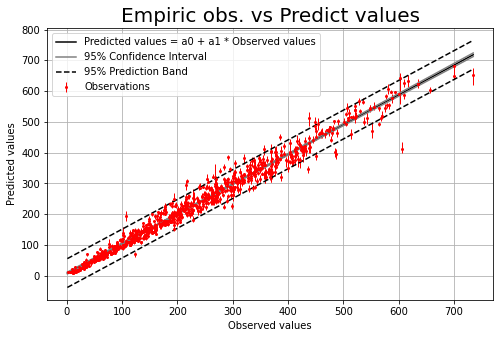

In [20]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y['GS_cub_m']['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [21]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [22]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 71.982, median - 72.557, CI - [70.003-73.955]

SHAP-values for: DBH_cm: mean - 5.757, median - 5.675, CI - [4.907-6.478]

SHAP-values for: H_m: mean - 62.18, median - 62.084, CI - [60.279-64.031]

SHAP-values for: Origin_ID: mean - 2.691, median - 2.663, CI - [2.364-3.048]

SHAP-values for: Species_ID: mean - 4.528, median - 4.51, CI - [4.113-4.952]



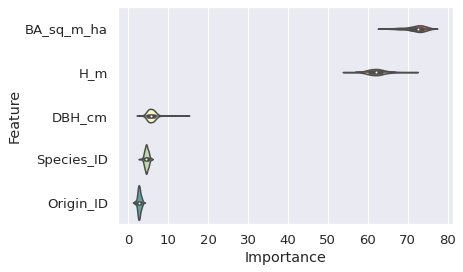

In [23]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'H_m', 'DBH_cm', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [24]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [25]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 115.475, median: 115.0,
 pred. interval (P(0.025)-P(0.975)): 48.975-171.0, 
 conf. interval (p-value=0.95): 76.472-160.696 
***
Aggregate bias statistic: 
 mean: 0.179, median: 0.181,
 pred. interval (P(0.025)-P(0.975)): -4.131-4.122, 
 conf. interval (p-value=0.95): -1.676-2.155 
***
Aggregate RMSE statistic: 
 mean: 24.222, median: 23.904, pred. interval (P(0.025)-P(0.975)): 19.02-30.425, 
 conf. interval (p-value=0.95): 21.81-26.515 
***
Aggregate MSE statistic: 
 mean: 594.365, median: 571.384, pred. interval (P(0.025)-P(0.975)): 361.773-925.694, 
 conf. interval (p-value=0.95): 476.176-703.839 
***
Aggregate R^2 statistic: 
 mean: 0.971, median: 0.972, pred. interval (P(0.025)-P(0.975)): 0.955-0.982, 
 conf. interval (p-value=0.95): 0.965-0.977 
***
Aggregate bias(%) statistic: 
 mean: 0.084, median: 0.077, pred. interval (P(0.025)-P(0.975)): -1.757-1.75, 
 conf. interval (p-value=0.95): -0.74-0.914 
***
Aggregate RMSE(%) s

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'Distribution of predicted values')

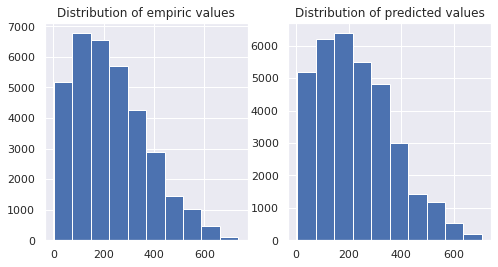

In [26]:
# Preprocessing

results_y['residuals'] = results_y["GS_cub_m"] - results_y[0]

results_y['residuals_%'] =  results_y['residuals'] / results_y["GS_cub_m"] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y["GS_cub_m"])
axs[0].set_title('Distribution of empiric values')
axs[1].hist(results_y[0])
axs[1].set_title('Distribution of predicted values')
# plt.show() 

In [27]:
# INPORTANT  - added your intervals
intervals = pd.cut(results_y['GS_cub_m'], [0, 100, 200, 300, 400, 800])

grouped = results_y.groupby(intervals)

max_obs_in_group = len(results_y)    
    
pre = pd.DataFrame()
pre_rel = pd.DataFrame()

pre = pre.assign(row_number=range(max_obs_in_group))
pre_rel = pre_rel.assign(row_number=range(max_obs_in_group))

for i in range(len(list(grouped))):
    pre[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals'])
    pre_rel[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals_%'])

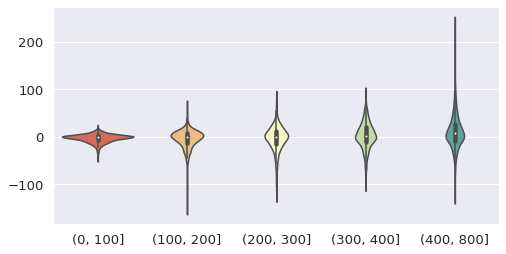

In [28]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre[list(pre.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

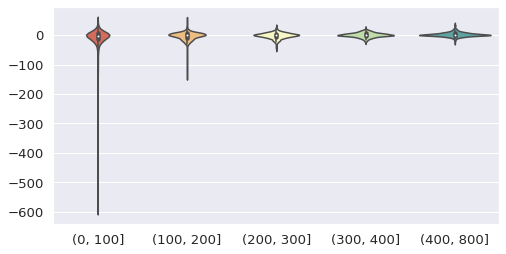

In [29]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel[(pre_rel.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [30]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [31]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [32]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:226.19162
[1]	validation_0-rmse:189.65261
[2]	validation_0-rmse:159.18690
[3]	validation_0-rmse:133.77265
[4]	validation_0-rmse:112.84405
[5]	validation_0-rmse:95.82422


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:81.97486
[7]	validation_0-rmse:69.99294
[8]	validation_0-rmse:60.13777
[9]	validation_0-rmse:51.97445
[10]	validation_0-rmse:45.33406
[11]	validation_0-rmse:40.04944
[12]	validation_0-rmse:35.98825
[13]	validation_0-rmse:32.55904
[14]	validation_0-rmse:29.92841
[15]	validation_0-rmse:27.69637
[16]	validation_0-rmse:25.90365
[17]	validation_0-rmse:24.52924
[18]	validation_0-rmse:23.42393
[19]	validation_0-rmse:22.33735
[20]	validation_0-rmse:21.37375
[21]	validation_0-rmse:20.65782
[22]	validation_0-rmse:20.00945
[23]	validation_0-rmse:19.63038
[24]	validation_0-rmse:19.28900
[25]	validation_0-rmse:18.88476
[26]	validation_0-rmse:18.68795
[27]	validation_0-rmse:18.39790
[28]	validation_0-rmse:18.12842
[29]	validation_0-rmse:17.82417
[30]	validation_0-rmse:17.55524
[31]	validation_0-rmse:17.36161
[32]	validation_0-rmse:17.18710
[33]	validation_0-rmse:17.03813
[34]	validation_0-rmse:16.81328
[35]	validation_0-rmse:16.59398
[36]	validation_0-rmse:16.48804
[37]	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [33]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 171


In [34]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

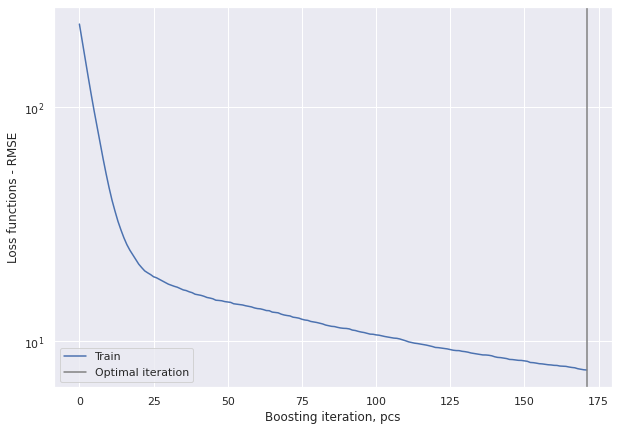

In [35]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [36]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.01
RMSE: 7.6
Relative RMSE(%):  3.298
MSE: 57.0
R square: 99.7%


In [37]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.997
Uncertainty
a0: 1.4+/-0.5
a1: 0.9941+/-0.0018


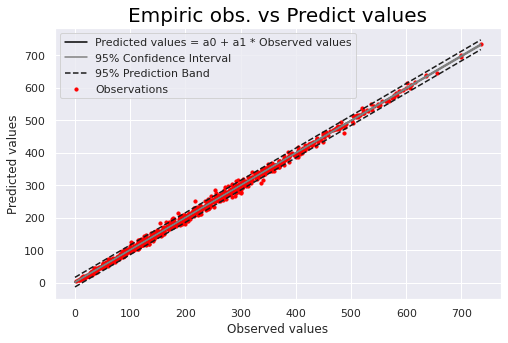

In [38]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.001, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

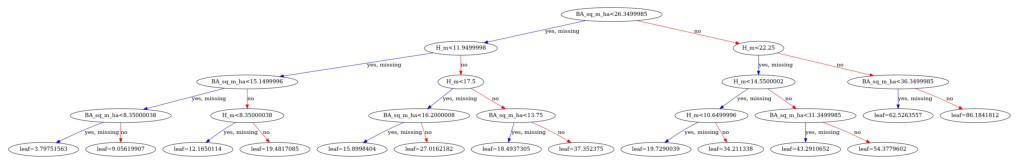

In [42]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [18, 45]
plt.show()

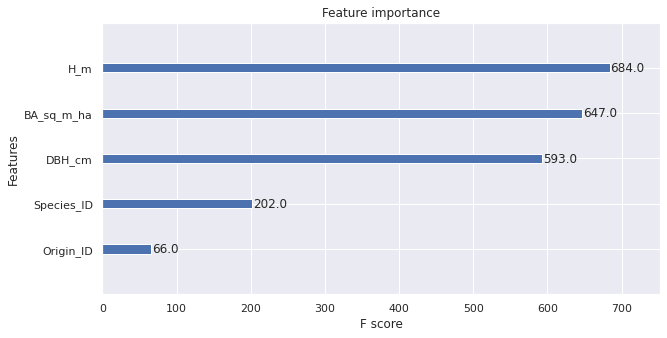

In [44]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

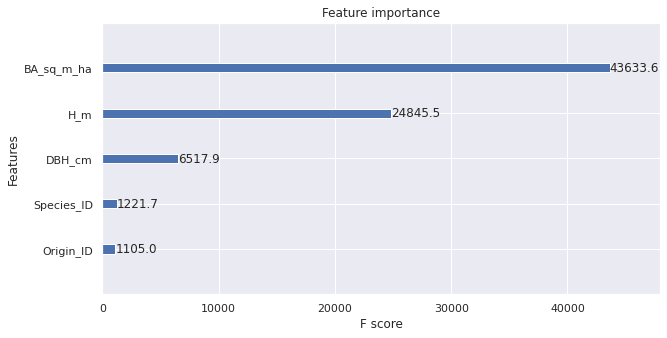

In [45]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

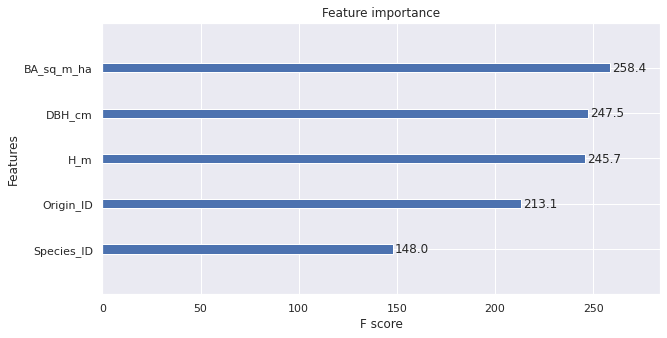

In [46]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [47]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


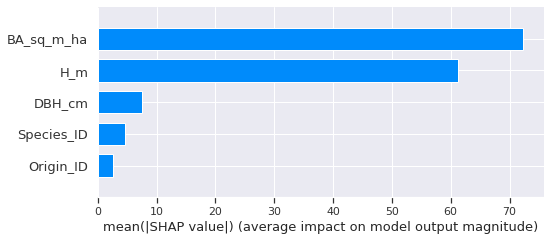

In [48]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

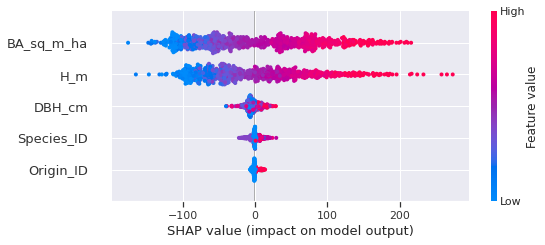

In [49]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

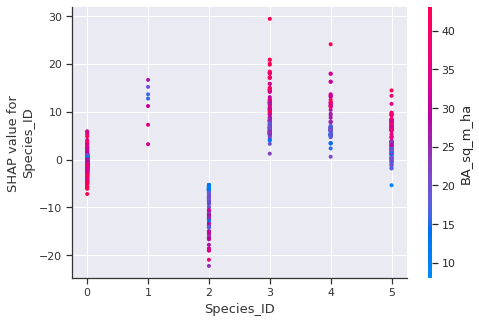

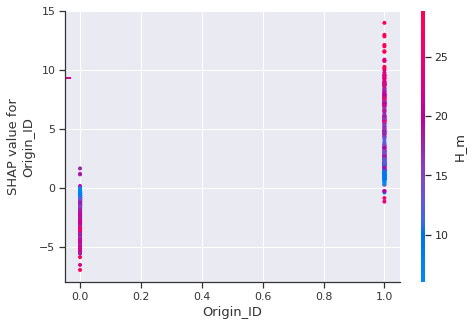

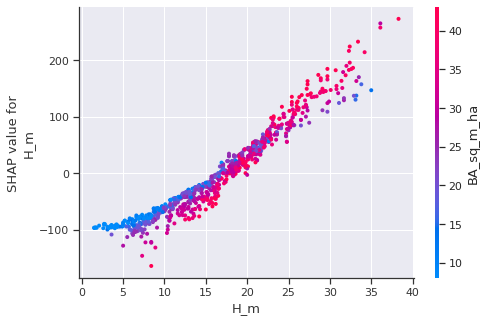

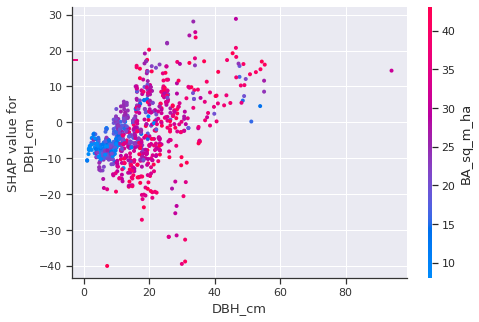

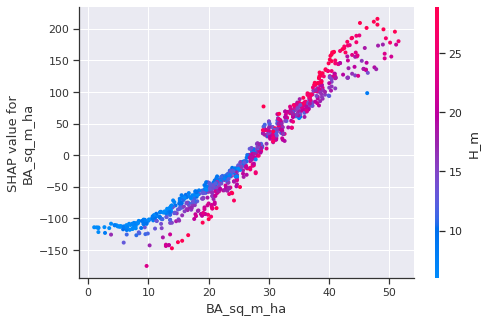

In [50]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [51]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/01_CS_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/01_CS_other_authors_XGB_model.txt")